In [3]:
import numpy as np
df = np.genfromtxt('data.csv', delimiter=',')

Text(0.5, 1.0, 'Training Set')

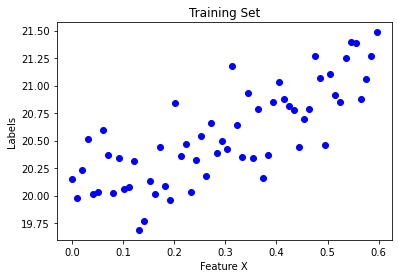

In [4]:
import matplotlib.pyplot as plt
plt.plot(df[:,0], df[:,1], 'bo')
plt.xlabel("Feature X")
plt.ylabel("Labels")
plt.title("Training Set")

In [9]:
x = np.zeros(df.shape)
x[:,0] = np.ones(df.shape[0])
x[:,1] = df[:,0]
y = df[:, 1]

In [16]:
def hypothesis(x_inp, theta):
    return x_inp @ theta

In [17]:
def cost_func(x_inp, y_tar, theta):
    m = x_inp.shape[0]
    return ((hypothesis(x_inp, theta) - y_tar).T @ (hypothesis(x_inp, theta) - y_tar)) / (2*m)

In [18]:
def gradient_descent(alpha, theta, x_inp, y_tar):
    m = x_inp.shape[0] #60
    prev_theta = np.copy(theta)
    np.subtract(theta, (alpha/m) * (x_inp.T @ (hypothesis(x_inp, theta) - y_tar)), out=theta)
    eps = 0.0000001
    itr = 1
    print(f'Epoch = 0, theta = {theta}, cost_func = {cost_func(x_inp, y_tar, theta)}')
    while np.max(np.absolute(theta - prev_theta)) > eps:
        prev_theta = np.copy(theta)
        np.subtract(theta, (alpha/m) * (x_inp.T @ (hypothesis(x_inp, theta) - y_tar)), out=theta)
        print(f'Epoch = {itr}, theta = {theta}, cost_func = {cost_func(x_inp, y_tar, theta)}')
        itr += 1
    return theta

In [7]:
#Model selection
trial_alpha = np.array([0.01, 0.03, 0.09, 0.27])
calc_costs = np.zeros(4)
for i in range(0,60,15):
    cv_x = x[i:i+15, :]
    cv_y = y[i:i+15]
    train_x = np.concatenate((x[0:i,:], x[i+15:, :])) if i+15 < 60 else x[0:i,:]
    train_y = np.concatenate((y[0:i], y[i+15:])) if i+15 < 60 else y[0:i]
    theta = gradient_descent(trial_alpha[i//15], np.array([0.,0.]), train_x, train_y)
    calc_costs[i//15] = cost_func(cv_x, cv_y, theta)
print(f'cost_func for alpha(0.01, 0.03, 0.09, 0.27) = {calc_costs}')

Epoch = 0, theta = [0.20684578 0.07771669], cost_func = 209.15329014737128
Epoch = 1, theta = [0.41133265 0.15453839], cost_func = 204.4088863620537
Epoch = 2, theta = [0.61348753 0.23047532], cost_func = 199.77220768191268
Epoch = 3, theta = [0.81333706 0.30553759], cost_func = 195.24080810468533
Epoch = 4, theta = [1.01090757 0.37973518], cost_func = 190.81229716695387
Epoch = 5, theta = [1.20622506 0.45307797], cost_func = 186.48433868308243
Epoch = 6, theta = [1.39931527 0.52557572], cost_func = 182.25464951278735
Epoch = 7, theta = [1.59020362 0.59723808], cost_func = 178.12099835669153
Epoch = 8, theta = [1.77891526 0.66807458], cost_func = 174.08120457922615
Epoch = 9, theta = [1.96547505 0.73809467], cost_func = 170.13313705826033
Epoch = 10, theta = [2.14990754 0.80730766], cost_func = 166.27471306085044
Epoch = 11, theta = [2.33223703 0.87572276], cost_func = 162.50389714451694
Epoch = 12, theta = [2.51248754 0.9433491 ], cost_func = 158.81870008346866
Epoch = 13, theta = [2.

Epoch = 591, theta = [18.21796339  6.47551013], cost_func = 0.1779827514724793
Epoch = 592, theta = [18.21842813  6.47498013], cost_func = 0.17793310120944636
Epoch = 593, theta = [18.21889021  6.47444923], cost_func = 0.1778836012541371
Epoch = 594, theta = [18.21934965  6.47391744], cost_func = 0.17783424848816295
Epoch = 595, theta = [18.21980649  6.47338476], cost_func = 0.17778503986385247
Epoch = 596, theta = [18.22026074  6.47285121], cost_func = 0.17773597240264719
Epoch = 597, theta = [18.22071245  6.4723168 ], cost_func = 0.17768704319352926
Epoch = 598, theta = [18.22116164  6.47178154], cost_func = 0.17763824939149045
Epoch = 599, theta = [18.22160834  6.47124545], cost_func = 0.17758958821603238
Epoch = 600, theta = [18.22205257  6.47070852], cost_func = 0.17754105694970226
Epoch = 601, theta = [18.22249437  6.47017077], cost_func = 0.17749265293666078
Epoch = 602, theta = [18.22293376  6.46963222], cost_func = 0.1774443735812835
Epoch = 603, theta = [18.22337077  6.469092

Epoch = 1020, theta = [18.33533797  6.2265937 ], cost_func = 0.16016486320549492
Epoch = 1021, theta = [18.33555926  6.22601556], cost_func = 0.16012654380406088
Epoch = 1022, theta = [18.3357805   6.22543749], cost_func = 0.16008823595964555
Epoch = 1023, theta = [18.33600169  6.2248595 ], cost_func = 0.1600499396686056
Epoch = 1024, theta = [18.33622283  6.2242816 ], cost_func = 0.16001165492729919
Epoch = 1025, theta = [18.33644391  6.22370377], cost_func = 0.15997338173209136
Epoch = 1026, theta = [18.33666494  6.22312603], cost_func = 0.15993512007935148
Epoch = 1027, theta = [18.33688593  6.22254836], cost_func = 0.15989686996545255
Epoch = 1028, theta = [18.33710686  6.22197078], cost_func = 0.15985863138677286
Epoch = 1029, theta = [18.33732774  6.22139328], cost_func = 0.1598204043396948
Epoch = 1030, theta = [18.33754857  6.22081585], cost_func = 0.159782188820605
Epoch = 1031, theta = [18.33776935  6.22023851], cost_func = 0.1597439848258942
Epoch = 1032, theta = [18.3379900

Epoch = 1568, theta = [18.45100901  5.92220059], cost_func = 0.14080586795051192
Epoch = 1569, theta = [18.45121122  5.92166769], cost_func = 0.1407733838835787
Epoch = 1570, theta = [18.4514134   5.92113488], cost_func = 0.1407409096077118
Epoch = 1571, theta = [18.45161555  5.92060215], cost_func = 0.14070844511996067
Epoch = 1572, theta = [18.45181768  5.9200695 ], cost_func = 0.1406759904173755
Epoch = 1573, theta = [18.45201977  5.91953692], cost_func = 0.14064354549700603
Epoch = 1574, theta = [18.45222183  5.91900443], cost_func = 0.14061111035590398
Epoch = 1575, theta = [18.45242386  5.91847202], cost_func = 0.1405786849911223
Epoch = 1576, theta = [18.45262586  5.91793969], cost_func = 0.14054626939971362
Epoch = 1577, theta = [18.45282783  5.91740744], cost_func = 0.14051386357873263
Epoch = 1578, theta = [18.45302977  5.91687527], cost_func = 0.14048146752523422
Epoch = 1579, theta = [18.45323167  5.91634318], cost_func = 0.1404490812362742
Epoch = 1580, theta = [18.4534335

Epoch = 2086, theta = [18.55177699  5.65664262], cost_func = 0.12522476385729003
Epoch = 2087, theta = [18.55196402  5.65614975], cost_func = 0.1251969761121286
Epoch = 2088, theta = [18.55215101  5.65565695], cost_func = 0.12516919674250898
Epoch = 2089, theta = [18.55233798  5.65516423], cost_func = 0.12514142574590686
Epoch = 2090, theta = [18.55252492  5.65467158], cost_func = 0.12511366311979866
Epoch = 2091, theta = [18.55271183  5.65417901], cost_func = 0.12508590886166138
Epoch = 2092, theta = [18.55289871  5.65368651], cost_func = 0.12505816296897285
Epoch = 2093, theta = [18.55308556  5.65319409], cost_func = 0.12503042543921122
Epoch = 2094, theta = [18.55327239  5.65270174], cost_func = 0.12500269626985652
Epoch = 2095, theta = [18.55345918  5.65220946], cost_func = 0.12497497545838823
Epoch = 2096, theta = [18.55364595  5.65171726], cost_func = 0.12494726300228767
Epoch = 2097, theta = [18.55383269  5.65122513], cost_func = 0.12491955889903592
Epoch = 2098, theta = [18.554

Epoch = 2634, theta = [18.6501543   5.39738412], cost_func = 0.11118626437656616
Epoch = 2635, theta = [18.65032649  5.39693032], cost_func = 0.11116270799462148
Epoch = 2636, theta = [18.65049866  5.3964766 ], cost_func = 0.11113915871283785
Epoch = 2637, theta = [18.65067081  5.39602294], cost_func = 0.11111561652907537
Epoch = 2638, theta = [18.65084292  5.39556935], cost_func = 0.11109208144119438
Epoch = 2639, theta = [18.65101502  5.39511583], cost_func = 0.11106855344705614
Epoch = 2640, theta = [18.65118708  5.39466237], cost_func = 0.11104503254452304
Epoch = 2641, theta = [18.65135912  5.39420899], cost_func = 0.11102151873145688
Epoch = 2642, theta = [18.65153114  5.39375567], cost_func = 0.110998012005721
Epoch = 2643, theta = [18.65170312  5.39330242], cost_func = 0.11097451236517929
Epoch = 2644, theta = [18.65187509  5.39284924], cost_func = 0.11095101980769627
Epoch = 2645, theta = [18.65204702  5.39239613], cost_func = 0.11092753433113699
Epoch = 2646, theta = [18.6522

Epoch = 3000, theta = [18.71147563  5.23578102], cost_func = 0.10302200398775933
Epoch = 3001, theta = [18.71163859  5.23535158], cost_func = 0.1030009084066394
Epoch = 3002, theta = [18.71180152  5.2349222 ], cost_func = 0.10297981918396765
Epoch = 3003, theta = [18.71196442  5.2344929 ], cost_func = 0.10295873631782669
Epoch = 3004, theta = [18.7121273   5.23406365], cost_func = 0.10293765980630126
Epoch = 3005, theta = [18.71229016  5.23363447], cost_func = 0.10291658964747583
Epoch = 3006, theta = [18.71245299  5.23320535], cost_func = 0.10289552583943579
Epoch = 3007, theta = [18.71261579  5.2327763 ], cost_func = 0.10287446838026663
Epoch = 3008, theta = [18.71277857  5.23234732], cost_func = 0.10285341726805478
Epoch = 3009, theta = [18.71294133  5.2319184 ], cost_func = 0.10283237250088746
Epoch = 3010, theta = [18.71310406  5.23148954], cost_func = 0.10281133407685207
Epoch = 3011, theta = [18.71326677  5.23106075], cost_func = 0.10279030199403648
Epoch = 3012, theta = [18.713

Epoch = 3401, theta = [18.77488915  5.0686643 ], cost_func = 0.09505277954086055
Epoch = 3402, theta = [18.77504254  5.06826004], cost_func = 0.09503408597451729
Epoch = 3403, theta = [18.77519592  5.06785585], cost_func = 0.09501539804262715
Epoch = 3404, theta = [18.77534927  5.06745172], cost_func = 0.09499671574349211
Epoch = 3405, theta = [18.77550259  5.06704766], cost_func = 0.094978039075414
Epoch = 3406, theta = [18.7756559   5.06664365], cost_func = 0.09495936803669597
Epoch = 3407, theta = [18.77580918  5.0662397 ], cost_func = 0.0949407026256412
Epoch = 3408, theta = [18.77596243  5.06583581], cost_func = 0.09492204284055333
Epoch = 3409, theta = [18.77611567  5.06543199], cost_func = 0.09490338867973658
Epoch = 3410, theta = [18.77626888  5.06502822], cost_func = 0.09488474014149581
Epoch = 3411, theta = [18.77642207  5.06462452], cost_func = 0.09486609722413626
Epoch = 3412, theta = [18.77657523  5.06422088], cost_func = 0.09484745992596386
Epoch = 3413, theta = [18.77672

Epoch = 3748, theta = [18.8267534   4.93198392], cost_func = 0.08889292737072178
Epoch = 3749, theta = [18.82689898  4.93160027], cost_func = 0.08887609045379669
Epoch = 3750, theta = [18.82704453  4.93121667], cost_func = 0.08885925861170964
Epoch = 3751, theta = [18.82719007  4.93083314], cost_func = 0.08884243184293125
Epoch = 3752, theta = [18.82733558  4.93044966], cost_func = 0.08882561014593171
Epoch = 3753, theta = [18.82748107  4.93006624], cost_func = 0.08880879351918297
Epoch = 3754, theta = [18.82762654  4.92968287], cost_func = 0.08879198196115647
Epoch = 3755, theta = [18.82777199  4.92929957], cost_func = 0.08877517547032457
Epoch = 3756, theta = [18.82791742  4.92891632], cost_func = 0.08875837404516
Epoch = 3757, theta = [18.82806282  4.92853313], cost_func = 0.08874157768413567
Epoch = 3758, theta = [18.8282082  4.92815  ], cost_func = 0.08872478638572555
Epoch = 3759, theta = [18.82835356  4.92776693], cost_func = 0.08870800014840337
Epoch = 3760, theta = [18.8284989

Epoch = 4138, theta = [18.88189686  4.78666166], cost_func = 0.08269690283025356
Epoch = 4139, theta = [18.88203413  4.78629991], cost_func = 0.0826819334655101
Epoch = 4140, theta = [18.88217138  4.78593822], cost_func = 0.08266696861270312
Epoch = 4141, theta = [18.8823086   4.78557658], cost_func = 0.08265200827047303
Epoch = 4142, theta = [18.88244581  4.78521499], cost_func = 0.08263705243745975
Epoch = 4143, theta = [18.88258299  4.78485346], cost_func = 0.08262210111230466
Epoch = 4144, theta = [18.88272016  4.78449198], cost_func = 0.08260715429364868
Epoch = 4145, theta = [18.8828573   4.78413056], cost_func = 0.08259221198013367
Epoch = 4146, theta = [18.88299443  4.78376919], cost_func = 0.0825772741704017
Epoch = 4147, theta = [18.88313153  4.78340788], cost_func = 0.08256234086309533
Epoch = 4148, theta = [18.88326861  4.78304662], cost_func = 0.08254741205685738
Epoch = 4149, theta = [18.88340567  4.78268542], cost_func = 0.08253248775033124
Epoch = 4150, theta = [18.8835

Epoch = 4433, theta = [18.92150683  4.68227558], cost_func = 0.0784709650907776
Epoch = 4434, theta = [18.92163813  4.68192957], cost_func = 0.07845726947167433
Epoch = 4435, theta = [18.92176941  4.6815836 ], cost_func = 0.07844357798058622
Epoch = 4436, theta = [18.92190066  4.68123769], cost_func = 0.0784298906162693
Epoch = 4437, theta = [18.9220319   4.68089183], cost_func = 0.07841620737747909
Epoch = 4438, theta = [18.92216312  4.68054602], cost_func = 0.07840252826297262
Epoch = 4439, theta = [18.92229432  4.68020027], cost_func = 0.07838885327150663
Epoch = 4440, theta = [18.9224255   4.67985457], cost_func = 0.07837518240183845
Epoch = 4441, theta = [18.92255666  4.67950891], cost_func = 0.07836151565272556
Epoch = 4442, theta = [18.9226878   4.67916331], cost_func = 0.07834785302292614
Epoch = 4443, theta = [18.92281892  4.67881777], cost_func = 0.0783341945111988
Epoch = 4444, theta = [18.92295002  4.67847227], cost_func = 0.07832054011630185
Epoch = 4445, theta = [18.92308

Epoch = 4717, theta = [18.95801141  4.58607328], cost_func = 0.07474269548513594
Epoch = 4718, theta = [18.95813721  4.58574177], cost_func = 0.0747301236088438
Epoch = 4719, theta = [18.95826298  4.5854103 ], cost_func = 0.07471755552185808
Epoch = 4720, theta = [18.95838874  4.58507888], cost_func = 0.07470499122303653
Epoch = 4721, theta = [18.95851448  4.58474752], cost_func = 0.07469243071123735
Epoch = 4722, theta = [18.9586402  4.5844162], cost_func = 0.07467987398531897
Epoch = 4723, theta = [18.9587659   4.58408493], cost_func = 0.0746673210441408
Epoch = 4724, theta = [18.95889159  4.58375371], cost_func = 0.07465477188656147
Epoch = 4725, theta = [18.95901725  4.58342255], cost_func = 0.07464222651144095
Epoch = 4726, theta = [18.95914289  4.58309143], cost_func = 0.07462968491763873
Epoch = 4727, theta = [18.95926852  4.58276036], cost_func = 0.07461714710401564
Epoch = 4728, theta = [18.95939413  4.58242934], cost_func = 0.07460461306943174
Epoch = 4729, theta = [18.959519

Epoch = 5185, theta = [19.01485986  4.4362578 ], cost_func = 0.06925441866838404
Epoch = 5186, theta = [19.01497709  4.43594886], cost_func = 0.06924350102106976
Epoch = 5187, theta = [19.0150943   4.43563997], cost_func = 0.06923258666445851
Epoch = 5188, theta = [19.01521149  4.43533113], cost_func = 0.06922167559755826
Epoch = 5189, theta = [19.01532867  4.43502233], cost_func = 0.06921076781937767
Epoch = 5190, theta = [19.01544582  4.43471358], cost_func = 0.06919986332892517
Epoch = 5191, theta = [19.01556296  4.43440488], cost_func = 0.06918896212521002
Epoch = 5192, theta = [19.01568008  4.43409622], cost_func = 0.06917806420724139
Epoch = 5193, theta = [19.01579719  4.43378761], cost_func = 0.0691671695740292
Epoch = 5194, theta = [19.01591428  4.43347904], cost_func = 0.06915627822458326
Epoch = 5195, theta = [19.01603135  4.43317052], cost_func = 0.0691453901579136
Epoch = 5196, theta = [19.0161484   4.43286205], cost_func = 0.06913450537303102
Epoch = 5197, theta = [19.0162

Epoch = 5663, theta = [19.06892803  4.2937693 ], cost_func = 0.0643936163463731
Epoch = 5664, theta = [19.06903711  4.29348184], cost_func = 0.06438416380009616
Epoch = 5665, theta = [19.06914618  4.29319442], cost_func = 0.06437471410292395
Epoch = 5666, theta = [19.06925522  4.29290705], cost_func = 0.06436526725399783
Epoch = 5667, theta = [19.06936425  4.29261972], cost_func = 0.0643558232524594
Epoch = 5668, theta = [19.06947327  4.29233243], cost_func = 0.06434638209745018
Epoch = 5669, theta = [19.06958226  4.29204518], cost_func = 0.06433694378811246
Epoch = 5670, theta = [19.06969124  4.29175798], cost_func = 0.06432750832358819
Epoch = 5671, theta = [19.06980021  4.29147082], cost_func = 0.0643180757030203
Epoch = 5672, theta = [19.06990916  4.29118371], cost_func = 0.06430864592555137
Epoch = 5673, theta = [19.07001809  4.29089663], cost_func = 0.06429921899032447
Epoch = 5674, theta = [19.070127    4.29060961], cost_func = 0.06428979489648291
Epoch = 5675, theta = [19.07023

Epoch = 5994, theta = [19.10415005  4.20094702], cost_func = 0.06141540859627208
Epoch = 5995, theta = [19.10425382  4.20067355], cost_func = 0.06140685371564261
Epoch = 5996, theta = [19.10435757  4.20040012], cost_func = 0.06139830141355128
Epoch = 5997, theta = [19.10446131  4.20012673], cost_func = 0.06138975168922107
Epoch = 5998, theta = [19.10456504  4.19985338], cost_func = 0.06138120454187476
Epoch = 5999, theta = [19.10466874  4.19958007], cost_func = 0.06137265997073587
Epoch = 6000, theta = [19.10477244  4.19930681], cost_func = 0.06136411797502775
Epoch = 6001, theta = [19.10487611  4.19903358], cost_func = 0.061355578553974124
Epoch = 6002, theta = [19.10497977  4.1987604 ], cost_func = 0.06134704170679897
Epoch = 6003, theta = [19.10508342  4.19848726], cost_func = 0.06133850743272668
Epoch = 6004, theta = [19.10518705  4.19821416], cost_func = 0.06132997573098141
Epoch = 6005, theta = [19.10529066  4.1979411 ], cost_func = 0.06132144660078808
Epoch = 6006, theta = [19.1

Epoch = 6383, theta = [19.14335917  4.09761731], cost_func = 0.058274800917488906
Epoch = 6384, theta = [19.14345703  4.09735941], cost_func = 0.0582671926516902
Epoch = 6385, theta = [19.14355488  4.09710155], cost_func = 0.05825958667910919
Epoch = 6386, theta = [19.14365271  4.09684373], cost_func = 0.058251982999054756
Epoch = 6387, theta = [19.14375053  4.09658595], cost_func = 0.058244381610835984
Epoch = 6388, theta = [19.14384833  4.0963282 ], cost_func = 0.05823678251376187
Epoch = 6389, theta = [19.14394612  4.0960705 ], cost_func = 0.058229185707141994
Epoch = 6390, theta = [19.14404389  4.09581283], cost_func = 0.05822159119028582
Epoch = 6391, theta = [19.14414165  4.09555521], cost_func = 0.05821399896250341
Epoch = 6392, theta = [19.14423939  4.09529762], cost_func = 0.058206409023104665
Epoch = 6393, theta = [19.14433712  4.09504007], cost_func = 0.0581988213713999
Epoch = 6394, theta = [19.14443483  4.09478256], cost_func = 0.05819123600669961
Epoch = 6395, theta = [19

Epoch = 6924, theta = [19.19420482  3.9636213 ], cost_func = 0.054476271802660806
Epoch = 6925, theta = [19.19429502  3.96338359], cost_func = 0.054469808456687537
Epoch = 6926, theta = [19.1943852   3.96314593], cost_func = 0.054463347058840164
Epoch = 6927, theta = [19.19447537  3.96290829], cost_func = 0.054456887608531644
Epoch = 6928, theta = [19.19456553  3.9626707 ], cost_func = 0.054450430105174655
Epoch = 6929, theta = [19.19465567  3.96243314], cost_func = 0.05444397454818262
Epoch = 6930, theta = [19.1947458   3.96219562], cost_func = 0.05443752093696867
Epoch = 6931, theta = [19.19483592  3.96195813], cost_func = 0.05443106927094671
Epoch = 6932, theta = [19.19492602  3.96172067], cost_func = 0.054424619549530054
Epoch = 6933, theta = [19.19501611  3.96148326], cost_func = 0.054418171772132665
Epoch = 6934, theta = [19.19510619  3.96124588], cost_func = 0.05441172593816855
Epoch = 6935, theta = [19.19519625  3.96100853], cost_func = 0.05440528204705223
Epoch = 6936, theta =

Epoch = 7407, theta = [19.23622554  3.85288206], cost_func = 0.051570669753583265
Epoch = 7408, theta = [19.2363094   3.85266104], cost_func = 0.051565082189074435
Epoch = 7409, theta = [19.23639325  3.85244006], cost_func = 0.05155949630872111
Epoch = 7410, theta = [19.23647709  3.85221912], cost_func = 0.05155391211201551
Epoch = 7411, theta = [19.23656092  3.8519982 ], cost_func = 0.051548329598450175
Epoch = 7412, theta = [19.23664473  3.85177733], cost_func = 0.0515427487675179
Epoch = 7413, theta = [19.23672853  3.85155648], cost_func = 0.05153716961871144
Epoch = 7414, theta = [19.23681232  3.85133567], cost_func = 0.051531592151523864
Epoch = 7415, theta = [19.2368961   3.85111489], cost_func = 0.05152601636544825
Epoch = 7416, theta = [19.23697986  3.85089414], cost_func = 0.051520442259977886
Epoch = 7417, theta = [19.23706361  3.85067343], cost_func = 0.051514869834606104
Epoch = 7418, theta = [19.23714735  3.85045275], cost_func = 0.0515092990888268
Epoch = 7419, theta = [1

Epoch = 7960, theta = [19.28072581  3.73560831], cost_func = 0.048724136563958256
Epoch = 7961, theta = [19.28080297  3.73540497], cost_func = 0.0487194069768886
Epoch = 7962, theta = [19.28088012  3.73520166], cost_func = 0.04871467881537025
Epoch = 7963, theta = [19.28095725  3.73499839], cost_func = 0.04870995207897351
Epoch = 7964, theta = [19.28103437  3.73479514], cost_func = 0.048705226767268774
Epoch = 7965, theta = [19.28111149  3.73459193], cost_func = 0.04870050287982662
Epoch = 7966, theta = [19.28118858  3.73438874], cost_func = 0.048695780416217874
Epoch = 7967, theta = [19.28126567  3.73418559], cost_func = 0.0486910593760133
Epoch = 7968, theta = [19.28134275  3.73398247], cost_func = 0.04868633975878384
Epoch = 7969, theta = [19.28141981  3.73377937], cost_func = 0.04868162156410062
Epoch = 7970, theta = [19.28149687  3.73357631], cost_func = 0.04867690479153496
Epoch = 7971, theta = [19.28157391  3.73337328], cost_func = 0.048672189440658126
Epoch = 7972, theta = [19.

Epoch = 8507, theta = [19.3212411  3.6288364], cost_func = 0.04633873754417169
Epoch = 8508, theta = [19.32131215  3.62864915], cost_func = 0.046334726943464015
Epoch = 8509, theta = [19.32138319  3.62846194], cost_func = 0.046330717551597136
Epoch = 8510, theta = [19.32145422  3.62827475], cost_func = 0.04632670936820635
Epoch = 8511, theta = [19.32152524  3.62808759], cost_func = 0.04632270239292767
Epoch = 8512, theta = [19.32159625  3.62790045], cost_func = 0.04631869662539672
Epoch = 8513, theta = [19.32166725  3.62771335], cost_func = 0.04631469206524974
Epoch = 8514, theta = [19.32173824  3.62752627], cost_func = 0.046310688712122794
Epoch = 8515, theta = [19.32180921  3.62733923], cost_func = 0.0463066865656517
Epoch = 8516, theta = [19.32188018  3.62715221], cost_func = 0.04630268562547304
Epoch = 8517, theta = [19.32195113  3.62696522], cost_func = 0.04629868589122333
Epoch = 8518, theta = [19.32202208  3.62677825], cost_func = 0.04629468736253888
Epoch = 8519, theta = [19.32

Epoch = 9044, theta = [19.35789514  3.53224023], cost_func = 0.04435002971274891
Epoch = 9045, theta = [19.35796067  3.53206754], cost_func = 0.04434661853117288
Epoch = 9046, theta = [19.35802618  3.53189488], cost_func = 0.04434320837776581
Epoch = 9047, theta = [19.35809169  3.53172225], cost_func = 0.04433979925221755
Epoch = 9048, theta = [19.35815719  3.53154964], cost_func = 0.04433639115421849
Epoch = 9049, theta = [19.35822267  3.53137706], cost_func = 0.044332984083458885
Epoch = 9050, theta = [19.35828815  3.5312045 ], cost_func = 0.04432957803962919
Epoch = 9051, theta = [19.35835362  3.53103197], cost_func = 0.04432617302241976
Epoch = 9052, theta = [19.35841908  3.53085946], cost_func = 0.044322769031521166
Epoch = 9053, theta = [19.35848453  3.53068699], cost_func = 0.04431936606662409
Epoch = 9054, theta = [19.35854996  3.53051453], cost_func = 0.044315964127419415
Epoch = 9055, theta = [19.35861539  3.53034211], cost_func = 0.04431256321359774
Epoch = 9056, theta = [19

Epoch = 9579, theta = [19.39157836  3.4434732 ], cost_func = 0.04266435687667258
Epoch = 9580, theta = [19.39163881  3.44331389], cost_func = 0.04266145377603817
Epoch = 9581, theta = [19.39169925  3.4431546 ], cost_func = 0.0426585515504312
Epoch = 9582, theta = [19.39175968  3.44299534], cost_func = 0.042655650199587995
Epoch = 9583, theta = [19.39182011  3.44283611], cost_func = 0.04265274972324484
Epoch = 9584, theta = [19.39188052  3.4426769 ], cost_func = 0.042649850121138186
Epoch = 9585, theta = [19.39194092  3.44251771], cost_func = 0.04264695139300467
Epoch = 9586, theta = [19.39200132  3.44235855], cost_func = 0.04264405353858071
Epoch = 9587, theta = [19.39206171  3.44219941], cost_func = 0.042641156557603026
Epoch = 9588, theta = [19.39212208  3.44204029], cost_func = 0.0426382604498083
Epoch = 9589, theta = [19.39218245  3.4418812 ], cost_func = 0.042635365214933316
Epoch = 9590, theta = [19.39224281  3.44172213], cost_func = 0.042632470852714904
Epoch = 9591, theta = [19

Epoch = 10121, theta = [19.4230422   3.36055501], cost_func = 0.04121247857491025
Epoch = 10122, theta = [19.42309791  3.3604082 ], cost_func = 0.041210013086888805
Epoch = 10123, theta = [19.42315361  3.36026141], cost_func = 0.04120754834199354
Epoch = 10124, theta = [19.4232093   3.36011464], cost_func = 0.04120508434000036
Epoch = 10125, theta = [19.42326498  3.3599679 ], cost_func = 0.04120262108068533
Epoch = 10126, theta = [19.42332066  3.35982117], cost_func = 0.04120015856382468
Epoch = 10127, theta = [19.42337632  3.35967447], cost_func = 0.041197696789194604
Epoch = 10128, theta = [19.42343198  3.3595278 ], cost_func = 0.041195235756571344
Epoch = 10129, theta = [19.42348763  3.35938114], cost_func = 0.041192775465731274
Epoch = 10130, theta = [19.42354327  3.35923451], cost_func = 0.041190315916450844
Epoch = 10131, theta = [19.4235989  3.3590879], cost_func = 0.0411878571085065
Epoch = 10132, theta = [19.42365453  3.35894131], cost_func = 0.04118539904167467
Epoch = 10133,

Epoch = 10618, theta = [19.44971956  3.29025086], cost_func = 0.04007433515761776
Epoch = 10619, theta = [19.44977125  3.29011464], cost_func = 0.040072212718951256
Epoch = 10620, theta = [19.44982293  3.28997845], cost_func = 0.04007009092001195
Epoch = 10621, theta = [19.4498746   3.28984227], cost_func = 0.04006796976060689
Epoch = 10622, theta = [19.44992626  3.28970612], cost_func = 0.04006584924054349
Epoch = 10623, theta = [19.44997792  3.28956999], cost_func = 0.04006372935962883
Epoch = 10624, theta = [19.45002957  3.28943388], cost_func = 0.040061610117670385
Epoch = 10625, theta = [19.45008121  3.28929779], cost_func = 0.04005949151447561
Epoch = 10626, theta = [19.45013284  3.28916171], cost_func = 0.04005737354985184
Epoch = 10627, theta = [19.45018447  3.28902566], cost_func = 0.040055256223606624
Epoch = 10628, theta = [19.45023609  3.28888963], cost_func = 0.04005313953554765
Epoch = 10629, theta = [19.45028769  3.28875363], cost_func = 0.04005102348548242
Epoch = 10630

Epoch = 11130, theta = [19.47519008  3.22312715], cost_func = 0.039067204568207566
Epoch = 11131, theta = [19.47523793  3.22300105], cost_func = 0.039065385690141535
Epoch = 11132, theta = [19.47528577  3.22287497], cost_func = 0.03906356736030591
Epoch = 11133, theta = [19.47533361  3.22274891], cost_func = 0.0390617495785357
Epoch = 11134, theta = [19.47538143  3.22262287], cost_func = 0.03905993234466545
Epoch = 11135, theta = [19.47542925  3.22249685], cost_func = 0.039058115658530186
Epoch = 11136, theta = [19.47547707  3.22237085], cost_func = 0.03905629951996471
Epoch = 11137, theta = [19.47552487  3.22224486], cost_func = 0.03905448392880411
Epoch = 11138, theta = [19.47557267  3.2221189 ], cost_func = 0.03905266888488322
Epoch = 11139, theta = [19.47562046  3.22199295], cost_func = 0.039050854388037244
Epoch = 11140, theta = [19.47566824  3.22186703], cost_func = 0.03904904043810128
Epoch = 11141, theta = [19.47571602  3.22174112], cost_func = 0.039047227034910335
Epoch = 1114

Epoch = 11692, theta = [19.50097549  3.15517361], cost_func = 0.038126754328151935
Epoch = 11693, theta = [19.50101945  3.15505776], cost_func = 0.038125218912471406
Epoch = 11694, theta = [19.50106341  3.15494192], cost_func = 0.03812368395958268
Epoch = 11695, theta = [19.50110736  3.1548261 ], cost_func = 0.03812214946934623
Epoch = 11696, theta = [19.5011513   3.15471029], cost_func = 0.03812061544162249
Epoch = 11697, theta = [19.50119523  3.15459451], cost_func = 0.038119081876272214
Epoch = 11698, theta = [19.50123916  3.15447874], cost_func = 0.03811754877315586
Epoch = 11699, theta = [19.50128309  3.15436299], cost_func = 0.038116016132134306
Epoch = 11700, theta = [19.501327    3.15424725], cost_func = 0.03811448395306808
Epoch = 11701, theta = [19.50137091  3.15413154], cost_func = 0.03811295223581803
Epoch = 11702, theta = [19.50141481  3.15401584], cost_func = 0.038111420980245087
Epoch = 11703, theta = [19.50145871  3.15390016], cost_func = 0.03810989018620979
Epoch = 117

Epoch = 12180, theta = [19.52166064  3.10066102], cost_func = 0.03742987421593402
Epoch = 12181, theta = [19.52170149  3.10055338], cost_func = 0.037428548847835925
Epoch = 12182, theta = [19.52174233  3.10044576], cost_func = 0.0374272238792185
Epoch = 12183, theta = [19.52178316  3.10033815], cost_func = 0.03742589930996184
Epoch = 12184, theta = [19.52182399  3.10023056], cost_func = 0.03742457513994546
Epoch = 12185, theta = [19.52186481  3.10012298], cost_func = 0.03742325136904886
Epoch = 12186, theta = [19.52190562  3.10001542], cost_func = 0.0374219279971519
Epoch = 12187, theta = [19.52194643  3.09990788], cost_func = 0.03742060502413421
Epoch = 12188, theta = [19.52198723  3.09980035], cost_func = 0.037419282449875635
Epoch = 12189, theta = [19.52202802  3.09969284], cost_func = 0.037417960274255986
Epoch = 12190, theta = [19.52206881  3.09958535], cost_func = 0.037416638497155104
Epoch = 12191, theta = [19.5221096   3.09947787], cost_func = 0.0374153171184528
Epoch = 12192, 

Epoch = 12713, theta = [19.54258092  3.04552879], cost_func = 0.03677718595619651
Epoch = 12714, theta = [19.54261861  3.04542946], cost_func = 0.03677605731575414
Epoch = 12715, theta = [19.5426563   3.04533014], cost_func = 0.036774929015496734
Epoch = 12716, theta = [19.54269398  3.04523084], cost_func = 0.036773801055321874
Epoch = 12717, theta = [19.54273165  3.04513156], cost_func = 0.03677267343512705
Epoch = 12718, theta = [19.54276932  3.04503229], cost_func = 0.036771546154809785
Epoch = 12719, theta = [19.54280699  3.04493303], cost_func = 0.03677041921426749
Epoch = 12720, theta = [19.54284464  3.04483379], cost_func = 0.036769292613398
Epoch = 12721, theta = [19.5428823   3.04473456], cost_func = 0.03676816635209871
Epoch = 12722, theta = [19.54291994  3.04463535], cost_func = 0.036767040430267475
Epoch = 12723, theta = [19.54295758  3.04453616], cost_func = 0.03676591484780178
Epoch = 12724, theta = [19.54299522  3.04443698], cost_func = 0.036764789604599564
Epoch = 12725

Epoch = 13231, theta = [19.56136388  2.99602914], cost_func = 0.03623582935039257
Epoch = 13232, theta = [19.56139874  2.99593727], cost_func = 0.03623486388098083
Epoch = 13233, theta = [19.5614336   2.99584542], cost_func = 0.03623389870257248
Epoch = 13234, theta = [19.56146845  2.99575357], cost_func = 0.036232933815079874
Epoch = 13235, theta = [19.56150329  2.99566175], cost_func = 0.03623196921841537
Epoch = 13236, theta = [19.56153813  2.99556993], cost_func = 0.03623100491249129
Epoch = 13237, theta = [19.56157297  2.99547813], cost_func = 0.036230040897219866
Epoch = 13238, theta = [19.5616078   2.99538634], cost_func = 0.03622907717251366
Epoch = 13239, theta = [19.56164262  2.99529457], cost_func = 0.03622811373828496
Epoch = 13240, theta = [19.56167744  2.99520281], cost_func = 0.03622715059444629
Epoch = 13241, theta = [19.56171225  2.99511106], cost_func = 0.0362261877409101
Epoch = 13242, theta = [19.56174706  2.99501933], cost_func = 0.036225225177589124
Epoch = 13243,

Epoch = 13776, theta = [19.57960495  2.94795756], cost_func = 0.0357505265052657
Epoch = 13777, theta = [19.57963706  2.94787294], cost_func = 0.03574970731164439
Epoch = 13778, theta = [19.57966917  2.94778833], cost_func = 0.035748888364937365
Epoch = 13779, theta = [19.57970127  2.94770373], cost_func = 0.035748069665070055
Epoch = 13780, theta = [19.57973337  2.94761914], cost_func = 0.03574725121196825
Epoch = 13781, theta = [19.57976546  2.94753457], cost_func = 0.03574643300555761
Epoch = 13782, theta = [19.57979755  2.94745   ], cost_func = 0.03574561504576346
Epoch = 13783, theta = [19.57982963  2.94736546], cost_func = 0.03574479733251179
Epoch = 13784, theta = [19.57986171  2.94728092], cost_func = 0.03574397986572824
Epoch = 13785, theta = [19.57989378  2.9471964 ], cost_func = 0.035743162645338424
Epoch = 13786, theta = [19.57992585  2.94711189], cost_func = 0.035742345671268015
Epoch = 13787, theta = [19.57995791  2.94702739], cost_func = 0.035741528943443054
Epoch = 1378

Epoch = 14296, theta = [19.59566654  2.90562968], cost_func = 0.035356195914229234
Epoch = 14297, theta = [19.59569623  2.90555143], cost_func = 0.03535549557632751
Epoch = 14298, theta = [19.59572592  2.9054732 ], cost_func = 0.03535479544951562
Epoch = 14299, theta = [19.5957556   2.90539498], cost_func = 0.03535409553372988
Epoch = 14300, theta = [19.59578528  2.90531677], cost_func = 0.035353395828906675
Epoch = 14301, theta = [19.59581495  2.90523857], cost_func = 0.035352696334982385
Epoch = 14302, theta = [19.59584462  2.90516038], cost_func = 0.03535199705189371
Epoch = 14303, theta = [19.59587428  2.90508221], cost_func = 0.03535129797957673
Epoch = 14304, theta = [19.59590394  2.90500404], cost_func = 0.035350599117968125
Epoch = 14305, theta = [19.5959336   2.90492589], cost_func = 0.03534990046700434
Epoch = 14306, theta = [19.59596325  2.90484775], cost_func = 0.0353492020266219
Epoch = 14307, theta = [19.59599289  2.90476963], cost_func = 0.035348503796757434
Epoch = 1430

Epoch = 14770, theta = [19.60925001  2.86983249], cost_func = 0.03504681568508309
Epoch = 14771, theta = [19.60927766  2.86975964], cost_func = 0.03504620859789688
Epoch = 14772, theta = [19.60930529  2.8696868 ], cost_func = 0.03504560169369372
Epoch = 14773, theta = [19.60933293  2.86961397], cost_func = 0.03504499497241831
Epoch = 14774, theta = [19.60936056  2.86954116], cost_func = 0.035044388434015576
Epoch = 14775, theta = [19.60938819  2.86946835], cost_func = 0.03504378207843037
Epoch = 14776, theta = [19.60941581  2.86939556], cost_func = 0.035043175905607765
Epoch = 14777, theta = [19.60944343  2.86932277], cost_func = 0.03504256991549245
Epoch = 14778, theta = [19.60947104  2.86925   ], cost_func = 0.03504196410802947
Epoch = 14779, theta = [19.60949865  2.86917723], cost_func = 0.03504135848316372
Epoch = 14780, theta = [19.60952626  2.86910448], cost_func = 0.0350407530408402
Epoch = 14781, theta = [19.60955386  2.86903174], cost_func = 0.03504014778100381
Epoch = 14782, 

Epoch = 15314, theta = [19.62368915  2.83178033], cost_func = 0.03474217251025498
Epoch = 15315, theta = [19.62371462  2.83171321], cost_func = 0.034741657245982376
Epoch = 15316, theta = [19.62374008  2.83164611], cost_func = 0.034741142137016144
Epoch = 15317, theta = [19.62376554  2.83157901], cost_func = 0.03474062718330985
Epoch = 15318, theta = [19.623791    2.83151193], cost_func = 0.034740112384816266
Epoch = 15319, theta = [19.62381645  2.83144485], cost_func = 0.034739597741488826
Epoch = 15320, theta = [19.6238419   2.83137779], cost_func = 0.034739083253280754
Epoch = 15321, theta = [19.62386734  2.83131074], cost_func = 0.0347385689201452
Epoch = 15322, theta = [19.62389278  2.83124369], cost_func = 0.03473805474203558
Epoch = 15323, theta = [19.62391822  2.83117666], cost_func = 0.03473754071890513
Epoch = 15324, theta = [19.62394365  2.83110963], cost_func = 0.03473702685070698
Epoch = 15325, theta = [19.62396908  2.83104262], cost_func = 0.034736513137394606
Epoch = 153

Epoch = 15839, theta = [19.63654511  2.79790038], cost_func = 0.034491941468435136
Epoch = 15840, theta = [19.63656864  2.79783837], cost_func = 0.03449150162664109
Epoch = 15841, theta = [19.63659217  2.79777637], cost_func = 0.034491061917420344
Epoch = 15842, theta = [19.63661569  2.79771438], cost_func = 0.0344906223407329
Epoch = 15843, theta = [19.63663921  2.7976524 ], cost_func = 0.034490182896538865
Epoch = 15844, theta = [19.63666273  2.79759043], cost_func = 0.03448974358479847
Epoch = 15845, theta = [19.63668624  2.79752847], cost_func = 0.03448930440547148
Epoch = 15846, theta = [19.63670975  2.79746651], cost_func = 0.03448886535851809
Epoch = 15847, theta = [19.63673325  2.79740457], cost_func = 0.03448842644389849
Epoch = 15848, theta = [19.63675675  2.79734264], cost_func = 0.034487987661572746
Epoch = 15849, theta = [19.63678025  2.79728071], cost_func = 0.034487549011500994
Epoch = 15850, theta = [19.63680375  2.7972188 ], cost_func = 0.03448711049364329
Epoch = 1585

Epoch = 16382, theta = [19.64881378  2.76556818], cost_func = 0.03427159733909247
Epoch = 16383, theta = [19.64883546  2.76551104], cost_func = 0.03427122391152201
Epoch = 16384, theta = [19.64885713  2.76545392], cost_func = 0.03427085059650687
Epoch = 16385, theta = [19.64887881  2.7653968 ], cost_func = 0.03427047739401313
Epoch = 16386, theta = [19.64890048  2.76533969], cost_func = 0.0342701043040068
Epoch = 16387, theta = [19.64892215  2.76528259], cost_func = 0.03426973132645414
Epoch = 16388, theta = [19.64894381  2.76522549], cost_func = 0.034269358461321044
Epoch = 16389, theta = [19.64896547  2.76516841], cost_func = 0.034268985708573875
Epoch = 16390, theta = [19.64898713  2.76511133], cost_func = 0.03426861306817852
Epoch = 16391, theta = [19.64900878  2.76505427], cost_func = 0.03426824054010125
Epoch = 16392, theta = [19.64903043  2.76499721], cost_func = 0.03426786812430814
Epoch = 16393, theta = [19.64905208  2.76494016], cost_func = 0.034267495820765374
Epoch = 16394,

Epoch = 16923, theta = [19.66007833  2.73588214], cost_func = 0.03408515859784212
Epoch = 16924, theta = [19.66009832  2.73582948], cost_func = 0.03408484136502622
Epoch = 16925, theta = [19.6601183   2.73577683], cost_func = 0.03408452422782785
Epoch = 16926, theta = [19.66013827  2.73572418], cost_func = 0.03408420718621821
Epoch = 16927, theta = [19.66015825  2.73567154], cost_func = 0.0340838902401686
Epoch = 16928, theta = [19.66017822  2.73561891], cost_func = 0.034083573389650026
Epoch = 16929, theta = [19.66019819  2.73556629], cost_func = 0.03408325663463386
Epoch = 16930, theta = [19.66021815  2.73551368], cost_func = 0.034082939975091306
Epoch = 16931, theta = [19.66023811  2.73546107], cost_func = 0.034082623410993405
Epoch = 16932, theta = [19.66025807  2.73540847], cost_func = 0.034082306942311645
Epoch = 16933, theta = [19.66027803  2.73535588], cost_func = 0.034081990569016986
Epoch = 16934, theta = [19.66029798  2.7353033 ], cost_func = 0.034081674291080985
Epoch = 169

Epoch = 17443, theta = [19.67007337  2.70954174], cost_func = 0.033932454035032596
Epoch = 17444, theta = [19.67009184  2.70949305], cost_func = 0.03393218282910659
Epoch = 17445, theta = [19.67011032  2.70944437], cost_func = 0.03393191170492504
Epoch = 17446, theta = [19.67012879  2.70939569], cost_func = 0.033931640662463465
Epoch = 17447, theta = [19.67014726  2.70934702], cost_func = 0.03393136970169729
Epoch = 17448, theta = [19.67016572  2.70929836], cost_func = 0.033931098822601584
Epoch = 17449, theta = [19.67018418  2.7092497 ], cost_func = 0.033930828025151925
Epoch = 17450, theta = [19.67020264  2.70920106], cost_func = 0.033930557309323754
Epoch = 17451, theta = [19.6702211   2.70915241], cost_func = 0.03393028667509239
Epoch = 17452, theta = [19.67023955  2.70910378], cost_func = 0.033930016122433376
Epoch = 17453, theta = [19.67025801  2.70905516], cost_func = 0.03392974565132192
Epoch = 17454, theta = [19.67027645  2.70900654], cost_func = 0.033929475261733504
Epoch = 1

Epoch = 17989, theta = [19.67975825  2.68401869], cost_func = 0.033795899550683614
Epoch = 17990, theta = [19.67977527  2.68397385], cost_func = 0.03379566950383037
Epoch = 17991, theta = [19.67979228  2.68392901], cost_func = 0.03379543952631587
Epoch = 17992, theta = [19.67980929  2.68388418], cost_func = 0.0337952096181192
Epoch = 17993, theta = [19.6798263   2.68383935], cost_func = 0.03379497977921949
Epoch = 17994, theta = [19.67984331  2.68379454], cost_func = 0.03379475000959588
Epoch = 17995, theta = [19.67986031  2.68374972], cost_func = 0.03379452030922733
Epoch = 17996, theta = [19.67987732  2.68370492], cost_func = 0.03379429067809315
Epoch = 17997, theta = [19.67989431  2.68366012], cost_func = 0.03379406111617237
Epoch = 17998, theta = [19.67991131  2.68361533], cost_func = 0.03379383162344426
Epoch = 17999, theta = [19.6799283   2.68357055], cost_func = 0.033793602199887765
Epoch = 18000, theta = [19.6799453   2.68352577], cost_func = 0.03379337284548215
Epoch = 18001, 

Epoch = 18457, theta = [19.68744826  2.66375284], cost_func = 0.03369547215369285
Epoch = 18458, theta = [19.68746412  2.66371105], cost_func = 0.03369527237679791
Epoch = 18459, theta = [19.68747997  2.66366927], cost_func = 0.03369507266011797
Epoch = 18460, theta = [19.68749583  2.66362749], cost_func = 0.033694873003634954
Epoch = 18461, theta = [19.68751168  2.66358572], cost_func = 0.03369467340733069
Epoch = 18462, theta = [19.68752752  2.66354395], cost_func = 0.033694473871186945
Epoch = 18463, theta = [19.68754337  2.6635022 ], cost_func = 0.03369427439518572
Epoch = 18464, theta = [19.68755921  2.66346044], cost_func = 0.03369407497930883
Epoch = 18465, theta = [19.68757505  2.6634187 ], cost_func = 0.03369387562353804
Epoch = 18466, theta = [19.68759089  2.66337696], cost_func = 0.03369367632785542
Epoch = 18467, theta = [19.68760673  2.66333522], cost_func = 0.0336934770922428
Epoch = 18468, theta = [19.68762256  2.66329349], cost_func = 0.03369327791668206
Epoch = 18469, 

Epoch = 18938, theta = [19.69480643  2.64436149], cost_func = 0.03360600787074323
Epoch = 18939, theta = [19.69482118  2.64432262], cost_func = 0.033605835059399354
Epoch = 18940, theta = [19.69483593  2.64428376], cost_func = 0.033605662300142974
Epoch = 18941, theta = [19.69485067  2.64424491], cost_func = 0.03360548959295807
Epoch = 18942, theta = [19.69486541  2.64420606], cost_func = 0.03360531693782909
Epoch = 18943, theta = [19.69488015  2.64416721], cost_func = 0.033605144334740336
Epoch = 18944, theta = [19.69489489  2.64412837], cost_func = 0.033604971783676114
Epoch = 18945, theta = [19.69490963  2.64408954], cost_func = 0.03360479928462074
Epoch = 18946, theta = [19.69492436  2.64405071], cost_func = 0.033604626837558535
Epoch = 18947, theta = [19.69493909  2.64401189], cost_func = 0.03360445444247387
Epoch = 18948, theta = [19.69495382  2.64397308], cost_func = 0.03360428209935112
Epoch = 18949, theta = [19.69496855  2.64393427], cost_func = 0.0336041098081744
Epoch = 1895

Epoch = 19429, theta = [19.70178709  2.62596501], cost_func = 0.033527126497429394
Epoch = 19430, theta = [19.70180079  2.62592892], cost_func = 0.0335269774618276
Epoch = 19431, theta = [19.70181449  2.62589283], cost_func = 0.03352682847114685
Epoch = 19432, theta = [19.70182818  2.62585674], cost_func = 0.033526679525373596
Epoch = 19433, theta = [19.70184187  2.62582067], cost_func = 0.03352653062449421
Epoch = 19434, theta = [19.70185556  2.62578459], cost_func = 0.03352638176849527
Epoch = 19435, theta = [19.70186924  2.62574852], cost_func = 0.033526232957363296
Epoch = 19436, theta = [19.70188293  2.62571246], cost_func = 0.03352608419108464
Epoch = 19437, theta = [19.70189661  2.6256764 ], cost_func = 0.03352593546964578
Epoch = 19438, theta = [19.70191029  2.62564035], cost_func = 0.033525786793033314
Epoch = 19439, theta = [19.70192397  2.62560431], cost_func = 0.03352563816123367
Epoch = 19440, theta = [19.70193764  2.62556827], cost_func = 0.03352548957423337
Epoch = 19441

Epoch = 19959, theta = [19.70876443  2.6075773 ], cost_func = 0.03345411367893781
Epoch = 19960, theta = [19.70877708  2.60754397], cost_func = 0.033453986650228855
Epoch = 19961, theta = [19.70878972  2.60751065], cost_func = 0.03345385965980791
Epoch = 19962, theta = [19.70880236  2.60747734], cost_func = 0.03345373270766339
Epoch = 19963, theta = [19.708815    2.60744403], cost_func = 0.03345360579378346
Epoch = 19964, theta = [19.70882764  2.60741073], cost_func = 0.03345347891815694
Epoch = 19965, theta = [19.70884027  2.60737743], cost_func = 0.03345335208077223
Epoch = 19966, theta = [19.70885291  2.60734413], cost_func = 0.033453225281617614
Epoch = 19967, theta = [19.70886554  2.60731085], cost_func = 0.03345309852068185
Epoch = 19968, theta = [19.70887817  2.60727756], cost_func = 0.03345297179795313
Epoch = 19969, theta = [19.7088908   2.60724428], cost_func = 0.03345284511342022
Epoch = 19970, theta = [19.70890342  2.60721101], cost_func = 0.03345271846707138
Epoch = 19971,

Epoch = 20488, theta = [19.71519438  2.59063213], cost_func = 0.03339199038224742
Epoch = 20489, theta = [19.71520606  2.59060136], cost_func = 0.033391882078205905
Epoch = 20490, theta = [19.71521773  2.59057059], cost_func = 0.03339177380680846
Epoch = 20491, theta = [19.71522941  2.59053983], cost_func = 0.03339166556804516
Epoch = 20492, theta = [19.71524108  2.59050908], cost_func = 0.03339155736190635
Epoch = 20493, theta = [19.71525275  2.59047833], cost_func = 0.03339144918838199
Epoch = 20494, theta = [19.71526441  2.59044758], cost_func = 0.03339134104746238
Epoch = 20495, theta = [19.71527608  2.59041684], cost_func = 0.03339123293913776
Epoch = 20496, theta = [19.71528774  2.5903861 ], cost_func = 0.03339112486339811
Epoch = 20497, theta = [19.7152994   2.59035537], cost_func = 0.03339101682023379
Epoch = 20498, theta = [19.71531106  2.59032464], cost_func = 0.03339090880963488
Epoch = 20499, theta = [19.71532272  2.59029391], cost_func = 0.03339080083159156
Epoch = 20500, 

Epoch = 21034, theta = [19.72131461  2.57450321], cost_func = 0.03333745837859709
Epoch = 21035, theta = [19.72132536  2.57447487], cost_func = 0.03333736651112098
Epoch = 21036, theta = [19.72133611  2.57444653], cost_func = 0.03333727467133464
Epoch = 21037, theta = [19.72134686  2.5744182 ], cost_func = 0.03333718285922992
Epoch = 21038, theta = [19.72135761  2.57438988], cost_func = 0.033337091074798354
Epoch = 21039, theta = [19.72136836  2.57436155], cost_func = 0.033336999318031746
Epoch = 21040, theta = [19.7213791   2.57433324], cost_func = 0.03333690758892167
Epoch = 21041, theta = [19.72138985  2.57430492], cost_func = 0.033336815887459646
Epoch = 21042, theta = [19.72140059  2.57427661], cost_func = 0.03333672421363761
Epoch = 21043, theta = [19.72141133  2.57424831], cost_func = 0.03333663256744706
Epoch = 21044, theta = [19.72142207  2.57422001], cost_func = 0.033336540948879834
Epoch = 21045, theta = [19.72143281  2.57419171], cost_func = 0.03333644935792733
Epoch = 2104

Epoch = 21564, theta = [19.72679265  2.56006665], cost_func = 0.03329245233115534
Epoch = 21565, theta = [19.72680258  2.56004048], cost_func = 0.03329237402901318
Epoch = 21566, theta = [19.72681251  2.56001433], cost_func = 0.0332922957504721
Epoch = 21567, theta = [19.72682243  2.55998817], cost_func = 0.03329221749552509
Epoch = 21568, theta = [19.72683236  2.55996202], cost_func = 0.0332921392641649
Epoch = 21569, theta = [19.72684228  2.55993587], cost_func = 0.03329206105638462
Epoch = 21570, theta = [19.7268522   2.55990973], cost_func = 0.033291982872177085
Epoch = 21571, theta = [19.72686212  2.55988359], cost_func = 0.033291904711535106
Epoch = 21572, theta = [19.72687203  2.55985745], cost_func = 0.033291826574451636
Epoch = 21573, theta = [19.72688195  2.55983132], cost_func = 0.03329174846091962
Epoch = 21574, theta = [19.72689186  2.55980519], cost_func = 0.03329167037093182
Epoch = 21575, theta = [19.72690178  2.55977907], cost_func = 0.0332915923044813
Epoch = 21576, t

Epoch = 22098, theta = [19.73188676  2.54664191], cost_func = 0.03325382512715025
Epoch = 22099, theta = [19.73189592  2.54661777], cost_func = 0.03325375846768613
Epoch = 22100, theta = [19.73190508  2.54659363], cost_func = 0.03325369182831387
Epoch = 22101, theta = [19.73191423  2.5465695 ], cost_func = 0.03325362520902748
Epoch = 22102, theta = [19.73192339  2.54654537], cost_func = 0.033253558609820884
Epoch = 22103, theta = [19.73193254  2.54652124], cost_func = 0.033253492030688094
Epoch = 22104, theta = [19.7319417   2.54649712], cost_func = 0.033253425471623015
Epoch = 22105, theta = [19.73195085  2.546473  ], cost_func = 0.033253358932619596
Epoch = 22106, theta = [19.73196     2.54644889], cost_func = 0.033253292413671774
Epoch = 22107, theta = [19.73196915  2.54642478], cost_func = 0.033253225914773525
Epoch = 22108, theta = [19.7319783   2.54640067], cost_func = 0.03325315943591871
Epoch = 22109, theta = [19.73198744  2.54637657], cost_func = 0.033253092977101543
Epoch = 2

Epoch = 22599, theta = [19.73630729  2.53499227], cost_func = 0.03322282367983084
Epoch = 22600, theta = [19.73631578  2.53496988], cost_func = 0.033222766364555095
Epoch = 22601, theta = [19.73632427  2.5349475 ], cost_func = 0.03322270906655475
Epoch = 22602, theta = [19.73633276  2.53492513], cost_func = 0.03322265178582478
Epoch = 22603, theta = [19.73634125  2.53490275], cost_func = 0.033222594522359816
Epoch = 22604, theta = [19.73634974  2.53488038], cost_func = 0.033222537276154665
Epoch = 22605, theta = [19.73635823  2.53485801], cost_func = 0.033222480047204316
Epoch = 22606, theta = [19.73636672  2.53483565], cost_func = 0.03322242283550324
Epoch = 22607, theta = [19.7363752   2.53481329], cost_func = 0.033222365641046595
Epoch = 22608, theta = [19.73638369  2.53479093], cost_func = 0.03322230846382891
Epoch = 22609, theta = [19.73639217  2.53476858], cost_func = 0.03322225130384503
Epoch = 22610, theta = [19.73640065  2.53474623], cost_func = 0.033222194161089895
Epoch = 22

Epoch = 23149, theta = [19.74079083  2.52317658], cost_func = 0.03319377057248224
Epoch = 23150, theta = [19.74079864  2.52315598], cost_func = 0.033193722014143084
Epoch = 23151, theta = [19.74080646  2.52313537], cost_func = 0.03319367347043995
Epoch = 23152, theta = [19.74081428  2.52311478], cost_func = 0.033193624941368495
Epoch = 23153, theta = [19.74082209  2.52309418], cost_func = 0.0331935764269241
Epoch = 23154, theta = [19.74082991  2.52307359], cost_func = 0.03319352792710261
Epoch = 23155, theta = [19.74083772  2.523053  ], cost_func = 0.033193479441899584
Epoch = 23156, theta = [19.74084553  2.52303242], cost_func = 0.03319343097131039
Epoch = 23157, theta = [19.74085334  2.52301184], cost_func = 0.03319338251533089
Epoch = 23158, theta = [19.74086115  2.52299126], cost_func = 0.033193334073956554
Epoch = 23159, theta = [19.74086895  2.52297068], cost_func = 0.03319328564718309
Epoch = 23160, theta = [19.74087676  2.52295011], cost_func = 0.03319323723500578
Epoch = 23161

Epoch = 23691, theta = [19.74486006  2.51245273], cost_func = 0.033169485916904384
Epoch = 23692, theta = [19.74486726  2.51243374], cost_func = 0.033169444678236244
Epoch = 23693, theta = [19.74487447  2.51241476], cost_func = 0.03316940345199797
Epoch = 23694, theta = [19.74488167  2.51239578], cost_func = 0.033169362238185666
Epoch = 23695, theta = [19.74488887  2.5123768 ], cost_func = 0.033169321036795756
Epoch = 23696, theta = [19.74489607  2.51235782], cost_func = 0.033169279847824334
Epoch = 23697, theta = [19.74490327  2.51233885], cost_func = 0.03316923867126783
Epoch = 23698, theta = [19.74491047  2.51231988], cost_func = 0.03316919750712233
Epoch = 23699, theta = [19.74491767  2.51230091], cost_func = 0.033169156355384234
Epoch = 23700, theta = [19.74492486  2.51228195], cost_func = 0.033169115216049684
Epoch = 23701, theta = [19.74493206  2.51226299], cost_func = 0.03316907408911503
Epoch = 23702, theta = [19.74493925  2.51224403], cost_func = 0.033169032974576435
Epoch = 

Epoch = 24197, theta = [19.74837038  2.50320181], cost_func = 0.03315012978616375
Epoch = 24198, theta = [19.74837706  2.50318421], cost_func = 0.0331500943816533
Epoch = 24199, theta = [19.74838373  2.50316662], cost_func = 0.03315005898781424
Epoch = 24200, theta = [19.74839041  2.50314904], cost_func = 0.03315002360464323
Epoch = 24201, theta = [19.74839708  2.50313145], cost_func = 0.0331499882321371
Epoch = 24202, theta = [19.74840375  2.50311387], cost_func = 0.03314995287029266
Epoch = 24203, theta = [19.74841042  2.50309629], cost_func = 0.03314991751910674
Epoch = 24204, theta = [19.74841709  2.50307871], cost_func = 0.03314988217857591
Epoch = 24205, theta = [19.74842376  2.50306114], cost_func = 0.03314984684869724
Epoch = 24206, theta = [19.74843043  2.50304357], cost_func = 0.0331498115294674
Epoch = 24207, theta = [19.74843709  2.503026  ], cost_func = 0.03314977622088318
Epoch = 24208, theta = [19.74844376  2.50300843], cost_func = 0.033149740922941276
Epoch = 24209, the

Epoch = 24750, theta = [19.75191265  2.49386671], cost_func = 0.033132093284957725
Epoch = 24751, theta = [19.75191879  2.49385052], cost_func = 0.033132063316853595
Epoch = 24752, theta = [19.75192493  2.49383434], cost_func = 0.03313203335778224
Epoch = 24753, theta = [19.75193107  2.49381816], cost_func = 0.03313200340774089
Epoch = 24754, theta = [19.75193721  2.49380198], cost_func = 0.033131973466726757
Epoch = 24755, theta = [19.75194334  2.4937858 ], cost_func = 0.03313194353473733
Epoch = 24756, theta = [19.75194948  2.49376963], cost_func = 0.03313191361176963
Epoch = 24757, theta = [19.75195562  2.49375346], cost_func = 0.033131883697821135
Epoch = 24758, theta = [19.75196175  2.49373729], cost_func = 0.03313185379288893
Epoch = 24759, theta = [19.75196789  2.49372112], cost_func = 0.0331318238969706
Epoch = 24760, theta = [19.75197402  2.49370496], cost_func = 0.03313179401006303
Epoch = 24761, theta = [19.75198015  2.4936888 ], cost_func = 0.033131764132163795
Epoch = 2476

Epoch = 25301, theta = [19.75516032  2.48530796], cost_func = 0.03311687706668903
Epoch = 25302, theta = [19.75516597  2.48529307], cost_func = 0.03311685168492594
Epoch = 25303, theta = [19.75517162  2.48527817], cost_func = 0.03311682631081326
Epoch = 25304, theta = [19.75517727  2.48526328], cost_func = 0.03311680094434862
Epoch = 25305, theta = [19.75518292  2.48524839], cost_func = 0.03311677558552965
Epoch = 25306, theta = [19.75518857  2.48523351], cost_func = 0.03311675023435436
Epoch = 25307, theta = [19.75519422  2.48521862], cost_func = 0.03311672489081998
Epoch = 25308, theta = [19.75519987  2.48520374], cost_func = 0.03311669955492442
Epoch = 25309, theta = [19.75520551  2.48518886], cost_func = 0.03311667422666547
Epoch = 25310, theta = [19.75521116  2.48517398], cost_func = 0.03311664890604072
Epoch = 25311, theta = [19.7552168  2.4851591], cost_func = 0.033116623593047914
Epoch = 25312, theta = [19.75522245  2.48514423], cost_func = 0.03311659828768468
Epoch = 25313, th

Epoch = 25817, theta = [19.7579666   2.47791242], cost_func = 0.033104746053326126
Epoch = 25818, theta = [19.75797183  2.47789864], cost_func = 0.033104724327988236
Epoch = 25819, theta = [19.75797706  2.47788486], cost_func = 0.03310470260919876
Epoch = 25820, theta = [19.75798229  2.47787109], cost_func = 0.033104680896955514
Epoch = 25821, theta = [19.75798751  2.47785731], cost_func = 0.03310465919125658
Epoch = 25822, theta = [19.75799274  2.47784354], cost_func = 0.03310463749209994
Epoch = 25823, theta = [19.75799797  2.47782977], cost_func = 0.033104615799483726
Epoch = 25824, theta = [19.75800319  2.477816  ], cost_func = 0.03310459411340597
Epoch = 25825, theta = [19.75800841  2.47780223], cost_func = 0.03310457243386456
Epoch = 25826, theta = [19.75801364  2.47778847], cost_func = 0.033104550760857644
Epoch = 25827, theta = [19.75801886  2.47777471], cost_func = 0.033104529094383155
Epoch = 25828, theta = [19.75802408  2.47776094], cost_func = 0.03310450743443927
Epoch = 25

Epoch = 26363, theta = [19.76070772  2.47068862], cost_func = 0.033093807161448136
Epoch = 26364, theta = [19.76071254  2.47067592], cost_func = 0.033093788733216535
Epoch = 26365, theta = [19.76071735  2.47066323], cost_func = 0.03309377031053947
Epoch = 26366, theta = [19.76072217  2.47065054], cost_func = 0.03309375189341529
Epoch = 26367, theta = [19.76072698  2.47063786], cost_func = 0.033093733481842066
Epoch = 26368, theta = [19.7607318   2.47062517], cost_func = 0.0330937150758185
Epoch = 26369, theta = [19.76073661  2.47061249], cost_func = 0.03309369667534264
Epoch = 26370, theta = [19.76074142  2.47059981], cost_func = 0.03309367828041283
Epoch = 26371, theta = [19.76074623  2.47058713], cost_func = 0.03309365989102742
Epoch = 26372, theta = [19.76075104  2.47057445], cost_func = 0.03309364150718489
Epoch = 26373, theta = [19.76075585  2.47056178], cost_func = 0.0330936231288835
Epoch = 26374, theta = [19.76076066  2.4705491 ], cost_func = 0.033093604756121435
Epoch = 26375,

Epoch = 26910, theta = [19.76323672  2.46402381], cost_func = 0.03308451275904364
Epoch = 26911, theta = [19.76324116  2.46401213], cost_func = 0.03308449713225055
Epoch = 26912, theta = [19.76324559  2.46400044], cost_func = 0.033084481510167546
Epoch = 26913, theta = [19.76325003  2.46398876], cost_func = 0.03308446589279329
Epoch = 26914, theta = [19.76325446  2.46397707], cost_func = 0.033084450280126305
Epoch = 26915, theta = [19.76325889  2.46396539], cost_func = 0.03308443467216504
Epoch = 26916, theta = [19.76326332  2.46395371], cost_func = 0.033084419068908244
Epoch = 26917, theta = [19.76326776  2.46394203], cost_func = 0.03308440347035456
Epoch = 26918, theta = [19.76327219  2.46393036], cost_func = 0.03308438787650221
Epoch = 26919, theta = [19.76327662  2.46391869], cost_func = 0.033084372287350144
Epoch = 26920, theta = [19.76328104  2.46390701], cost_func = 0.03308435670289686
Epoch = 26921, theta = [19.76328547  2.46389534], cost_func = 0.03308434112314089
Epoch = 2692

Epoch = 27418, theta = [19.76540582  2.4583075 ], cost_func = 0.033077151207018436
Epoch = 27419, theta = [19.76540992  2.45829667], cost_func = 0.03307713779908077
Epoch = 27420, theta = [19.76541403  2.45828585], cost_func = 0.03307712439518449
Epoch = 27421, theta = [19.76541814  2.45827502], cost_func = 0.03307711099532816
Epoch = 27422, theta = [19.76542225  2.4582642 ], cost_func = 0.03307709759951076
Epoch = 27423, theta = [19.76542635  2.45825338], cost_func = 0.03307708420773097
Epoch = 27424, theta = [19.76543046  2.45824256], cost_func = 0.033077070819987675
Epoch = 27425, theta = [19.76543456  2.45823175], cost_func = 0.03307705743627965
Epoch = 27426, theta = [19.76543866  2.45822093], cost_func = 0.03307704405660548
Epoch = 27427, theta = [19.76544277  2.45821012], cost_func = 0.033077030680964195
Epoch = 27428, theta = [19.76544687  2.45819931], cost_func = 0.033077017309354466
Epoch = 27429, theta = [19.76545097  2.4581885 ], cost_func = 0.03307700394177501
Epoch = 2743

Epoch = 27961, theta = [19.76754787  2.45266244], cost_func = 0.03307043433656698
Epoch = 27962, theta = [19.76755165  2.45265247], cost_func = 0.0330704229531705
Epoch = 27963, theta = [19.76755544  2.45264249], cost_func = 0.033070411573204936
Epoch = 27964, theta = [19.76755922  2.45263252], cost_func = 0.03307040019666949
Epoch = 27965, theta = [19.76756301  2.45262255], cost_func = 0.033070388823563064
Epoch = 27966, theta = [19.76756679  2.45261258], cost_func = 0.033070377453884615
Epoch = 27967, theta = [19.76757057  2.45260261], cost_func = 0.03307036608763305
Epoch = 27968, theta = [19.76757435  2.45259265], cost_func = 0.033070354724807474
Epoch = 27969, theta = [19.76757813  2.45258268], cost_func = 0.03307034336540678
Epoch = 27970, theta = [19.76758192  2.45257272], cost_func = 0.033070332009429854
Epoch = 27971, theta = [19.7675857   2.45256276], cost_func = 0.03307032065687581
Epoch = 27972, theta = [19.76758948  2.45255279], cost_func = 0.0330703093077436
Epoch = 27973

Epoch = 28492, theta = [19.76947969  2.44757142], cost_func = 0.0330648478868982
Epoch = 28493, theta = [19.76948318  2.44756221], cost_func = 0.033064838187321095
Epoch = 28494, theta = [19.76948668  2.44755301], cost_func = 0.03306482849066744
Epoch = 28495, theta = [19.76949017  2.4475438 ], cost_func = 0.03306481879693647
Epoch = 28496, theta = [19.76949366  2.4475346 ], cost_func = 0.033064809106127316
Epoch = 28497, theta = [19.76949716  2.44752539], cost_func = 0.033064799418239
Epoch = 28498, theta = [19.76950065  2.44751619], cost_func = 0.03306478973327086
Epoch = 28499, theta = [19.76950414  2.44750699], cost_func = 0.03306478005122179
Epoch = 28500, theta = [19.76950763  2.44749779], cost_func = 0.03306477037209104
Epoch = 28501, theta = [19.76951112  2.4474886 ], cost_func = 0.03306476069587761
Epoch = 28502, theta = [19.76951461  2.4474794 ], cost_func = 0.03306475102258078
Epoch = 28503, theta = [19.7695181   2.44747021], cost_func = 0.03306474135219951
Epoch = 28504, th

Epoch = 28998, theta = [19.77118213  2.44308491], cost_func = 0.03306029521113917
Epoch = 28999, theta = [19.77118536  2.44307637], cost_func = 0.03306028688379027
Epoch = 29000, theta = [19.7711886   2.44306784], cost_func = 0.0330602785589511
Epoch = 29001, theta = [19.77119184  2.44305931], cost_func = 0.03306027023662124
Epoch = 29002, theta = [19.77119507  2.44305078], cost_func = 0.033060261916799935
Epoch = 29003, theta = [19.77119831  2.44304226], cost_func = 0.03306025359948614
Epoch = 29004, theta = [19.77120155  2.44303373], cost_func = 0.033060245284679296
Epoch = 29005, theta = [19.77120478  2.44302521], cost_func = 0.033060236972378726
Epoch = 29006, theta = [19.77120801  2.44301668], cost_func = 0.03306022866258353
Epoch = 29007, theta = [19.77121125  2.44300816], cost_func = 0.03306022035529303
Epoch = 29008, theta = [19.77121448  2.44299964], cost_func = 0.03306021205050635
Epoch = 29009, theta = [19.77121771  2.44299112], cost_func = 0.03306020374822292
Epoch = 29010,

Epoch = 29515, theta = [19.77279252  2.43884095], cost_func = 0.033056308092648645
Epoch = 29516, theta = [19.77279552  2.43883306], cost_func = 0.03305630096706245
Epoch = 29517, theta = [19.77279851  2.43882517], cost_func = 0.03305629384362394
Epoch = 29518, theta = [19.77280151  2.43881728], cost_func = 0.033056286722332524
Epoch = 29519, theta = [19.7728045   2.43880939], cost_func = 0.03305627960318771
Epoch = 29520, theta = [19.77280749  2.4388015 ], cost_func = 0.03305627248618841
Epoch = 29521, theta = [19.77281049  2.43879361], cost_func = 0.03305626537133443
Epoch = 29522, theta = [19.77281348  2.43878573], cost_func = 0.03305625825862488
Epoch = 29523, theta = [19.77281647  2.43877784], cost_func = 0.03305625114805916
Epoch = 29524, theta = [19.77281946  2.43876996], cost_func = 0.03305624403963674
Epoch = 29525, theta = [19.77282245  2.43876208], cost_func = 0.0330562369333568
Epoch = 29526, theta = [19.77282544  2.4387542 ], cost_func = 0.03305622982921883
Epoch = 29527, 

Epoch = 30059, theta = [19.77435684  2.43471842], cost_func = 0.033052732393380205
Epoch = 30060, theta = [19.7743596   2.43471115], cost_func = 0.033052726345550384
Epoch = 30061, theta = [19.77436236  2.43470388], cost_func = 0.033052720299543474
Epoch = 30062, theta = [19.77436512  2.43469661], cost_func = 0.03305271425535882
Epoch = 30063, theta = [19.77436788  2.43468934], cost_func = 0.03305270821299596
Epoch = 30064, theta = [19.77437064  2.43468207], cost_func = 0.03305270217245432
Epoch = 30065, theta = [19.77437339  2.43467481], cost_func = 0.033052696133733496
Epoch = 30066, theta = [19.77437615  2.43466754], cost_func = 0.0330526900968327
Epoch = 30067, theta = [19.77437891  2.43466028], cost_func = 0.033052684061751554
Epoch = 30068, theta = [19.77438166  2.43465302], cost_func = 0.03305267802848939
Epoch = 30069, theta = [19.77438442  2.43464575], cost_func = 0.03305267199704579
Epoch = 30070, theta = [19.77438717  2.43463849], cost_func = 0.03305266596742008
Epoch = 3007

Epoch = 30606, theta = [19.77580564  2.43090034], cost_func = 0.033049682129762024
Epoch = 30607, theta = [19.77580818  2.43089364], cost_func = 0.03304967700131629
Epoch = 30608, theta = [19.77581072  2.43088695], cost_func = 0.033049671874416355
Epoch = 30609, theta = [19.77581326  2.43088025], cost_func = 0.033049666749061665
Epoch = 30610, theta = [19.7758158   2.43087356], cost_func = 0.033049661625251865
Epoch = 30611, theta = [19.77581834  2.43086687], cost_func = 0.03304965650298642
Epoch = 30612, theta = [19.77582088  2.43086018], cost_func = 0.03304965138226491
Epoch = 30613, theta = [19.77582342  2.43085349], cost_func = 0.03304964626308677
Epoch = 30614, theta = [19.77582596  2.4308468 ], cost_func = 0.03304964114545169
Epoch = 30615, theta = [19.77582849  2.43084011], cost_func = 0.03304963602935907
Epoch = 30616, theta = [19.77583103  2.43083342], cost_func = 0.03304963091480853
Epoch = 30617, theta = [19.77583357  2.43082674], cost_func = 0.033049625801799556
Epoch = 306

Epoch = 31128, theta = [19.77708117  2.42753887], cost_func = 0.0330472047114917
Epoch = 31129, theta = [19.77708352  2.42753268], cost_func = 0.03304720032976803
Epoch = 31130, theta = [19.77708587  2.42752649], cost_func = 0.03304719594936494
Epoch = 31131, theta = [19.77708821  2.42752031], cost_func = 0.03304719157028223
Epoch = 31132, theta = [19.77709056  2.42751412], cost_func = 0.03304718719251944
Epoch = 31133, theta = [19.77709291  2.42750793], cost_func = 0.03304718281607607
Epoch = 31134, theta = [19.77709526  2.42750175], cost_func = 0.03304717844095192
Epoch = 31135, theta = [19.7770976   2.42749557], cost_func = 0.0330471740671464
Epoch = 31136, theta = [19.77709995  2.42748938], cost_func = 0.033047169694659234
Epoch = 31137, theta = [19.77710229  2.4274832 ], cost_func = 0.033047165323490044
Epoch = 31138, theta = [19.77710464  2.42747702], cost_func = 0.03304716095363824
Epoch = 31139, theta = [19.77710698  2.42747084], cost_func = 0.03304715658510368
Epoch = 31140, t

Epoch = 31682, theta = [19.77832949  2.42424911], cost_func = 0.03304496877386057
Epoch = 31683, theta = [19.77833165  2.42424342], cost_func = 0.03304496506607384
Epoch = 31684, theta = [19.77833381  2.42423772], cost_func = 0.03304496135940464
Epoch = 31685, theta = [19.77833597  2.42423203], cost_func = 0.03304495765385272
Epoch = 31686, theta = [19.77833813  2.42422634], cost_func = 0.03304495394941775
Epoch = 31687, theta = [19.77834029  2.42422065], cost_func = 0.03304495024609917
Epoch = 31688, theta = [19.77834245  2.42421496], cost_func = 0.03304494654389701
Epoch = 31689, theta = [19.77834461  2.42420927], cost_func = 0.03304494284281066
Epoch = 31690, theta = [19.77834676  2.42420359], cost_func = 0.03304493914283975
Epoch = 31691, theta = [19.77834892  2.4241979 ], cost_func = 0.03304493544398423
Epoch = 31692, theta = [19.77835108  2.42419221], cost_func = 0.033044931746243476
Epoch = 31693, theta = [19.77835324  2.42418653], cost_func = 0.03304492804961735
Epoch = 31694, 

Epoch = 32201, theta = [19.77940806  2.4214067 ], cost_func = 0.03304318714836307
Epoch = 32202, theta = [19.77941006  2.42140143], cost_func = 0.03304318397757854
Epoch = 32203, theta = [19.77941206  2.42139617], cost_func = 0.03304318080774967
Epoch = 32204, theta = [19.77941406  2.4213909 ], cost_func = 0.03304317763887625
Epoch = 32205, theta = [19.77941605  2.42138564], cost_func = 0.033043174470957955
Epoch = 32206, theta = [19.77941805  2.42138038], cost_func = 0.03304317130399442
Epoch = 32207, theta = [19.77942004  2.42137512], cost_func = 0.03304316813798556
Epoch = 32208, theta = [19.77942204  2.42136986], cost_func = 0.033043164972931006
Epoch = 32209, theta = [19.77942404  2.4213646 ], cost_func = 0.033043161808830296
Epoch = 32210, theta = [19.77942603  2.42135934], cost_func = 0.03304315864568342
Epoch = 32211, theta = [19.77942803  2.42135408], cost_func = 0.03304315548348985
Epoch = 32212, theta = [19.77943002  2.42134883], cost_func = 0.03304315232224954
Epoch = 32213

Epoch = 32749, theta = [19.78045894  2.41863727], cost_func = 0.03304158525309879
Epoch = 32750, theta = [19.78046078  2.41863242], cost_func = 0.033041582565143626
Epoch = 32751, theta = [19.78046262  2.41862758], cost_func = 0.03304157987799868
Epoch = 32752, theta = [19.78046446  2.41862273], cost_func = 0.03304157719166368
Epoch = 32753, theta = [19.78046629  2.41861789], cost_func = 0.03304157450613836
Epoch = 32754, theta = [19.78046813  2.41861304], cost_func = 0.033041571821422484
Epoch = 32755, theta = [19.78046997  2.4186082 ], cost_func = 0.033041569137515825
Epoch = 32756, theta = [19.78047181  2.41860335], cost_func = 0.03304156645441813
Epoch = 32757, theta = [19.78047365  2.41859851], cost_func = 0.03304156377212909
Epoch = 32758, theta = [19.78047548  2.41859367], cost_func = 0.033041561090648555
Epoch = 32759, theta = [19.78047732  2.41858883], cost_func = 0.033041558409976295
Epoch = 32760, theta = [19.78047916  2.41858399], cost_func = 0.03304155573011198
Epoch = 327

Epoch = 33255, theta = [19.78135514  2.41627547], cost_func = 0.0330403236117006
Epoch = 33256, theta = [19.78135684  2.41627098], cost_func = 0.03304032130401849
Epoch = 33257, theta = [19.78135855  2.41626649], cost_func = 0.033040318997032005
Epoch = 33258, theta = [19.78136025  2.416262  ], cost_func = 0.033040316690740854
Epoch = 33259, theta = [19.78136196  2.41625751], cost_func = 0.033040314385144806
Epoch = 33260, theta = [19.78136366  2.41625302], cost_func = 0.033040312080243696
Epoch = 33261, theta = [19.78136536  2.41624853], cost_func = 0.03304030977603735
Epoch = 33262, theta = [19.78136707  2.41624404], cost_func = 0.03304030747252551
Epoch = 33263, theta = [19.78136877  2.41623955], cost_func = 0.03304030516970799
Epoch = 33264, theta = [19.78137047  2.41623507], cost_func = 0.033040302867584526
Epoch = 33265, theta = [19.78137217  2.41623058], cost_func = 0.03304030056615494
Epoch = 33266, theta = [19.78137387  2.4162261 ], cost_func = 0.03304029826541911
Epoch = 3326

Epoch = 33804, theta = [19.78225322  2.41390871], cost_func = 0.03303915580358491
Epoch = 33805, theta = [19.78225479  2.41390458], cost_func = 0.03303915384789346
Epoch = 33806, theta = [19.78225636  2.41390044], cost_func = 0.03303915189279154
Epoch = 33807, theta = [19.78225793  2.41389631], cost_func = 0.033039149938278826
Epoch = 33808, theta = [19.7822595   2.41389217], cost_func = 0.033039147984355234
Epoch = 33809, theta = [19.78226106  2.41388804], cost_func = 0.03303914603102057
Epoch = 33810, theta = [19.78226263  2.41388391], cost_func = 0.03303914407827471
Epoch = 33811, theta = [19.7822642   2.41387978], cost_func = 0.033039142126117485
Epoch = 33812, theta = [19.78226577  2.41387565], cost_func = 0.033039140174548474
Epoch = 33813, theta = [19.78226733  2.41387152], cost_func = 0.03303913822356777
Epoch = 33814, theta = [19.7822689   2.41386739], cost_func = 0.03303913627317519
Epoch = 33815, theta = [19.78227047  2.41386326], cost_func = 0.03303913432337051
Epoch = 3381

Epoch = 34336, theta = [19.78305539  2.41179471], cost_func = 0.033038194373389625
Epoch = 34337, theta = [19.78305684  2.4117909 ], cost_func = 0.033038192707484204
Epoch = 34338, theta = [19.78305829  2.41178708], cost_func = 0.03303819104208083
Epoch = 34339, theta = [19.78305973  2.41178327], cost_func = 0.033038189377179464
Epoch = 34340, theta = [19.78306118  2.41177945], cost_func = 0.033038187712779936
Epoch = 34341, theta = [19.78306263  2.41177564], cost_func = 0.03303818604888204
Epoch = 34342, theta = [19.78306408  2.41177183], cost_func = 0.033038184385485704
Epoch = 34343, theta = [19.78306552  2.41176801], cost_func = 0.03303818272259069
Epoch = 34344, theta = [19.78306697  2.4117642 ], cost_func = 0.03303818106019692
Epoch = 34345, theta = [19.78306842  2.41176039], cost_func = 0.033038179398304154
Epoch = 34346, theta = [19.78306986  2.41175658], cost_func = 0.033038177736912366
Epoch = 34347, theta = [19.78307131  2.41175277], cost_func = 0.033038176076021344
Epoch = 

Epoch = 34823, theta = [19.7837354   2.41000266], cost_func = 0.03303743970623444
Epoch = 34824, theta = [19.78373674  2.40999912], cost_func = 0.033037438267794164
Epoch = 34825, theta = [19.78373809  2.40999557], cost_func = 0.03303743682978751
Epoch = 34826, theta = [19.78373943  2.40999203], cost_func = 0.03303743539221428
Epoch = 34827, theta = [19.78374078  2.40998848], cost_func = 0.03303743395507435
Epoch = 34828, theta = [19.78374212  2.40998494], cost_func = 0.03303743251836755
Epoch = 34829, theta = [19.78374347  2.40998139], cost_func = 0.03303743108209388
Epoch = 34830, theta = [19.78374481  2.40997785], cost_func = 0.03303742964625315
Epoch = 34831, theta = [19.78374616  2.40997431], cost_func = 0.033037428210845016
Epoch = 34832, theta = [19.7837475   2.40997077], cost_func = 0.0330374267758697
Epoch = 34833, theta = [19.78374884  2.40996723], cost_func = 0.03303742534132683
Epoch = 34834, theta = [19.78375019  2.40996368], cost_func = 0.03303742390721634
Epoch = 34835, 

Epoch = 35313, theta = [19.78437103  2.40832756], cost_func = 0.03303678435749728
Epoch = 35314, theta = [19.78437228  2.40832427], cost_func = 0.0330367831165866
Epoch = 35315, theta = [19.78437352  2.40832097], cost_func = 0.033036781876050046
Epoch = 35316, theta = [19.78437477  2.40831768], cost_func = 0.03303678063588728
Epoch = 35317, theta = [19.78437602  2.40831439], cost_func = 0.033036779396098476
Epoch = 35318, theta = [19.78437727  2.4083111 ], cost_func = 0.03303677815668308
Epoch = 35319, theta = [19.78437852  2.40830781], cost_func = 0.03303677691764144
Epoch = 35320, theta = [19.78437977  2.40830451], cost_func = 0.03303677567897323
Epoch = 35321, theta = [19.78438102  2.40830122], cost_func = 0.03303677444067843
Epoch = 35322, theta = [19.78438227  2.40829793], cost_func = 0.033036773202756775
Epoch = 35323, theta = [19.78438351  2.40829465], cost_func = 0.033036771965208274
Epoch = 35324, theta = [19.78438476  2.40829136], cost_func = 0.03303677072803281
Epoch = 35325

Epoch = 35858, theta = [19.78502499  2.40660415], cost_func = 0.033036160601358146
Epoch = 35859, theta = [19.78502614  2.40660111], cost_func = 0.033036159548454624
Epoch = 35860, theta = [19.78502729  2.40659808], cost_func = 0.03303615849586852
Epoch = 35861, theta = [19.78502844  2.40659505], cost_func = 0.0330361574435996
Epoch = 35862, theta = [19.78502959  2.40659201], cost_func = 0.033036156391648065
Epoch = 35863, theta = [19.78503074  2.40658898], cost_func = 0.033036155340013335
Epoch = 35864, theta = [19.78503189  2.40658595], cost_func = 0.033036154288695774
Epoch = 35865, theta = [19.78503304  2.40658292], cost_func = 0.03303615323769497
Epoch = 35866, theta = [19.78503419  2.40657989], cost_func = 0.03303615218701098
Epoch = 35867, theta = [19.78503534  2.40657686], cost_func = 0.03303615113664372
Epoch = 35868, theta = [19.78503649  2.40657383], cost_func = 0.03303615008659302
Epoch = 35869, theta = [19.78503764  2.4065708 ], cost_func = 0.03303614903685888
Epoch = 3587

Epoch = 36392, theta = [19.7856157   2.40504742], cost_func = 0.03303564119389314
Epoch = 36393, theta = [19.78561676  2.40504462], cost_func = 0.03303564029754506
Epoch = 36394, theta = [19.78561782  2.40504182], cost_func = 0.033035639401467025
Epoch = 36395, theta = [19.78561888  2.40503902], cost_func = 0.033035638505659076
Epoch = 36396, theta = [19.78561994  2.40503622], cost_func = 0.03303563761012119
Epoch = 36397, theta = [19.78562101  2.40503342], cost_func = 0.03303563671485325
Epoch = 36398, theta = [19.78562207  2.40503063], cost_func = 0.033035635819855094
Epoch = 36399, theta = [19.78562313  2.40502783], cost_func = 0.03303563492512675
Epoch = 36400, theta = [19.78562419  2.40502503], cost_func = 0.03303563403066811
Epoch = 36401, theta = [19.78562525  2.40502224], cost_func = 0.03303563313647899
Epoch = 36402, theta = [19.78562631  2.40501944], cost_func = 0.03303563224255937
Epoch = 36403, theta = [19.78562737  2.40501665], cost_func = 0.033035631348909286
Epoch = 3640

Epoch = 36912, theta = [19.78614699  2.40364728], cost_func = 0.03303520972385842
Epoch = 36913, theta = [19.78614797  2.40364469], cost_func = 0.03303520895756017
Epoch = 36914, theta = [19.78614895  2.4036421 ], cost_func = 0.03303520819149296
Epoch = 36915, theta = [19.78614994  2.40363951], cost_func = 0.033035207425656646
Epoch = 36916, theta = [19.78615092  2.40363693], cost_func = 0.03303520666005126
Epoch = 36917, theta = [19.7861519   2.40363434], cost_func = 0.03303520589467649
Epoch = 36918, theta = [19.78615288  2.40363175], cost_func = 0.033035205129532445
Epoch = 36919, theta = [19.78615386  2.40362917], cost_func = 0.03303520436461903
Epoch = 36920, theta = [19.78615484  2.40362658], cost_func = 0.033035203599936176
Epoch = 36921, theta = [19.78615582  2.403624  ], cost_func = 0.03303520283548386
Epoch = 36922, theta = [19.7861568   2.40362141], cost_func = 0.03303520207126184
Epoch = 36923, theta = [19.78615778  2.40361883], cost_func = 0.03303520130727022
Epoch = 36924

Epoch = 37443, theta = [19.78664821  2.40232638], cost_func = 0.03303483365980413
Epoch = 37444, theta = [19.78664912  2.40232399], cost_func = 0.033034833006855904
Epoch = 37445, theta = [19.78665002  2.4023216 ], cost_func = 0.03303483235410445
Epoch = 37446, theta = [19.78665093  2.40231922], cost_func = 0.03303483170154985
Epoch = 37447, theta = [19.78665184  2.40231683], cost_func = 0.033034831049191825
Epoch = 37448, theta = [19.78665274  2.40231444], cost_func = 0.033034830397030535
Epoch = 37449, theta = [19.78665365  2.40231205], cost_func = 0.03303482974506572
Epoch = 37450, theta = [19.78665455  2.40230966], cost_func = 0.03303482909329749
Epoch = 37451, theta = [19.78665546  2.40230728], cost_func = 0.033034828441725575
Epoch = 37452, theta = [19.78665637  2.40230489], cost_func = 0.03303482779035023
Epoch = 37453, theta = [19.78665727  2.40230251], cost_func = 0.03303482713917115
Epoch = 37454, theta = [19.78665818  2.40230012], cost_func = 0.03303482648818832
Epoch = 3745

Epoch = 37959, theta = [19.78709831  2.40114021], cost_func = 0.033034521588357645
Epoch = 37960, theta = [19.78709915  2.401138  ], cost_func = 0.03303452102947133
Epoch = 37961, theta = [19.78709999  2.40113579], cost_func = 0.03303452047075348
Epoch = 37962, theta = [19.78710083  2.40113358], cost_func = 0.03303451991220397
Epoch = 37963, theta = [19.78710167  2.40113137], cost_func = 0.033034519353822844
Epoch = 37964, theta = [19.7871025   2.40112916], cost_func = 0.03303451879560993
Epoch = 37965, theta = [19.78710334  2.40112695], cost_func = 0.03303451823756546
Epoch = 37966, theta = [19.78710418  2.40112474], cost_func = 0.03303451767968903
Epoch = 37967, theta = [19.78710502  2.40112253], cost_func = 0.03303451712198088
Epoch = 37968, theta = [19.78710586  2.40112033], cost_func = 0.03303451656444072
Epoch = 37969, theta = [19.78710669  2.40111812], cost_func = 0.03303451600706872
Epoch = 37970, theta = [19.78710753  2.40111591], cost_func = 0.03303451544986459
Epoch = 37971,

Epoch = 38503, theta = [19.78753642  2.39998565], cost_func = 0.03303424113291201
Epoch = 38504, theta = [19.78753719  2.39998361], cost_func = 0.03303424065855813
Epoch = 38505, theta = [19.78753796  2.39998158], cost_func = 0.03303424018434722
Epoch = 38506, theta = [19.78753873  2.39997954], cost_func = 0.033034239710279203
Epoch = 38507, theta = [19.78753951  2.39997751], cost_func = 0.033034239236354145
Epoch = 38508, theta = [19.78754028  2.39997547], cost_func = 0.033034238762571874
Epoch = 38509, theta = [19.78754105  2.39997344], cost_func = 0.03303423828893245
Epoch = 38510, theta = [19.78754182  2.3999714 ], cost_func = 0.03303423781543585
Epoch = 38511, theta = [19.78754259  2.39996937], cost_func = 0.033034237342081885
Epoch = 38512, theta = [19.78754337  2.39996733], cost_func = 0.03303423686887059
Epoch = 38513, theta = [19.78754414  2.3999653 ], cost_func = 0.033034236395801886
Epoch = 38514, theta = [19.78754491  2.39996327], cost_func = 0.033034235922875944
Epoch = 38

Epoch = 39068, theta = [19.78795496  2.39888265], cost_func = 0.03303399466748979
Epoch = 39069, theta = [19.78795567  2.39888078], cost_func = 0.0330339942674234
Epoch = 39070, theta = [19.78795638  2.39887891], cost_func = 0.033033993867477546
Epoch = 39071, theta = [19.78795709  2.39887704], cost_func = 0.0330339934676523
Epoch = 39072, theta = [19.7879578   2.39887517], cost_func = 0.033033993067947555
Epoch = 39073, theta = [19.78795851  2.3988733 ], cost_func = 0.03303399266836323
Epoch = 39074, theta = [19.78795921  2.39887143], cost_func = 0.033033992268899436
Epoch = 39075, theta = [19.78795992  2.39886956], cost_func = 0.03303399186955604
Epoch = 39076, theta = [19.78796063  2.39886769], cost_func = 0.033033991470332875
Epoch = 39077, theta = [19.78796134  2.39886583], cost_func = 0.03303399107123016
Epoch = 39078, theta = [19.78796205  2.39886396], cost_func = 0.0330339906722478
Epoch = 39079, theta = [19.78796276  2.39886209], cost_func = 0.033033990273385515
Epoch = 39080,

Epoch = 39596, theta = [19.78831515  2.39793342], cost_func = 0.03303379935650868
Epoch = 39597, theta = [19.7883158   2.39793169], cost_func = 0.03303379901531119
Epoch = 39598, theta = [19.78831646  2.39792996], cost_func = 0.03303379867421663
Epoch = 39599, theta = [19.78831712  2.39792824], cost_func = 0.03303379833322485
Epoch = 39600, theta = [19.78831777  2.39792651], cost_func = 0.03303379799233585
Epoch = 39601, theta = [19.78831843  2.39792478], cost_func = 0.03303379765154956
Epoch = 39602, theta = [19.78831908  2.39792306], cost_func = 0.03303379731086599
Epoch = 39603, theta = [19.78831973  2.39792133], cost_func = 0.033033796970285106
Epoch = 39604, theta = [19.78832039  2.39791961], cost_func = 0.03303379662980689
Epoch = 39605, theta = [19.78832104  2.39791788], cost_func = 0.033033796289431296
Epoch = 39606, theta = [19.7883217   2.39791616], cost_func = 0.033033795949158354
Epoch = 39607, theta = [19.78832235  2.39791443], cost_func = 0.03303379560898797
Epoch = 39608

Epoch = 40092, theta = [19.78862837  2.39710797], cost_func = 0.0330336421433158
Epoch = 40093, theta = [19.78862898  2.39710637], cost_func = 0.03303364184950417
Epoch = 40094, theta = [19.78862959  2.39710476], cost_func = 0.03303364155578116
Epoch = 40095, theta = [19.7886302   2.39710316], cost_func = 0.0330336412621467
Epoch = 40096, theta = [19.7886308   2.39710156], cost_func = 0.03303364096860069
Epoch = 40097, theta = [19.78863141  2.39709996], cost_func = 0.033033640675143104
Epoch = 40098, theta = [19.78863202  2.39709836], cost_func = 0.033033640381774
Epoch = 40099, theta = [19.78863263  2.39709675], cost_func = 0.03303364008849339
Epoch = 40100, theta = [19.78863323  2.39709515], cost_func = 0.03303363979530109
Epoch = 40101, theta = [19.78863384  2.39709355], cost_func = 0.03303363950219718
Epoch = 40102, theta = [19.78863445  2.39709195], cost_func = 0.0330336392091816
Epoch = 40103, theta = [19.78863506  2.39709035], cost_func = 0.03303363891625441
Epoch = 40104, theta

Epoch = 40625, theta = [19.78893985  2.3962871 ], cost_func = 0.03303349745340824
Epoch = 40626, theta = [19.78894042  2.39628562], cost_func = 0.03303349720320784
Epoch = 40627, theta = [19.78894098  2.39628415], cost_func = 0.03303349695308284
Epoch = 40628, theta = [19.78894154  2.39628267], cost_func = 0.0330334967030332
Epoch = 40629, theta = [19.7889421   2.39628119], cost_func = 0.03303349645305893
Epoch = 40630, theta = [19.78894266  2.39627971], cost_func = 0.03303349620315994
Epoch = 40631, theta = [19.78894322  2.39627823], cost_func = 0.03303349595333641
Epoch = 40632, theta = [19.78894378  2.39627676], cost_func = 0.0330334957035882
Epoch = 40633, theta = [19.78894434  2.39627528], cost_func = 0.033033495453915124
Epoch = 40634, theta = [19.7889449  2.3962738], cost_func = 0.03303349520431745
Epoch = 40635, theta = [19.78894546  2.39627232], cost_func = 0.03303349495479493
Epoch = 40636, theta = [19.78894602  2.39627085], cost_func = 0.03303349470534763
Epoch = 40637, thet

Epoch = 41171, theta = [19.78923402  2.39551188], cost_func = 0.03303337147537085
Epoch = 41172, theta = [19.78923453  2.39551052], cost_func = 0.033033371263141625
Epoch = 41173, theta = [19.78923505  2.39550916], cost_func = 0.03303337105097638
Epoch = 41174, theta = [19.78923557  2.39550779], cost_func = 0.03303337083887514
Epoch = 41175, theta = [19.78923608  2.39550643], cost_func = 0.03303337062683776
Epoch = 41176, theta = [19.7892366   2.39550507], cost_func = 0.03303337041486427
Epoch = 41177, theta = [19.78923712  2.39550371], cost_func = 0.03303337020295469
Epoch = 41178, theta = [19.78923763  2.39550235], cost_func = 0.03303336999110898
Epoch = 41179, theta = [19.78923815  2.39550099], cost_func = 0.03303336977932709
Epoch = 41180, theta = [19.78923867  2.39549963], cost_func = 0.03303336956760916
Epoch = 41181, theta = [19.78923918  2.39549827], cost_func = 0.03303336935595494
Epoch = 41182, theta = [19.7892397   2.39549691], cost_func = 0.03303336914436452
Epoch = 41183, 

Epoch = 41697, theta = [19.78949541  2.39482303], cost_func = 0.03303326822799315
Epoch = 41698, theta = [19.78949588  2.39482177], cost_func = 0.03303326804688391
Epoch = 41699, theta = [19.78949636  2.39482051], cost_func = 0.03303326786582917
Epoch = 41700, theta = [19.78949684  2.39481926], cost_func = 0.03303326768482895
Epoch = 41701, theta = [19.78949732  2.394818  ], cost_func = 0.03303326750388355
Epoch = 41702, theta = [19.78949779  2.39481674], cost_func = 0.03303326732299247
Epoch = 41703, theta = [19.78949827  2.39481548], cost_func = 0.033033267142155945
Epoch = 41704, theta = [19.78949875  2.39481423], cost_func = 0.03303326696137396
Epoch = 41705, theta = [19.78949922  2.39481297], cost_func = 0.033033266780646414
Epoch = 41706, theta = [19.7894997   2.39481171], cost_func = 0.03303326659997341
Epoch = 41707, theta = [19.78950018  2.39481046], cost_func = 0.033033266419354855
Epoch = 41708, theta = [19.78950065  2.3948092 ], cost_func = 0.03303326623879077
Epoch = 41709

Epoch = 42223, theta = [19.78973687  2.39418669], cost_func = 0.033033180120149455
Epoch = 42224, theta = [19.78973731  2.39418552], cost_func = 0.03303317996559688
Epoch = 42225, theta = [19.78973775  2.39418436], cost_func = 0.03303317981109093
Epoch = 42226, theta = [19.78973819  2.3941832 ], cost_func = 0.033033179656631516
Epoch = 42227, theta = [19.78973863  2.39418204], cost_func = 0.03303317950221859
Epoch = 42228, theta = [19.78973908  2.39418088], cost_func = 0.03303317934785223
Epoch = 42229, theta = [19.78973952  2.39417971], cost_func = 0.033033179193532436
Epoch = 42230, theta = [19.78973996  2.39417855], cost_func = 0.033033179039259154
Epoch = 42231, theta = [19.7897404   2.39417739], cost_func = 0.03303317888503242
Epoch = 42232, theta = [19.78974084  2.39417623], cost_func = 0.033033178730852084
Epoch = 42233, theta = [19.78974128  2.39417507], cost_func = 0.03303317857671837
Epoch = 42234, theta = [19.78974172  2.39417391], cost_func = 0.03303317842263087
Epoch = 422

Epoch = 42738, theta = [19.78995544  2.39361067], cost_func = 0.03303310638529243
Epoch = 42739, theta = [19.78995585  2.39360959], cost_func = 0.0330331062529643
Epoch = 42740, theta = [19.78995626  2.39360852], cost_func = 0.03303310612067615
Epoch = 42741, theta = [19.78995667  2.39360744], cost_func = 0.033033105988427854
Epoch = 42742, theta = [19.78995708  2.39360637], cost_func = 0.033033105856219463
Epoch = 42743, theta = [19.78995748  2.39360529], cost_func = 0.033033105724050896
Epoch = 42744, theta = [19.78995789  2.39360422], cost_func = 0.03303310559192211
Epoch = 42745, theta = [19.7899583   2.39360314], cost_func = 0.033033105459833206
Epoch = 42746, theta = [19.78995871  2.39360207], cost_func = 0.03303310532778403
Epoch = 42747, theta = [19.78995912  2.39360099], cost_func = 0.033033105195774806
Epoch = 42748, theta = [19.78995952  2.39359992], cost_func = 0.03303310506380526
Epoch = 42749, theta = [19.78995993  2.39359884], cost_func = 0.03303310493187554
Epoch = 4275

Epoch = 43117, theta = [19.7901058   2.39321443], cost_func = 0.03303305898475686
Epoch = 43118, theta = [19.79010619  2.39321341], cost_func = 0.033033058866715856
Epoch = 43119, theta = [19.79010657  2.3932124 ], cost_func = 0.03303305874871039
Epoch = 43120, theta = [19.79010696  2.39321138], cost_func = 0.033033058630740575
Epoch = 43121, theta = [19.79010734  2.39321036], cost_func = 0.03303305851280625
Epoch = 43122, theta = [19.79010773  2.39320935], cost_func = 0.033033058394907576
Epoch = 43123, theta = [19.79010811  2.39320833], cost_func = 0.03303305827704438
Epoch = 43124, theta = [19.7901085   2.39320732], cost_func = 0.03303305815921658
Epoch = 43125, theta = [19.79010888  2.3932063 ], cost_func = 0.03303305804142445
Epoch = 43126, theta = [19.79010927  2.39320529], cost_func = 0.033033057923667807
Epoch = 43127, theta = [19.79010965  2.39320428], cost_func = 0.033033057805946724
Epoch = 43128, theta = [19.79011004  2.39320326], cost_func = 0.03303305768826094
Epoch = 431

Epoch = 43500, theta = [19.79024926  2.39283635], cost_func = 0.033033016280918294
Epoch = 43501, theta = [19.79024963  2.39283539], cost_func = 0.033033016175748754
Epoch = 43502, theta = [19.79024999  2.39283443], cost_func = 0.03303301607061077
Epoch = 43503, theta = [19.79025036  2.39283348], cost_func = 0.03303301596550469
Epoch = 43504, theta = [19.79025072  2.39283252], cost_func = 0.033033015860430164
Epoch = 43505, theta = [19.79025108  2.39283156], cost_func = 0.03303301575538733
Epoch = 43506, theta = [19.79025145  2.3928306 ], cost_func = 0.03303301565037612
Epoch = 43507, theta = [19.79025181  2.39282964], cost_func = 0.033033015545396636
Epoch = 43508, theta = [19.79025217  2.39282868], cost_func = 0.03303301544044875
Epoch = 43509, theta = [19.79025254  2.39282773], cost_func = 0.03303301533553259
Epoch = 43510, theta = [19.7902529   2.39282677], cost_func = 0.03303301523064792
Epoch = 43511, theta = [19.79025326  2.39282581], cost_func = 0.033033015125794866
Epoch = 435

Epoch = 44002, theta = [19.79042519  2.39237273], cost_func = 0.033032967279072484
Epoch = 44003, theta = [19.79042552  2.39237184], cost_func = 0.03303296718867261
Epoch = 44004, theta = [19.79042586  2.39237096], cost_func = 0.033032967098299976
Epoch = 44005, theta = [19.7904262   2.39237007], cost_func = 0.033032967007954564
Epoch = 44006, theta = [19.79042654  2.39236918], cost_func = 0.033032966917636436
Epoch = 44007, theta = [19.79042687  2.39236829], cost_func = 0.03303296682734554
Epoch = 44008, theta = [19.79042721  2.3923674 ], cost_func = 0.03303296673708173
Epoch = 44009, theta = [19.79042755  2.39236651], cost_func = 0.03303296664684538
Epoch = 44010, theta = [19.79042788  2.39236563], cost_func = 0.03303296655663601
Epoch = 44011, theta = [19.79042822  2.39236474], cost_func = 0.03303296646645393
Epoch = 44012, theta = [19.79042856  2.39236385], cost_func = 0.03303296637629909
Epoch = 44013, theta = [19.79042889  2.39236296], cost_func = 0.033032966286171264
Epoch = 440

Epoch = 44528, theta = [19.79059578  2.39192315], cost_func = 0.03303292330045044
Epoch = 44529, theta = [19.79059609  2.39192233], cost_func = 0.0330329232233062
Epoch = 44530, theta = [19.79059641  2.39192151], cost_func = 0.033032923146185306
Epoch = 44531, theta = [19.79059672  2.39192069], cost_func = 0.03303292306908752
Epoch = 44532, theta = [19.79059703  2.39191987], cost_func = 0.03303292299201314
Epoch = 44533, theta = [19.79059734  2.39191905], cost_func = 0.033032922914961904
Epoch = 44534, theta = [19.79059765  2.39191823], cost_func = 0.033032922837933805
Epoch = 44535, theta = [19.79059796  2.39191741], cost_func = 0.03303292276092911
Epoch = 44536, theta = [19.79059827  2.39191659], cost_func = 0.033032922683947495
Epoch = 44537, theta = [19.79059858  2.39191577], cost_func = 0.03303292260698907
Epoch = 44538, theta = [19.7905989   2.39191495], cost_func = 0.03303292253005381
Epoch = 44539, theta = [19.79059921  2.39191413], cost_func = 0.033032922453142
Epoch = 44540, 

Epoch = 45068, theta = [19.7907574   2.39149723], cost_func = 0.033032884850723504
Epoch = 45069, theta = [19.79075769  2.39149648], cost_func = 0.03303288478516849
Epoch = 45070, theta = [19.79075798  2.39149572], cost_func = 0.033032884719633226
Epoch = 45071, theta = [19.79075826  2.39149496], cost_func = 0.03303288465411775
Epoch = 45072, theta = [19.79075855  2.39149421], cost_func = 0.033032884588621976
Epoch = 45073, theta = [19.79075884  2.39149345], cost_func = 0.03303288452314597
Epoch = 45074, theta = [19.79075912  2.39149269], cost_func = 0.033032884457689676
Epoch = 45075, theta = [19.79075941  2.39149194], cost_func = 0.03303288439225316
Epoch = 45076, theta = [19.7907597   2.39149118], cost_func = 0.03303288432683628
Epoch = 45077, theta = [19.79075998  2.39149042], cost_func = 0.03303288426143914
Epoch = 45078, theta = [19.79076027  2.39148967], cost_func = 0.03303288419606167
Epoch = 45079, theta = [19.79076056  2.39148891], cost_func = 0.03303288413070411
Epoch = 4508

Epoch = 45616, theta = [19.7909085   2.39109903], cost_func = 0.03303285173201983
Epoch = 45617, theta = [19.79090877  2.39109833], cost_func = 0.03303285167644719
Epoch = 45618, theta = [19.79090903  2.39109763], cost_func = 0.0330328516208913
Epoch = 45619, theta = [19.7909093   2.39109694], cost_func = 0.03303285156535205
Epoch = 45620, theta = [19.79090956  2.39109624], cost_func = 0.03303285150982965
Epoch = 45621, theta = [19.79090983  2.39109554], cost_func = 0.03303285145432395
Epoch = 45622, theta = [19.79091009  2.39109485], cost_func = 0.033032851398835
Epoch = 45623, theta = [19.79091035  2.39109415], cost_func = 0.03303285134336275
Epoch = 45624, theta = [19.79091062  2.39109345], cost_func = 0.033032851287907256
Epoch = 45625, theta = [19.79091088  2.39109276], cost_func = 0.03303285123246835
Epoch = 45626, theta = [19.79091115  2.39109206], cost_func = 0.033032851177046386
Epoch = 45627, theta = [19.79091141  2.39109136], cost_func = 0.033032851121640956
Epoch = 45628, t

Epoch = 46166, theta = [19.79104811  2.39073111], cost_func = 0.03303282356224156
Epoch = 46167, theta = [19.79104836  2.39073046], cost_func = 0.033032823515159564
Epoch = 46168, theta = [19.7910486   2.39072982], cost_func = 0.03303282346809179
Epoch = 46169, theta = [19.79104884  2.39072918], cost_func = 0.03303282342103821
Epoch = 46170, theta = [19.79104909  2.39072854], cost_func = 0.03303282337399881
Epoch = 46171, theta = [19.79104933  2.3907279 ], cost_func = 0.033032823326973514
Epoch = 46172, theta = [19.79104957  2.39072726], cost_func = 0.033032823279962466
Epoch = 46173, theta = [19.79104982  2.39072662], cost_func = 0.03303282323296562
Epoch = 46174, theta = [19.79105006  2.39072598], cost_func = 0.033032823185982836
Epoch = 46175, theta = [19.7910503   2.39072533], cost_func = 0.03303282313901432
Epoch = 46176, theta = [19.79105055  2.39072469], cost_func = 0.03303282309205986
Epoch = 46177, theta = [19.79105079  2.39072405], cost_func = 0.03303282304511959
Epoch = 4617

Epoch = 46695, theta = [19.7911719   2.39040488], cost_func = 0.03303280053683673
Epoch = 46696, theta = [19.79117213  2.39040428], cost_func = 0.03303280049669491
Epoch = 46697, theta = [19.79117235  2.39040369], cost_func = 0.03303280045656512
Epoch = 46698, theta = [19.79117258  2.3904031 ], cost_func = 0.03303280041644743
Epoch = 46699, theta = [19.7911728   2.39040251], cost_func = 0.03303280037634185
Epoch = 46700, theta = [19.79117303  2.39040192], cost_func = 0.03303280033624834
Epoch = 46701, theta = [19.79117325  2.39040132], cost_func = 0.033032800296166995
Epoch = 46702, theta = [19.79117348  2.39040073], cost_func = 0.03303280025609768
Epoch = 46703, theta = [19.7911737   2.39040014], cost_func = 0.033032800216040464
Epoch = 46704, theta = [19.79117392  2.39039955], cost_func = 0.03303280017599526
Epoch = 46705, theta = [19.79117415  2.39039896], cost_func = 0.033032800135962215
Epoch = 46706, theta = [19.79117437  2.39039837], cost_func = 0.033032800095941166
Epoch = 4670

Epoch = 47221, theta = [19.79128558  2.39010529], cost_func = 0.03303278100822794
Epoch = 47222, theta = [19.79128579  2.39010474], cost_func = 0.03303278097397218
Epoch = 47223, theta = [19.791286   2.3901042], cost_func = 0.03303278093972682
Epoch = 47224, theta = [19.79128621  2.39010365], cost_func = 0.033032780905491756
Epoch = 47225, theta = [19.79128641  2.3901031 ], cost_func = 0.033032780871267056
Epoch = 47226, theta = [19.79128662  2.39010256], cost_func = 0.03303278083705267
Epoch = 47227, theta = [19.79128683  2.39010201], cost_func = 0.03303278080284851
Epoch = 47228, theta = [19.79128704  2.39010146], cost_func = 0.033032780768654596
Epoch = 47229, theta = [19.79128724  2.39010092], cost_func = 0.033032780734471134
Epoch = 47230, theta = [19.79128745  2.39010037], cost_func = 0.033032780700297984
Epoch = 47231, theta = [19.79128766  2.39009982], cost_func = 0.033032780666135055
Epoch = 47232, theta = [19.79128786  2.39009928], cost_func = 0.03303278063198247
Epoch = 4723

Epoch = 47777, theta = [19.79139634  2.38981341], cost_func = 0.03303276347001109
Epoch = 47778, theta = [19.79139653  2.3898129 ], cost_func = 0.03303276344104158
Epoch = 47779, theta = [19.79139672  2.3898124 ], cost_func = 0.03303276341208081
Epoch = 47780, theta = [19.79139691  2.3898119 ], cost_func = 0.03303276338312872
Epoch = 47781, theta = [19.7913971  2.3898114], cost_func = 0.03303276335418548
Epoch = 47782, theta = [19.79139729  2.38981089], cost_func = 0.033032763325250875
Epoch = 47783, theta = [19.79139748  2.38981039], cost_func = 0.03303276329632503
Epoch = 47784, theta = [19.79139768  2.38980989], cost_func = 0.03303276326740785
Epoch = 47785, theta = [19.79139787  2.38980938], cost_func = 0.033032763238499435
Epoch = 47786, theta = [19.79139806  2.38980888], cost_func = 0.033032763209599705
Epoch = 47787, theta = [19.79139825  2.38980838], cost_func = 0.03303276318070874
Epoch = 47788, theta = [19.79139844  2.38980788], cost_func = 0.0330327631518265
Epoch = 47789, t

Epoch = 48303, theta = [19.79149291  2.38955891], cost_func = 0.03303274937664417
Epoch = 48304, theta = [19.79149309  2.38955844], cost_func = 0.03303274935192254
Epoch = 48305, theta = [19.79149326  2.38955798], cost_func = 0.03303274932720837
Epoch = 48306, theta = [19.79149344  2.38955751], cost_func = 0.03303274930250165
Epoch = 48307, theta = [19.79149362  2.38955705], cost_func = 0.03303274927780245
Epoch = 48308, theta = [19.79149379  2.38955658], cost_func = 0.03303274925311068
Epoch = 48309, theta = [19.79149397  2.38955612], cost_func = 0.03303274922842626
Epoch = 48310, theta = [19.79149415  2.38955565], cost_func = 0.03303274920374935
Epoch = 48311, theta = [19.79149432  2.38955519], cost_func = 0.03303274917907986
Epoch = 48312, theta = [19.7914945   2.38955472], cost_func = 0.03303274915441782
Epoch = 48313, theta = [19.79149467  2.38955426], cost_func = 0.033032749129763284
Epoch = 48314, theta = [19.79149485  2.3895538 ], cost_func = 0.03303274910511597
Epoch = 48315, 

Epoch = 48848, theta = [19.79158522  2.38931565], cost_func = 0.033032736950088744
Epoch = 48849, theta = [19.79158538  2.38931522], cost_func = 0.033032736929112703
Epoch = 48850, theta = [19.79158554  2.3893148 ], cost_func = 0.03303273690814293
Epoch = 48851, theta = [19.7915857   2.38931437], cost_func = 0.033032736887179504
Epoch = 48852, theta = [19.79158587  2.38931394], cost_func = 0.03303273686622232
Epoch = 48853, theta = [19.79158603  2.38931351], cost_func = 0.03303273684527154
Epoch = 48854, theta = [19.79158619  2.38931308], cost_func = 0.03303273682432705
Epoch = 48855, theta = [19.79158635  2.38931266], cost_func = 0.03303273680338883
Epoch = 48856, theta = [19.79158651  2.38931223], cost_func = 0.03303273678245692
Epoch = 48857, theta = [19.79158668  2.3893118 ], cost_func = 0.0330327367615314
Epoch = 48858, theta = [19.79158684  2.38931137], cost_func = 0.03303273674061211
Epoch = 48859, theta = [19.791587    2.38931095], cost_func = 0.03303273671969922
Epoch = 48860,

Epoch = 49387, theta = [19.79166934  2.38909395], cost_func = 0.03303272651314997
Epoch = 49388, theta = [19.79166949  2.38909356], cost_func = 0.03303272649531969
Epoch = 49389, theta = [19.79166964  2.38909316], cost_func = 0.03303272647749474
Epoch = 49390, theta = [19.79166979  2.38909277], cost_func = 0.03303272645967523
Epoch = 49391, theta = [19.79166994  2.38909237], cost_func = 0.033032726441861116
Epoch = 49392, theta = [19.79167009  2.38909198], cost_func = 0.03303272642405231
Epoch = 49393, theta = [19.79167024  2.38909158], cost_func = 0.03303272640624886
Epoch = 49394, theta = [19.79167039  2.38909119], cost_func = 0.03303272638845079
Epoch = 49395, theta = [19.79167054  2.3890908 ], cost_func = 0.03303272637065809
Epoch = 49396, theta = [19.79167069  2.3890904 ], cost_func = 0.033032726352870787
Epoch = 49397, theta = [19.79167084  2.38909001], cost_func = 0.033032726335088795
Epoch = 49398, theta = [19.79167099  2.38908961], cost_func = 0.03303272631731224
Epoch = 49399

Epoch = 49943, theta = [19.79174925  2.38888337], cost_func = 0.03303271738441696
Epoch = 49944, theta = [19.79174939  2.38888301], cost_func = 0.033032717369338244
Epoch = 49945, theta = [19.79174952  2.38888264], cost_func = 0.03303271735426397
Epoch = 49946, theta = [19.79174966  2.38888228], cost_func = 0.03303271733919431
Epoch = 49947, theta = [19.7917498   2.38888192], cost_func = 0.03303271732412917
Epoch = 49948, theta = [19.79174994  2.38888156], cost_func = 0.033032717309068545
Epoch = 49949, theta = [19.79175007  2.38888119], cost_func = 0.033032717294012554
Epoch = 49950, theta = [19.79175021  2.38888083], cost_func = 0.03303271727896096
Epoch = 49951, theta = [19.79175035  2.38888047], cost_func = 0.03303271726391393
Epoch = 49952, theta = [19.79175049  2.3888801 ], cost_func = 0.03303271724887153
Epoch = 49953, theta = [19.79175062  2.38887974], cost_func = 0.03303271723383361
Epoch = 49954, theta = [19.79175076  2.38887938], cost_func = 0.03303271721880029
Epoch = 49955

Epoch = 50477, theta = [19.79181994  2.38869707], cost_func = 0.03303270994591309
Epoch = 50478, theta = [19.79182007  2.38869674], cost_func = 0.03303270993307637
Epoch = 50479, theta = [19.79182019  2.3886964 ], cost_func = 0.0330327099202435
Epoch = 50480, theta = [19.79182032  2.38869607], cost_func = 0.033032709907414554
Epoch = 50481, theta = [19.79182045  2.38869573], cost_func = 0.033032709894589465
Epoch = 50482, theta = [19.79182057  2.3886954 ], cost_func = 0.03303270988176821
Epoch = 50483, theta = [19.7918207   2.38869507], cost_func = 0.033032709868950745
Epoch = 50484, theta = [19.79182083  2.38869473], cost_func = 0.033032709856137245
Epoch = 50485, theta = [19.79182096  2.3886944 ], cost_func = 0.03303270984332765
Epoch = 50486, theta = [19.79182108  2.38869406], cost_func = 0.03303270983052186
Epoch = 50487, theta = [19.79182121  2.38869373], cost_func = 0.03303270981771988
Epoch = 50488, theta = [19.79182134  2.38869339], cost_func = 0.033032709804921775
Epoch = 5048

Epoch = 50967, theta = [19.79187999  2.38853883], cost_func = 0.033032704097543795
Epoch = 50968, theta = [19.7918801   2.38853852], cost_func = 0.03303270408646974
Epoch = 50969, theta = [19.79188022  2.38853821], cost_func = 0.03303270407539914
Epoch = 50970, theta = [19.79188034  2.3885379 ], cost_func = 0.03303270406433195
Epoch = 50971, theta = [19.79188046  2.38853759], cost_func = 0.03303270405326787
Epoch = 50972, theta = [19.79188058  2.38853728], cost_func = 0.03303270404220735
Epoch = 50973, theta = [19.79188069  2.38853697], cost_func = 0.0330327040311501
Epoch = 50974, theta = [19.79188081  2.38853666], cost_func = 0.03303270402009618
Epoch = 50975, theta = [19.79188093  2.38853634], cost_func = 0.03303270400904553
Epoch = 50976, theta = [19.79188105  2.38853603], cost_func = 0.03303270399799823
Epoch = 50977, theta = [19.79188116  2.38853572], cost_func = 0.033032703986954216
Epoch = 50978, theta = [19.79188128  2.38853541], cost_func = 0.03303270397591358
Epoch = 50979, 

Epoch = 51515, theta = [19.79194209  2.38837517], cost_func = 0.033032698502928524
Epoch = 51516, theta = [19.7919422   2.38837488], cost_func = 0.033032698493540895
Epoch = 51517, theta = [19.79194231  2.38837459], cost_func = 0.03303269848415601
Epoch = 51518, theta = [19.79194242  2.38837431], cost_func = 0.033032698474774
Epoch = 51519, theta = [19.79194252  2.38837402], cost_func = 0.03303269846539481
Epoch = 51520, theta = [19.79194263  2.38837373], cost_func = 0.033032698456018444
Epoch = 51521, theta = [19.79194274  2.38837345], cost_func = 0.033032698446644956
Epoch = 51522, theta = [19.79194285  2.38837316], cost_func = 0.03303269843727421
Epoch = 51523, theta = [19.79194296  2.38837288], cost_func = 0.03303269842790631
Epoch = 51524, theta = [19.79194307  2.38837259], cost_func = 0.03303269841854121
Epoch = 51525, theta = [19.79194318  2.3883723 ], cost_func = 0.033032698409179
Epoch = 51526, theta = [19.79194328  2.38837202], cost_func = 0.03303269839981955
Epoch = 51527, t

Epoch = 52074, theta = [19.79200037  2.38822158], cost_func = 0.033032693672822064
Epoch = 52075, theta = [19.79200047  2.38822131], cost_func = 0.03303269366489025
Epoch = 52076, theta = [19.79200057  2.38822105], cost_func = 0.033032693656960876
Epoch = 52077, theta = [19.79200067  2.38822079], cost_func = 0.03303269364903383
Epoch = 52078, theta = [19.79200077  2.38822052], cost_func = 0.03303269364110915
Epoch = 52079, theta = [19.79200087  2.38822026], cost_func = 0.03303269363318683
Epoch = 52080, theta = [19.79200097  2.38822   ], cost_func = 0.03303269362526695
Epoch = 52081, theta = [19.79200107  2.38821973], cost_func = 0.03303269361734952
Epoch = 52082, theta = [19.79200117  2.38821947], cost_func = 0.03303269360943435
Epoch = 52083, theta = [19.79200127  2.38821921], cost_func = 0.033032693601521695
Epoch = 52084, theta = [19.79200137  2.38821895], cost_func = 0.03303269359361138
Epoch = 52085, theta = [19.79200147  2.38821868], cost_func = 0.03303269358570334
Epoch = 52086

Epoch = 52619, theta = [19.79205265  2.38808379], cost_func = 0.033032689685809746
Epoch = 52620, theta = [19.79205275  2.38808355], cost_func = 0.03303268967907964
Epoch = 52621, theta = [19.79205284  2.38808331], cost_func = 0.03303268967235153
Epoch = 52622, theta = [19.79205293  2.38808306], cost_func = 0.03303268966562549
Epoch = 52623, theta = [19.79205302  2.38808282], cost_func = 0.0330326896589015
Epoch = 52624, theta = [19.79205311  2.38808258], cost_func = 0.03303268965217946
Epoch = 52625, theta = [19.79205321  2.38808234], cost_func = 0.03303268964545954
Epoch = 52626, theta = [19.7920533   2.38808209], cost_func = 0.03303268963874163
Epoch = 52627, theta = [19.79205339  2.38808185], cost_func = 0.033032689632025714
Epoch = 52628, theta = [19.79205348  2.38808161], cost_func = 0.033032689625311806
Epoch = 52629, theta = [19.79205357  2.38808137], cost_func = 0.0330326896186
Epoch = 52630, theta = [19.79205367  2.38808112], cost_func = 0.03303268961189017
Epoch = 52631, the

Epoch = 53150, theta = [19.79209963  2.38796   ], cost_func = 0.03303268638298652
Epoch = 53151, theta = [19.79209971  2.38795978], cost_func = 0.033032686377251895
Epoch = 53152, theta = [19.7920998   2.38795955], cost_func = 0.03303268637151893
Epoch = 53153, theta = [19.79209988  2.38795933], cost_func = 0.03303268636578784
Epoch = 53154, theta = [19.79209997  2.38795911], cost_func = 0.033032686360058544
Epoch = 53155, theta = [19.79210005  2.38795888], cost_func = 0.03303268635433079
Epoch = 53156, theta = [19.79210014  2.38795866], cost_func = 0.03303268634860484
Epoch = 53157, theta = [19.79210022  2.38795844], cost_func = 0.03303268634288059
Epoch = 53158, theta = [19.79210031  2.38795821], cost_func = 0.03303268633715814
Epoch = 53159, theta = [19.79210039  2.38795799], cost_func = 0.03303268633143736
Epoch = 53160, theta = [19.79210047  2.38795776], cost_func = 0.0330326863257183
Epoch = 53161, theta = [19.79210056  2.38795754], cost_func = 0.033032686320000976
Epoch = 53162,

Epoch = 53667, theta = [19.79214189  2.38784863], cost_func = 0.03303268363727687
Epoch = 53668, theta = [19.79214196  2.38784843], cost_func = 0.03303268363236975
Epoch = 53669, theta = [19.79214204  2.38784822], cost_func = 0.03303268362746424
Epoch = 53670, theta = [19.79214212  2.38784801], cost_func = 0.03303268362256018
Epoch = 53671, theta = [19.7921422  2.3878478], cost_func = 0.03303268361765762
Epoch = 53672, theta = [19.79214228  2.3878476 ], cost_func = 0.03303268361275655
Epoch = 53673, theta = [19.79214236  2.38784739], cost_func = 0.03303268360785685
Epoch = 53674, theta = [19.79214244  2.38784718], cost_func = 0.033032683602958815
Epoch = 53675, theta = [19.79214251  2.38784698], cost_func = 0.03303268359806213
Epoch = 53676, theta = [19.79214259  2.38784677], cost_func = 0.03303268359316693
Epoch = 53677, theta = [19.79214267  2.38784656], cost_func = 0.03303268358827328
Epoch = 53678, theta = [19.79214275  2.38784636], cost_func = 0.033032683583380996
Epoch = 53679, t

Epoch = 54230, theta = [19.79218431  2.38773683], cost_func = 0.03303268109597181
Epoch = 54231, theta = [19.79218438  2.38773664], cost_func = 0.033032681091830746
Epoch = 54232, theta = [19.79218446  2.38773645], cost_func = 0.03303268108769101
Epoch = 54233, theta = [19.79218453  2.38773626], cost_func = 0.03303268108355249
Epoch = 54234, theta = [19.7921846   2.38773607], cost_func = 0.03303268107941515
Epoch = 54235, theta = [19.79218467  2.38773588], cost_func = 0.033032681075279145
Epoch = 54236, theta = [19.79218474  2.38773569], cost_func = 0.033032681071144356
Epoch = 54237, theta = [19.79218482  2.3877355 ], cost_func = 0.03303268106701083
Epoch = 54238, theta = [19.79218489  2.38773531], cost_func = 0.033032681062878516
Epoch = 54239, theta = [19.79218496  2.38773512], cost_func = 0.033032681058747446
Epoch = 54240, theta = [19.79218503  2.38773493], cost_func = 0.03303268105461769
Epoch = 54241, theta = [19.7921851   2.38773474], cost_func = 0.03303268105048916
Epoch = 542

Epoch = 54765, theta = [19.79222142  2.38763902], cost_func = 0.03303267904964029
Epoch = 54766, theta = [19.79222149  2.38763885], cost_func = 0.03303267904611605
Epoch = 54767, theta = [19.79222156  2.38763867], cost_func = 0.03303267904259288
Epoch = 54768, theta = [19.79222162  2.3876385 ], cost_func = 0.03303267903907074
Epoch = 54769, theta = [19.79222169  2.38763832], cost_func = 0.033032679035549725
Epoch = 54770, theta = [19.79222176  2.38763815], cost_func = 0.033032679032029694
Epoch = 54771, theta = [19.79222182  2.38763797], cost_func = 0.033032679028510724
Epoch = 54772, theta = [19.79222189  2.3876378 ], cost_func = 0.033032679024992906
Epoch = 54773, theta = [19.79222196  2.38763762], cost_func = 0.0330326790214761
Epoch = 54774, theta = [19.79222202  2.38763745], cost_func = 0.03303267901796033
Epoch = 54775, theta = [19.79222209  2.38763727], cost_func = 0.03303267901444565
Epoch = 54776, theta = [19.79222215  2.3876371 ], cost_func = 0.03303267901093216
Epoch = 54777

Epoch = 55282, theta = [19.79225455  2.38755172], cost_func = 0.03303267736224371
Epoch = 55283, theta = [19.79225461  2.38755156], cost_func = 0.03303267735922799
Epoch = 55284, theta = [19.79225468  2.38755139], cost_func = 0.03303267735621327
Epoch = 55285, theta = [19.79225474  2.38755123], cost_func = 0.033032677353199424
Epoch = 55286, theta = [19.7922548   2.38755107], cost_func = 0.03303267735018656
Epoch = 55287, theta = [19.79225486  2.38755091], cost_func = 0.033032677347174556
Epoch = 55288, theta = [19.79225492  2.38755074], cost_func = 0.0330326773441635
Epoch = 55289, theta = [19.79225498  2.38755058], cost_func = 0.033032677341153296
Epoch = 55290, theta = [19.79225504  2.38755042], cost_func = 0.033032677338144016
Epoch = 55291, theta = [19.79225511  2.38755026], cost_func = 0.0330326773351356
Epoch = 55292, theta = [19.79225517  2.3875501 ], cost_func = 0.03303267733212814
Epoch = 55293, theta = [19.79225523  2.38754993], cost_func = 0.03303267732912154
Epoch = 55294,

Epoch = 55833, theta = [19.79228713  2.38746586], cost_func = 0.03303267583106421
Epoch = 55834, theta = [19.79228719  2.38746571], cost_func = 0.03303267582851011
Epoch = 55835, theta = [19.79228724  2.38746556], cost_func = 0.03303267582595669
Epoch = 55836, theta = [19.7922873   2.38746541], cost_func = 0.03303267582340416
Epoch = 55837, theta = [19.79228736  2.38746526], cost_func = 0.03303267582085237
Epoch = 55838, theta = [19.79228741  2.38746512], cost_func = 0.03303267581830118
Epoch = 55839, theta = [19.79228747  2.38746497], cost_func = 0.03303267581575108
Epoch = 55840, theta = [19.79228753  2.38746482], cost_func = 0.03303267581320154
Epoch = 55841, theta = [19.79228758  2.38746467], cost_func = 0.033032675810652785
Epoch = 55842, theta = [19.79228764  2.38746452], cost_func = 0.033032675808104796
Epoch = 55843, theta = [19.7922877   2.38746437], cost_func = 0.03303267580555762
Epoch = 55844, theta = [19.79228775  2.38746422], cost_func = 0.03303267580301114
Epoch = 55845,

Epoch = 56327, theta = [19.79231413  2.38739472], cost_func = 0.0330326746586062
Epoch = 56328, theta = [19.79231418  2.38739458], cost_func = 0.033032674656405504
Epoch = 56329, theta = [19.79231423  2.38739444], cost_func = 0.0330326746542054
Epoch = 56330, theta = [19.79231428  2.38739431], cost_func = 0.033032674652006024
Epoch = 56331, theta = [19.79231434  2.38739417], cost_func = 0.03303267464980729
Epoch = 56332, theta = [19.79231439  2.38739403], cost_func = 0.0330326746476092
Epoch = 56333, theta = [19.79231444  2.38739389], cost_func = 0.03303267464541186
Epoch = 56334, theta = [19.79231449  2.38739375], cost_func = 0.033032674643215014
Epoch = 56335, theta = [19.79231455  2.38739361], cost_func = 0.03303267464101897
Epoch = 56336, theta = [19.7923146   2.38739347], cost_func = 0.03303267463882355
Epoch = 56337, theta = [19.79231465  2.38739334], cost_func = 0.03303267463662875
Epoch = 56338, theta = [19.7923147  2.3873932], cost_func = 0.03303267463443465
Epoch = 56339, the

Epoch = 56867, theta = [19.79234142  2.38732278], cost_func = 0.033032673561733734
Epoch = 56868, theta = [19.79234147  2.38732266], cost_func = 0.03303267355986365
Epoch = 56869, theta = [19.79234152  2.38732253], cost_func = 0.03303267355799407
Epoch = 56870, theta = [19.79234157  2.3873224 ], cost_func = 0.033032673556125075
Epoch = 56871, theta = [19.79234162  2.38732227], cost_func = 0.03303267355425669
Epoch = 56872, theta = [19.79234167  2.38732214], cost_func = 0.033032673552388814
Epoch = 56873, theta = [19.79234171  2.38732202], cost_func = 0.03303267355052151
Epoch = 56874, theta = [19.79234176  2.38732189], cost_func = 0.03303267354865472
Epoch = 56875, theta = [19.79234181  2.38732176], cost_func = 0.033032673546788606
Epoch = 56876, theta = [19.79234186  2.38732163], cost_func = 0.033032673544923
Epoch = 56877, theta = [19.79234191  2.38732151], cost_func = 0.03303267354305793
Epoch = 56878, theta = [19.79234196  2.38732138], cost_func = 0.03303267354119346
Epoch = 56879,

Epoch = 57391, theta = [19.79236587  2.38725836], cost_func = 0.033032672655133814
Epoch = 57392, theta = [19.79236591  2.38725824], cost_func = 0.03303267265353697
Epoch = 57393, theta = [19.79236596  2.38725812], cost_func = 0.03303267265194055
Epoch = 57394, theta = [19.792366  2.387258], cost_func = 0.03303267265034473
Epoch = 57395, theta = [19.79236605  2.38725788], cost_func = 0.03303267264874931
Epoch = 57396, theta = [19.79236609  2.38725777], cost_func = 0.03303267264715438
Epoch = 57397, theta = [19.79236614  2.38725765], cost_func = 0.033032672645559875
Epoch = 57398, theta = [19.79236618  2.38725753], cost_func = 0.033032672643965935
Epoch = 57399, theta = [19.79236623  2.38725741], cost_func = 0.03303267264237246
Epoch = 57400, theta = [19.79236627  2.38725729], cost_func = 0.033032672640779394
Epoch = 57401, theta = [19.79236632  2.38725718], cost_func = 0.03303267263918694
Epoch = 57402, theta = [19.79236636  2.38725706], cost_func = 0.033032672637594844
Epoch = 57403, 

Epoch = 57874, theta = [19.79238676  2.38720331], cost_func = 0.033032671937265265
Epoch = 57875, theta = [19.7923868  2.3872032], cost_func = 0.03303267193588483
Epoch = 57876, theta = [19.79238684  2.38720309], cost_func = 0.0330326719345047
Epoch = 57877, theta = [19.79238688  2.38720298], cost_func = 0.03303267193312515
Epoch = 57878, theta = [19.79238692  2.38720287], cost_func = 0.03303267193174586
Epoch = 57879, theta = [19.79238697  2.38720276], cost_func = 0.03303267193036702
Epoch = 57880, theta = [19.79238701  2.38720265], cost_func = 0.0330326719289886
Epoch = 57881, theta = [19.79238705  2.38720254], cost_func = 0.03303267192761067
Epoch = 57882, theta = [19.79238709  2.38720243], cost_func = 0.033032671926233055
Epoch = 57883, theta = [19.79238713  2.38720232], cost_func = 0.0330326719248559
Epoch = 57884, theta = [19.79238717  2.38720221], cost_func = 0.033032671923479126
Epoch = 57885, theta = [19.79238721  2.38720211], cost_func = 0.03303267192210283
Epoch = 57886, the

Epoch = 58383, theta = [19.79240718  2.38714948], cost_func = 0.033032671285755176
Epoch = 58384, theta = [19.79240722  2.38714938], cost_func = 0.0330326712845711
Epoch = 58385, theta = [19.79240726  2.38714928], cost_func = 0.0330326712833873
Epoch = 58386, theta = [19.7924073   2.38714918], cost_func = 0.033032671282203954
Epoch = 58387, theta = [19.79240734  2.38714908], cost_func = 0.033032671281020894
Epoch = 58388, theta = [19.79240738  2.38714897], cost_func = 0.03303267127983822
Epoch = 58389, theta = [19.79240741  2.38714887], cost_func = 0.03303267127865585
Epoch = 58390, theta = [19.79240745  2.38714877], cost_func = 0.03303267127747388
Epoch = 58391, theta = [19.79240749  2.38714867], cost_func = 0.03303267127629226
Epoch = 58392, theta = [19.79240753  2.38714857], cost_func = 0.03303267127511105
Epoch = 58393, theta = [19.79240757  2.38714847], cost_func = 0.03303267127393013
Epoch = 58394, theta = [19.79240761  2.38714836], cost_func = 0.033032671272749496
Epoch = 58395,

Epoch = 436, theta = [19.08375178  4.66598688], cost_func = 0.18241960190682435
Epoch = 437, theta = [19.08469131  4.66317967], cost_func = 0.18212764797413758
Epoch = 438, theta = [19.08562986  4.66037533], cost_func = 0.18183628834639778
Epoch = 439, theta = [19.08656746  4.65757384], cost_func = 0.1815455218138222
Epoch = 440, theta = [19.08750409  4.6547752 ], cost_func = 0.18125534716909225
Epoch = 441, theta = [19.08843977  4.6519794 ], cost_func = 0.18096576320734645
Epoch = 442, theta = [19.08937448  4.64918646], cost_func = 0.18067676872617683
Epoch = 443, theta = [19.09030824  4.64639635], cost_func = 0.18038836252562312
Epoch = 444, theta = [19.09124103  4.64360908], cost_func = 0.18010054340816858
Epoch = 445, theta = [19.09217288  4.64082465], cost_func = 0.1798133101787346
Epoch = 446, theta = [19.09310377  4.63804305], cost_func = 0.17952666164467546
Epoch = 447, theta = [19.0940337   4.63526429], cost_func = 0.1792405966157735
Epoch = 448, theta = [19.09496268  4.632488

Epoch = 949, theta = [19.4592273   3.54381358], cost_func = 0.08942037118692592
Epoch = 950, theta = [19.45978424  3.54214904], cost_func = 0.08931772757093781
Epoch = 951, theta = [19.46034061  3.5404862 ], cost_func = 0.0892152928974872
Epoch = 952, theta = [19.46089641  3.53882504], cost_func = 0.08911306674124801
Epoch = 953, theta = [19.46145165  3.53716558], cost_func = 0.0890110486777606
Epoch = 954, theta = [19.46200632  3.53550781], cost_func = 0.08890923828342862
Epoch = 955, theta = [19.46256043  3.53385173], cost_func = 0.08880763513551827
Epoch = 956, theta = [19.46311398  3.53219733], cost_func = 0.08870623881215653
Epoch = 957, theta = [19.46366696  3.53054462], cost_func = 0.08860504889232884
Epoch = 958, theta = [19.46421937  3.52889359], cost_func = 0.08850406495587801
Epoch = 959, theta = [19.46477123  3.52724424], cost_func = 0.08840328658350143
Epoch = 960, theta = [19.46532252  3.52559658], cost_func = 0.08830271335675083
Epoch = 961, theta = [19.46587325  3.52395

Epoch = 1487, theta = [19.69001217  2.85405868], cost_func = 0.05584371952494153
Epoch = 1488, theta = [19.6903341   2.85309653], cost_func = 0.0558094249312442
Epoch = 1489, theta = [19.6906557   2.85213536], cost_func = 0.055775200148020385
Epoch = 1490, theta = [19.69097696  2.85117517], cost_func = 0.05574104503316282
Epoch = 1491, theta = [19.69129791  2.85021596], cost_func = 0.05570695944485414
Epoch = 1492, theta = [19.69161852  2.84925773], cost_func = 0.05567294324156501
Epoch = 1493, theta = [19.69193881  2.84830047], cost_func = 0.055638996282054584
Epoch = 1494, theta = [19.69225877  2.84734419], cost_func = 0.055605118425369415
Epoch = 1495, theta = [19.69257841  2.84638888], cost_func = 0.0555713095308431
Epoch = 1496, theta = [19.69289772  2.84543454], cost_func = 0.05553756945809515
Epoch = 1497, theta = [19.69321671  2.84448118], cost_func = 0.05550389806703134
Epoch = 1498, theta = [19.69353537  2.84352878], cost_func = 0.05547029521784265
Epoch = 1499, theta = [19.6

Epoch = 2037, theta = [19.82563218  2.44872639], cost_func = 0.04448934448307565
Epoch = 2038, theta = [19.825816  2.448177], cost_func = 0.0444781629871537
Epoch = 2039, theta = [19.82599963  2.44762817], cost_func = 0.044467004252414684
Epoch = 2040, theta = [19.82618307  2.4470799 ], cost_func = 0.04445586823252598
Epoch = 2041, theta = [19.82636633  2.44653219], cost_func = 0.04444475488124869
Epoch = 2042, theta = [19.8265494   2.44598504], cost_func = 0.04443366415243845
Epoch = 2043, theta = [19.82673229  2.44543844], cost_func = 0.04442259600004457
Epoch = 2044, theta = [19.82691499  2.4448924 ], cost_func = 0.0444115503781103
Epoch = 2045, theta = [19.8270975   2.44434692], cost_func = 0.04440052724077251
Epoch = 2046, theta = [19.82727983  2.44380199], cost_func = 0.0443895265422611
Epoch = 2047, theta = [19.82746197  2.44325762], cost_func = 0.044378548236899455
Epoch = 2048, theta = [19.82764393  2.4427138 ], cost_func = 0.04436759227910365
Epoch = 2049, theta = [19.8278257

Epoch = 2550, theta = [19.89911168  2.22911561], cost_func = 0.04092758213112628
Epoch = 2551, theta = [19.89922067  2.22878986], cost_func = 0.04092365100003644
Epoch = 2552, theta = [19.89932955  2.22846444], cost_func = 0.04091972787120274
Epoch = 2553, theta = [19.89943832  2.22813935], cost_func = 0.040915812728335596
Epoch = 2554, theta = [19.89954698  2.22781459], cost_func = 0.04091190555517884
Epoch = 2555, theta = [19.89965553  2.22749017], cost_func = 0.040908006335509096
Epoch = 2556, theta = [19.89976397  2.22716607], cost_func = 0.040904115053136306
Epoch = 2557, theta = [19.8998723  2.2268423], cost_func = 0.04090023169190308
Epoch = 2558, theta = [19.89998052  2.22651886], cost_func = 0.04089635623568514
Epoch = 2559, theta = [19.90008863  2.22619576], cost_func = 0.04089248866839092
Epoch = 2560, theta = [19.90019663  2.22587298], cost_func = 0.04088862897396147
Epoch = 2561, theta = [19.90030452  2.22555053], cost_func = 0.040884777136371016
Epoch = 2562, theta = [19.

Epoch = 3048, theta = [19.94170308  2.10182118], cost_func = 0.03969642942658246
Epoch = 3049, theta = [19.9417687   2.10162506], cost_func = 0.0396950044442442
Epoch = 3050, theta = [19.94183426  2.10142913], cost_func = 0.039693582362616546
Epoch = 3051, theta = [19.94189974  2.10123341], cost_func = 0.03969216317579479
Epoch = 3052, theta = [19.94196516  2.10103788], cost_func = 0.03969074687788628
Epoch = 3053, theta = [19.94203052  2.10084255], cost_func = 0.039689333463010124
Epoch = 3054, theta = [19.94209581  2.10064742], cost_func = 0.03968792292529779
Epoch = 3055, theta = [19.94216103  2.10045249], cost_func = 0.039686515258892385
Epoch = 3056, theta = [19.94222618  2.10025776], cost_func = 0.039685110457949084
Epoch = 3057, theta = [19.94229127  2.10006323], cost_func = 0.03968370851663494
Epoch = 3058, theta = [19.9423563   2.09986889], cost_func = 0.03968230942912874
Epoch = 3059, theta = [19.94242125  2.09967476], cost_func = 0.039680913189621414
Epoch = 3060, theta = [1

Epoch = 3538, theta = [19.9670285   2.02613019], cost_func = 0.03925432347726815
Epoch = 3539, theta = [19.96706834  2.02601114], cost_func = 0.039253798450937696
Epoch = 3540, theta = [19.96710813  2.02589222], cost_func = 0.03925327449335691
Epoch = 3541, theta = [19.96714788  2.02577341], cost_func = 0.03925275160235036
Epoch = 3542, theta = [19.96718759  2.02565473], cost_func = 0.039252229775746654
Epoch = 3543, theta = [19.96722726  2.02553617], cost_func = 0.039251709011379386
Epoch = 3544, theta = [19.96726689  2.02541772], cost_func = 0.03925118930708604
Epoch = 3545, theta = [19.96730648  2.0252994 ], cost_func = 0.039250670660708815
Epoch = 3546, theta = [19.96734603  2.0251812 ], cost_func = 0.03925015307009417
Epoch = 3547, theta = [19.96738553  2.02506312], cost_func = 0.03924963653309307
Epoch = 3548, theta = [19.967425    2.02494516], cost_func = 0.039249121047560606
Epoch = 3549, theta = [19.96746443  2.02482732], cost_func = 0.039248606611356505
Epoch = 3550, theta = 

Epoch = 4097, theta = [19.98401274  1.97536882], cost_func = 0.03907896776484306
Epoch = 4098, theta = [19.98403527  1.97530146], cost_func = 0.03907879969463846
Epoch = 4099, theta = [19.98405779  1.97523417], cost_func = 0.03907863196655957
Epoch = 4100, theta = [19.98408028  1.97516696], cost_func = 0.03907846457990992
Epoch = 4101, theta = [19.98410274  1.97509981], cost_func = 0.039078297533994395
Epoch = 4102, theta = [19.98412519  1.97503272], cost_func = 0.03907813082811959
Epoch = 4103, theta = [19.98414761  1.97496571], cost_func = 0.039077964461592986
Epoch = 4104, theta = [19.98417001  1.97489877], cost_func = 0.039077798433724185
Epoch = 4105, theta = [19.98419239  1.97483189], cost_func = 0.03907763274382367
Epoch = 4106, theta = [19.98421474  1.97476508], cost_func = 0.03907746739120339
Epoch = 4107, theta = [19.98423707  1.97469834], cost_func = 0.03907730237517674
Epoch = 4108, theta = [19.98425938  1.97463167], cost_func = 0.03907713769505883
Epoch = 4109, theta = [19

Epoch = 4640, theta = [19.99341644  1.94726362], cost_func = 0.039023709217448015
Epoch = 4641, theta = [19.9934294   1.94722489], cost_func = 0.03902365363218461
Epoch = 4642, theta = [19.99344235  1.94718619], cost_func = 0.039023598160071206
Epoch = 4643, theta = [19.99345529  1.94714754], cost_func = 0.039023542800877525
Epoch = 4644, theta = [19.99346821  1.94710892], cost_func = 0.0390234875543736
Epoch = 4645, theta = [19.99348111  1.94707034], cost_func = 0.039023432420330184
Epoch = 4646, theta = [19.99349401  1.9470318 ], cost_func = 0.03902337739851821
Epoch = 4647, theta = [19.99350689  1.9469933 ], cost_func = 0.03902332248870928
Epoch = 4648, theta = [19.99351976  1.94695484], cost_func = 0.03902326769067538
Epoch = 4649, theta = [19.99353261  1.94691642], cost_func = 0.03902321300418902
Epoch = 4650, theta = [19.99354546  1.94687804], cost_func = 0.039023158429023194
Epoch = 4651, theta = [19.99355829  1.9468397 ], cost_func = 0.03902310396495105
Epoch = 4652, theta = [1

Epoch = 5190, theta = [19.99887642  1.9309452 ], cost_func = 0.039005305852390454
Epoch = 5191, theta = [19.99888382  1.93092308], cost_func = 0.03900528772923078
Epoch = 5192, theta = [19.99889121  1.93090099], cost_func = 0.039005269642962866
Epoch = 5193, theta = [19.9988986   1.93087891], cost_func = 0.03900525159351159
Epoch = 5194, theta = [19.99890598  1.93085686], cost_func = 0.03900523358080196
Epoch = 5195, theta = [19.99891335  1.93083484], cost_func = 0.039005215604759225
Epoch = 5196, theta = [19.99892071  1.93081283], cost_func = 0.03900519766530865
Epoch = 5197, theta = [19.99892807  1.93079085], cost_func = 0.039005179762375865
Epoch = 5198, theta = [19.99893541  1.93076889], cost_func = 0.03900516189588658
Epoch = 5199, theta = [19.99894275  1.93074695], cost_func = 0.03900514406576653
Epoch = 5200, theta = [19.99895009  1.93072503], cost_func = 0.03900512627194163
Epoch = 5201, theta = [19.99895741  1.93070314], cost_func = 0.039005108514338055
Epoch = 5202, theta = [

Epoch = 5689, theta = [20.00177275  1.92228882], cost_func = 0.038999623466924135
Epoch = 5690, theta = [20.00177721  1.92227552], cost_func = 0.0389996169108943
Epoch = 5691, theta = [20.00178165  1.92226223], cost_func = 0.038999610368210126
Epoch = 5692, theta = [20.00178609  1.92224895], cost_func = 0.03899960383884427
Epoch = 5693, theta = [20.00179053  1.92223569], cost_func = 0.038999597322769634
Epoch = 5694, theta = [20.00179496  1.92222244], cost_func = 0.038999590819959296
Epoch = 5695, theta = [20.00179939  1.92220921], cost_func = 0.03899958433038612
Epoch = 5696, theta = [20.00180382  1.92219599], cost_func = 0.03899957785402319
Epoch = 5697, theta = [20.00180824  1.92218278], cost_func = 0.038999571390843646
Epoch = 5698, theta = [20.00181265  1.92216958], cost_func = 0.03899956494082055
Epoch = 5699, theta = [20.00181706  1.9221564 ], cost_func = 0.038999558503927154
Epoch = 5700, theta = [20.00182147  1.92214323], cost_func = 0.0389995520801369
Epoch = 5701, theta = [2

Epoch = 6192, theta = [20.00352546  1.91705044], cost_func = 0.038997558413658547
Epoch = 6193, theta = [20.00352813  1.91704247], cost_func = 0.03899755606127513
Epoch = 6194, theta = [20.00353079  1.91703451], cost_func = 0.03899755371368038
Epoch = 6195, theta = [20.00353345  1.91702656], cost_func = 0.03899755137086445
Epoch = 6196, theta = [20.00353611  1.91701861], cost_func = 0.03899754903281744
Epoch = 6197, theta = [20.00353877  1.91701068], cost_func = 0.03899754669952996
Epoch = 6198, theta = [20.00354142  1.91700275], cost_func = 0.03899754437099204
Epoch = 6199, theta = [20.00354407  1.91699483], cost_func = 0.03899754204719418
Epoch = 6200, theta = [20.00354672  1.91698692], cost_func = 0.03899753972812659
Epoch = 6201, theta = [20.00354936  1.91697901], cost_func = 0.03899753741377975
Epoch = 6202, theta = [20.003552    1.91697112], cost_func = 0.03899753510414405
Epoch = 6203, theta = [20.00355464  1.91696323], cost_func = 0.038997532799209915
Epoch = 6204, theta = [20.

Epoch = 6736, theta = [20.00463952  1.91372083], cost_func = 0.0389967842131202
Epoch = 6737, theta = [20.00464105  1.91371625], cost_func = 0.03899678343670854
Epoch = 6738, theta = [20.00464258  1.91371168], cost_func = 0.03899678266187736
Epoch = 6739, theta = [20.00464411  1.91370711], cost_func = 0.03899678188862335
Epoch = 6740, theta = [20.00464563  1.91370255], cost_func = 0.038996781116943435
Epoch = 6741, theta = [20.00464716  1.91369799], cost_func = 0.038996780346834264
Epoch = 6742, theta = [20.00464868  1.91369343], cost_func = 0.038996779578292846
Epoch = 6743, theta = [20.00465021  1.91368888], cost_func = 0.03899677881131589
Epoch = 6744, theta = [20.00465173  1.91368434], cost_func = 0.038996778045900085
Epoch = 6745, theta = [20.00465325  1.9136798 ], cost_func = 0.03899677728204246
Epoch = 6746, theta = [20.00465476  1.91367526], cost_func = 0.038996776519739824
Epoch = 6747, theta = [20.00465628  1.91367073], cost_func = 0.03899677575898871
Epoch = 6748, theta = [2

Epoch = 7309, theta = [20.0053047   1.91173277], cost_func = 0.03899652146223242
Epoch = 7310, theta = [20.00530556  1.91173021], cost_func = 0.03899652122067954
Epoch = 7311, theta = [20.00530641  1.91172766], cost_func = 0.03899652097961829
Epoch = 7312, theta = [20.00530726  1.91172511], cost_func = 0.03899652073904775
Epoch = 7313, theta = [20.00530811  1.91172257], cost_func = 0.03899652049896688
Epoch = 7314, theta = [20.00530897  1.91172002], cost_func = 0.038996520259374834
Epoch = 7315, theta = [20.00530982  1.91171748], cost_func = 0.03899652002027049
Epoch = 7316, theta = [20.00531066  1.91171495], cost_func = 0.03899651978165277
Epoch = 7317, theta = [20.00531151  1.91171241], cost_func = 0.03899651954352084
Epoch = 7318, theta = [20.00531236  1.91170988], cost_func = 0.038996519305873605
Epoch = 7319, theta = [20.00531321  1.91170735], cost_func = 0.038996519068710114
Epoch = 7320, theta = [20.00531405  1.91170482], cost_func = 0.03899651883202953
Epoch = 7321, theta = [20

Epoch = 7853, theta = [20.00566169  1.91066581], cost_func = 0.038996441963955915
Epoch = 7854, theta = [20.00566218  1.91066435], cost_func = 0.03899644188423051
Epoch = 7855, theta = [20.00566268  1.91066288], cost_func = 0.03899644180466752
Epoch = 7856, theta = [20.00566316  1.91066142], cost_func = 0.03899644172526637
Epoch = 7857, theta = [20.00566365  1.91065995], cost_func = 0.03899644164602693
Epoch = 7858, theta = [20.00566414  1.91065849], cost_func = 0.03899644156694877
Epoch = 7859, theta = [20.00566463  1.91065703], cost_func = 0.03899644148803167
Epoch = 7860, theta = [20.00566512  1.91065558], cost_func = 0.03899644140927508
Epoch = 7861, theta = [20.00566561  1.91065412], cost_func = 0.0389964413306789
Epoch = 7862, theta = [20.00566609  1.91065266], cost_func = 0.038996441252242726
Epoch = 7863, theta = [20.00566658  1.91065121], cost_func = 0.03899644117396611
Epoch = 7864, theta = [20.00566707  1.91064976], cost_func = 0.038996441095848856
Epoch = 7865, theta = [20.

Epoch = 8347, theta = [20.00585231  1.9100961 ], cost_func = 0.03899641711174385
Epoch = 8348, theta = [20.00585261  1.91009521], cost_func = 0.03899641708260794
Epoch = 8349, theta = [20.00585291  1.91009433], cost_func = 0.03899641705353139
Epoch = 8350, theta = [20.0058532   1.91009344], cost_func = 0.03899641702451407
Epoch = 8351, theta = [20.0058535   1.91009256], cost_func = 0.038996416995555665
Epoch = 8352, theta = [20.0058538   1.91009167], cost_func = 0.038996416966656296
Epoch = 8353, theta = [20.00585409  1.91009079], cost_func = 0.038996416937815824
Epoch = 8354, theta = [20.00585439  1.91008991], cost_func = 0.03899641690903398
Epoch = 8355, theta = [20.00585468  1.91008903], cost_func = 0.03899641688031072
Epoch = 8356, theta = [20.00585497  1.91008815], cost_func = 0.038996416851645926
Epoch = 8357, theta = [20.00585527  1.91008727], cost_func = 0.03899641682303949
Epoch = 8358, theta = [20.00585556  1.91008639], cost_func = 0.038996416794491354
Epoch = 8359, theta = [

Epoch = 8871, theta = [20.00597285  1.90973584], cost_func = 0.038996407719241045
Epoch = 8872, theta = [20.00597303  1.90973532], cost_func = 0.03899640770922463
Epoch = 8873, theta = [20.0059732  1.9097348], cost_func = 0.03899640769922865
Epoch = 8874, theta = [20.00597337  1.90973428], cost_func = 0.038996407689253
Epoch = 8875, theta = [20.00597355  1.90973377], cost_func = 0.03899640767929768
Epoch = 8876, theta = [20.00597372  1.90973325], cost_func = 0.03899640766936257
Epoch = 8877, theta = [20.00597389  1.90973273], cost_func = 0.03899640765944772
Epoch = 8878, theta = [20.00597407  1.90973221], cost_func = 0.03899640764955305
Epoch = 8879, theta = [20.00597424  1.9097317 ], cost_func = 0.038996407639678425
Epoch = 8880, theta = [20.00597441  1.90973118], cost_func = 0.038996407629824155
Epoch = 8881, theta = [20.00597458  1.90973067], cost_func = 0.03899640761998967
Epoch = 8882, theta = [20.00597476  1.90973015], cost_func = 0.03899640761017536
Epoch = 8883, theta = [20.005

Epoch = 9356, theta = [20.00603947  1.90953675], cost_func = 0.038996404630185465
Epoch = 9357, theta = [20.00603957  1.90953643], cost_func = 0.03899640462645733
Epoch = 9358, theta = [20.00603968  1.90953612], cost_func = 0.03899640462273652
Epoch = 9359, theta = [20.00603978  1.9095358 ], cost_func = 0.038996404619023435
Epoch = 9360, theta = [20.00603989  1.90953548], cost_func = 0.03899640461531784
Epoch = 9361, theta = [20.00604     1.90953517], cost_func = 0.03899640461161981
Epoch = 9362, theta = [20.0060401   1.90953485], cost_func = 0.03899640460792935
Epoch = 9363, theta = [20.00604021  1.90953454], cost_func = 0.03899640460424639
Epoch = 9364, theta = [20.00604031  1.90953422], cost_func = 0.03899640460057092
Epoch = 9365, theta = [20.00604042  1.90953391], cost_func = 0.038996404596902935
Epoch = 9366, theta = [20.00604052  1.90953359], cost_func = 0.03899640459324236
Epoch = 9367, theta = [20.00604063  1.90953328], cost_func = 0.038996404589589355
Epoch = 9368, theta = [2

Epoch = 9861, theta = [20.00608139  1.90941145], cost_func = 0.038996403453161674
Epoch = 9862, theta = [20.00608145  1.90941126], cost_func = 0.038996403451829406
Epoch = 9863, theta = [20.00608152  1.90941107], cost_func = 0.03899640345049977
Epoch = 9864, theta = [20.00608158  1.90941088], cost_func = 0.038996403449172816
Epoch = 9865, theta = [20.00608164  1.90941069], cost_func = 0.038996403447848674
Epoch = 9866, theta = [20.00608171  1.9094105 ], cost_func = 0.03899640344652721
Epoch = 9867, theta = [20.00608177  1.90941032], cost_func = 0.03899640344520841
Epoch = 9868, theta = [20.00608183  1.90941013], cost_func = 0.0389964034438922
Epoch = 9869, theta = [20.0060819   1.90940994], cost_func = 0.038996403442578834
Epoch = 9870, theta = [20.00608196  1.90940975], cost_func = 0.03899640344126804
Epoch = 9871, theta = [20.00608202  1.90940956], cost_func = 0.038996403439959956
Epoch = 9872, theta = [20.00608209  1.90940937], cost_func = 0.03899640343865454
Epoch = 9873, theta = [

Epoch = 10414, theta = [20.00610823  1.90933123], cost_func = 0.03899640301075566
Epoch = 10415, theta = [20.00610827  1.90933113], cost_func = 0.038996403010324004
Epoch = 10416, theta = [20.0061083   1.90933102], cost_func = 0.038996403009893044
Epoch = 10417, theta = [20.00610834  1.90933091], cost_func = 0.03899640300946313
Epoch = 10418, theta = [20.00610837  1.9093308 ], cost_func = 0.03899640300903394
Epoch = 10419, theta = [20.00610841  1.9093307 ], cost_func = 0.03899640300860582
Epoch = 10420, theta = [20.00610845  1.90933059], cost_func = 0.03899640300817844
Epoch = 10421, theta = [20.00610848  1.90933048], cost_func = 0.03899640300775191
Epoch = 10422, theta = [20.00610852  1.90933037], cost_func = 0.038996403007326305
Epoch = 10423, theta = [20.00610855  1.90933027], cost_func = 0.03899640300690149
Epoch = 10424, theta = [20.00610859  1.90933016], cost_func = 0.038996403006477616
Epoch = 10425, theta = [20.00610863  1.90933005], cost_func = 0.03899640300605459
Epoch = 1042

Epoch = 434, theta = [19.71640956  2.88216707], cost_func = 0.04748196099836858
Epoch = 435, theta = [19.71716384  2.87949795], cost_func = 0.047396616174800746
Epoch = 436, theta = [19.71791575  2.87683723], cost_func = 0.047311807006605436
Epoch = 437, theta = [19.7186653   2.87418486], cost_func = 0.04722753013181311
Epoch = 438, theta = [19.71941249  2.87154084], cost_func = 0.04714378220955569
Epoch = 439, theta = [19.72015734  2.86890512], cost_func = 0.04706055991993316
Epoch = 440, theta = [19.72089984  2.86627769], cost_func = 0.04697785996388247
Epoch = 441, theta = [19.72164001  2.86365851], cost_func = 0.04689567906304709
Epoch = 442, theta = [19.72237785  2.86104757], cost_func = 0.04681401395964615
Epoch = 443, theta = [19.72311338  2.85844484], cost_func = 0.04673286141634619
Epoch = 444, theta = [19.72384659  2.85585028], cost_func = 0.04665221821613203
Epoch = 445, theta = [19.7245775   2.85326388], cost_func = 0.0465720811621802
Epoch = 446, theta = [19.72530611  2.85

Epoch = 987, theta = [19.91430447  2.18189345], cost_func = 0.0343023260868465
Epoch = 988, theta = [19.91443675  2.18142538], cost_func = 0.034299701479363176
Epoch = 989, theta = [19.9145686   2.18095878], cost_func = 0.0342970933448775
Epoch = 990, theta = [19.91470005  2.18049365], cost_func = 0.034294501579999324
Epoch = 991, theta = [19.91483108  2.18002998], cost_func = 0.03429192608198683
Epoch = 992, theta = [19.9149617   2.17956777], cost_func = 0.034289366748743125
Epoch = 993, theta = [19.91509191  2.17910701], cost_func = 0.03428682347881226
Epoch = 994, theta = [19.91522171  2.17864769], cost_func = 0.03428429617137514
Epoch = 995, theta = [19.9153511   2.17818983], cost_func = 0.03428178472624507
Epoch = 996, theta = [19.91548009  2.1777334 ], cost_func = 0.034279289043864646
Epoch = 997, theta = [19.91560867  2.1772784 ], cost_func = 0.03427680902530082
Epoch = 998, theta = [19.91573684  2.17682484], cost_func = 0.034274344572241926
Epoch = 999, theta = [19.91586462  2.

Epoch = 1502, theta = [19.94807054  2.0624084 ], cost_func = 0.0339004891475248
Epoch = 1503, theta = [19.94809668  2.06231588], cost_func = 0.03390038661585563
Epoch = 1504, theta = [19.94812274  2.06222366], cost_func = 0.03390028472771284
Epoch = 1505, theta = [19.94814872  2.06213173], cost_func = 0.03390018347905728
Epoch = 1506, theta = [19.94817462  2.06204008], cost_func = 0.0339000828658753
Epoch = 1507, theta = [19.94820044  2.06194873], cost_func = 0.03389998288417864
Epoch = 1508, theta = [19.94822617  2.06185766], cost_func = 0.033899883530003665
Epoch = 1509, theta = [19.94825183  2.06176687], cost_func = 0.033899784799411935
Epoch = 1510, theta = [19.9482774   2.06167638], cost_func = 0.03389968668848952
Epoch = 1511, theta = [19.9483029   2.06158616], cost_func = 0.03389958919334708
Epoch = 1512, theta = [19.94832831  2.06149623], cost_func = 0.03389949231012003
Epoch = 1513, theta = [19.94835364  2.06140659], cost_func = 0.033899396034967486
Epoch = 1514, theta = [19.9

Epoch = 2057, theta = [19.95493892  2.03810386], cost_func = 0.03388464909499829
Epoch = 2058, theta = [19.95494347  2.03808773], cost_func = 0.03388464598130065
Epoch = 2059, theta = [19.95494801  2.03807166], cost_func = 0.033884642887145676
Epoch = 2060, theta = [19.95495254  2.03805564], cost_func = 0.03388463981241075
Epoch = 2061, theta = [19.95495705  2.03803967], cost_func = 0.033884636756974035
Epoch = 2062, theta = [19.95496155  2.03802375], cost_func = 0.033884633720714256
Epoch = 2063, theta = [19.95496604  2.03800788], cost_func = 0.03388463070351127
Epoch = 2064, theta = [19.95497051  2.03799206], cost_func = 0.03388462770524522
Epoch = 2065, theta = [19.95497497  2.03797629], cost_func = 0.03388462472579752
Epoch = 2066, theta = [19.95497941  2.03796057], cost_func = 0.03388462176504984
Epoch = 2067, theta = [19.95498384  2.0379449 ], cost_func = 0.03388461882288495
Epoch = 2068, theta = [19.95498825  2.03792927], cost_func = 0.033884615899186094
Epoch = 2069, theta = [1

Epoch = 2618, theta = [19.95614056  2.03385171], cost_func = 0.033884167503303586
Epoch = 2619, theta = [19.95614134  2.03384895], cost_func = 0.0338841674122518
Epoch = 2620, theta = [19.95614211  2.0338462 ], cost_func = 0.03388416732177137
Epoch = 2621, theta = [19.95614289  2.03384346], cost_func = 0.03388416723185894
Epoch = 2622, theta = [19.95614366  2.03384073], cost_func = 0.03388416714251089
Epoch = 2623, theta = [19.95614443  2.03383801], cost_func = 0.03388416705372354
Epoch = 2624, theta = [19.9561452  2.0338353], cost_func = 0.03388416696549343
Epoch = 2625, theta = [19.95614596  2.03383259], cost_func = 0.03388416687781714
Epoch = 2626, theta = [19.95614672  2.03382989], cost_func = 0.03388416679069109
Epoch = 2627, theta = [19.95614748  2.03382721], cost_func = 0.0338841667041119
Epoch = 2628, theta = [19.95614824  2.03382453], cost_func = 0.03388416661807615
Epoch = 2629, theta = [19.95614899  2.03382185], cost_func = 0.03388416653258029
Epoch = 2630, theta = [19.95614

Epoch = 3141, theta = [19.95634066  2.03314364], cost_func = 0.03388415353510256
Epoch = 3142, theta = [19.95634081  2.0331431 ], cost_func = 0.03388415353172024
Epoch = 3143, theta = [19.95634096  2.03314257], cost_func = 0.033884153528359245
Epoch = 3144, theta = [19.95634111  2.03314205], cost_func = 0.033884153525019375
Epoch = 3145, theta = [19.95634125  2.03314152], cost_func = 0.03388415352170039
Epoch = 3146, theta = [19.9563414  2.033141 ], cost_func = 0.03388415351840218
Epoch = 3147, theta = [19.95634155  2.03314047], cost_func = 0.03388415351512478
Epoch = 3148, theta = [19.9563417   2.03313995], cost_func = 0.03388415351186787
Epoch = 3149, theta = [19.95634185  2.03313943], cost_func = 0.03388415350863144
Epoch = 3150, theta = [19.95634199  2.03313891], cost_func = 0.03388415350541537
Epoch = 3151, theta = [19.95634214  2.0331384 ], cost_func = 0.03388415350221941
Epoch = 3152, theta = [19.95634228  2.03313788], cost_func = 0.033884153499043584
Epoch = 3153, theta = [19.9

Epoch = 3646, theta = [19.95637869  2.03300906], cost_func = 0.03388415301863415
Epoch = 3647, theta = [19.95637872  2.03300896], cost_func = 0.03388415301849346
Epoch = 3648, theta = [19.95637875  2.03300885], cost_func = 0.033884153018353576
Epoch = 3649, theta = [19.95637878  2.03300874], cost_func = 0.03388415301821471
Epoch = 3650, theta = [19.95637881  2.03300863], cost_func = 0.03388415301807661
Epoch = 3651, theta = [19.95637884  2.03300853], cost_func = 0.033884153017939324
Epoch = 3652, theta = [19.95637887  2.03300842], cost_func = 0.03388415301780296
Epoch = 3653, theta = [19.9563789   2.03300831], cost_func = 0.03388415301766747
Epoch = 3654, theta = [19.95637893  2.03300821], cost_func = 0.03388415301753283
Epoch = 3655, theta = [19.95637896  2.0330081 ], cost_func = 0.03388415301739904
Epoch = 3656, theta = [19.95637899  2.033008  ], cost_func = 0.03388415301726606
Epoch = 3657, theta = [19.95637902  2.03300789], cost_func = 0.03388415301713392
Epoch = 3658, theta = [19.

Epoch = 499, theta = [19.96276669  1.87050812], cost_func = 0.03725080146488679
Epoch = 500, theta = [19.96307355  1.86914986], cost_func = 0.03724363573197603
Epoch = 501, theta = [19.96337906  1.86779761], cost_func = 0.037236533266059725
Epoch = 502, theta = [19.96368321  1.86645134], cost_func = 0.037229493508547123
Epoch = 503, theta = [19.96398602  1.86511103], cost_func = 0.03722251590577915
Epoch = 504, theta = [19.96428749  1.86377665], cost_func = 0.03721559990898525
Epoch = 505, theta = [19.96458763  1.86244817], cost_func = 0.03720874497423984
Epoch = 506, theta = [19.96488644  1.86112557], cost_func = 0.03720195056241986
Epoch = 507, theta = [19.96518392  1.85980882], cost_func = 0.03719521613916214
Epoch = 508, theta = [19.96548009  1.8584979 ], cost_func = 0.037188541174821586
Epoch = 509, theta = [19.96577495  1.85719277], cost_func = 0.0371819251444292
Epoch = 510, theta = [19.9660685   1.85589342], cost_func = 0.03717536752765098
Epoch = 511, theta = [19.96636076  1.8

Epoch = 1021, theta = [20.02527208  1.59384293], cost_func = 0.03644712061796875
Epoch = 1022, theta = [20.0253024   1.59370873], cost_func = 0.03644705066609287
Epoch = 1023, theta = [20.02533259  1.59357512], cost_func = 0.03644698133182942
Epoch = 1024, theta = [20.02536264  1.59344211], cost_func = 0.03644691260972518
Epoch = 1025, theta = [20.02539256  1.59330968], cost_func = 0.03644684449437562
Epoch = 1026, theta = [20.02542234  1.59317784], cost_func = 0.03644677698042345
Epoch = 1027, theta = [20.025452    1.59304658], cost_func = 0.03644671006255896
Epoch = 1028, theta = [20.02548152  1.5929159 ], cost_func = 0.03644664373551917
Epoch = 1029, theta = [20.02551091  1.59278581], cost_func = 0.03644657799408762
Epoch = 1030, theta = [20.02554018  1.59265628], cost_func = 0.03644651283309395
Epoch = 1031, theta = [20.02556931  1.59252733], cost_func = 0.03644644824741338
Epoch = 1032, theta = [20.02559831  1.59239895], cost_func = 0.03644638423196657
Epoch = 1033, theta = [20.02

Epoch = 1539, theta = [20.03143568  1.56656125], cost_func = 0.036439277879386285
Epoch = 1540, theta = [20.03143873  1.56654776], cost_func = 0.036439277171857666
Epoch = 1541, theta = [20.03144176  1.56653432], cost_func = 0.03643927647057603
Epoch = 1542, theta = [20.03144478  1.56652094], cost_func = 0.036439275775486085
Epoch = 1543, theta = [20.03144779  1.56650762], cost_func = 0.03643927508653313
Epoch = 1544, theta = [20.03145079  1.56649436], cost_func = 0.036439274403663006
Epoch = 1545, theta = [20.03145377  1.56648116], cost_func = 0.03643927372682198
Epoch = 1546, theta = [20.03145674  1.56646802], cost_func = 0.03643927305595692
Epoch = 1547, theta = [20.0314597   1.56645494], cost_func = 0.03643927239101499
Epoch = 1548, theta = [20.03146264  1.56644191], cost_func = 0.03643927173194388
Epoch = 1549, theta = [20.03146557  1.56642894], cost_func = 0.03643927107869168
Epoch = 1550, theta = [20.03146849  1.56641603], cost_func = 0.036439270431207225
Epoch = 1551, theta = [

Epoch = 2081, theta = [20.03206255  1.56378654], cost_func = 0.03643919839858607
Epoch = 2082, theta = [20.03206283  1.56378532], cost_func = 0.03643919839280167
Epoch = 2083, theta = [20.0320631  1.5637841], cost_func = 0.036439198387068376
Epoch = 2084, theta = [20.03206338  1.56378289], cost_func = 0.03643919838138577
Epoch = 2085, theta = [20.03206365  1.56378169], cost_func = 0.03643919837575331
Epoch = 2086, theta = [20.03206392  1.56378049], cost_func = 0.03643919837017054
Epoch = 2087, theta = [20.03206419  1.5637793 ], cost_func = 0.03643919836463709
Epoch = 2088, theta = [20.03206446  1.56377811], cost_func = 0.036439198359152554
Epoch = 2089, theta = [20.03206472  1.56377693], cost_func = 0.036439198353716354
Epoch = 2090, theta = [20.03206499  1.56377575], cost_func = 0.0364391983483282
Epoch = 2091, theta = [20.03206526  1.56377458], cost_func = 0.036439198342987575
Epoch = 2092, theta = [20.03206552  1.56377341], cost_func = 0.03643919833769406
Epoch = 2093, theta = [20.0

Epoch = 2581, theta = [20.03211808  1.56354076], cost_func = 0.03643919775121512
Epoch = 2582, theta = [20.03211811  1.56354063], cost_func = 0.036439197751146464
Epoch = 2583, theta = [20.03211814  1.56354049], cost_func = 0.0364391977510784
Epoch = 2584, theta = [20.03211817  1.56354036], cost_func = 0.036439197751010996
Epoch = 2585, theta = [20.0321182   1.56354023], cost_func = 0.03643919775094422
Epoch = 2586, theta = [20.03211823  1.5635401 ], cost_func = 0.03643919775087803
Epoch = 2587, theta = [20.03211826  1.56353997], cost_func = 0.03643919775081224
Epoch = 2588, theta = [20.03211829  1.56353984], cost_func = 0.036439197750747235
Epoch = 2589, theta = [20.03211832  1.56353971], cost_func = 0.036439197750682745
Epoch = 2590, theta = [20.03211835  1.56353958], cost_func = 0.0364391977506188
Epoch = 2591, theta = [20.03211837  1.56353946], cost_func = 0.036439197750555416
Epoch = 2592, theta = [20.0321184   1.56353933], cost_func = 0.03643919775049264
Epoch = 2593, theta = [20

In [8]:
l_alpha = 0.03
test_df = np.genfromtxt('test_data.csv', delimiter=',')
test_x = np.zeros(test_df.shape)
test_x[:, 0] = np.ones(test_df.shape[0])
test_x[:, 1] = test_df[:, 0]
test_y = test_df[:,1]

theta = gradient_descent(l_alpha, np.array([0.,0.]), x, y)
print(f'Cost func on training set = {cost_func(x, y, theta)}')
print(f'Cost func on test set = {cost_func(test_x, test_y, theta)}')

Epoch = 0, theta = [0.6164869 0.1855172], cost_func = 197.6491056681737
Epoch = 1, theta = [1.21282077 0.3648589 ], cost_func = 184.93478297928624
Epoch = 2, theta = [1.78966143 0.53822738], cost_func = 173.0393572561944
Epoch = 3, theta = [2.34764705 0.70581828], cost_func = 161.9100839911583
Epoch = 4, theta = [2.88739495 0.86782086], cost_func = 151.49761591102484
Epoch = 5, theta = [3.40950221 1.02441816], cost_func = 141.75578416386588
Epoch = 6, theta = [3.91454636 1.17578724], cost_func = 132.64139359922302
Epoch = 7, theta = [4.40308604 1.32209936], cost_func = 124.1140312341998
Epoch = 8, theta = [4.87566159 1.46352018], cost_func = 116.13588705611136
Epoch = 9, theta = [5.33279565 1.60020992], cost_func = 108.6715863671022
Epoch = 10, theta = [5.77499377 1.73232356], cost_func = 101.68803292732318
Epoch = 11, theta = [6.20274493 1.86001102], cost_func = 95.15426220114006
Epoch = 12, theta = [6.61652211 1.9834173 ], cost_func = 89.04130405564504
Epoch = 13, theta = [7.01678279

Epoch = 536, theta = [19.2214862   4.38744995], cost_func = 0.12549919496499892
Epoch = 537, theta = [19.22210736  4.38542384], cost_func = 0.12534955973528528
Epoch = 538, theta = [19.22272801  4.38339944], cost_func = 0.12520017613834328
Epoch = 539, theta = [19.22334813  4.38137674], cost_func = 0.12505104375101675
Epoch = 540, theta = [19.22396773  4.37935575], cost_func = 0.12490216215086132
Epoch = 541, theta = [19.22458681  4.37733645], cost_func = 0.12475353091614304
Epoch = 542, theta = [19.22520536  4.37531885], cost_func = 0.12460514962583684
Epoch = 543, theta = [19.2258234   4.37330295], cost_func = 0.12445701785962589
Epoch = 544, theta = [19.22644091  4.37128875], cost_func = 0.12430913519790043
Epoch = 545, theta = [19.22705791  4.36927624], cost_func = 0.124161501221756
Epoch = 546, theta = [19.22767439  4.36726542], cost_func = 0.12401411551299218
Epoch = 547, theta = [19.22829034  4.3652563 ], cost_func = 0.12386697765411286
Epoch = 548, theta = [19.22890578  4.36324

Epoch = 1016, theta = [19.46687825  3.58702278], cost_func = 0.07618625684570679
Epoch = 1017, theta = [19.46729299  3.58566998], cost_func = 0.07611954828577998
Epoch = 1018, theta = [19.46770738  3.58431831], cost_func = 0.07605295190571768
Epoch = 1019, theta = [19.46812142  3.58296777], cost_func = 0.07598646751687378
Epoch = 1020, theta = [19.46853511  3.58161837], cost_func = 0.07592009493091903
Epoch = 1021, theta = [19.46894846  3.58027011], cost_func = 0.07585383395984123
Epoch = 1022, theta = [19.46936145  3.57892298], cost_func = 0.07578768441594426
Epoch = 1023, theta = [19.4697741   3.57757699], cost_func = 0.0757216461118475
Epoch = 1024, theta = [19.47018641  3.57623213], cost_func = 0.07565571886048525
Epoch = 1025, theta = [19.47059836  3.57488839], cost_func = 0.07558990247510708
Epoch = 1026, theta = [19.47100997  3.57354579], cost_func = 0.07552419676927587
Epoch = 1027, theta = [19.47142123  3.57220432], cost_func = 0.07545860155686857
Epoch = 1028, theta = [19.471

Epoch = 1541, theta = [19.64295684  3.01268351], cost_func = 0.052912235943063456
Epoch = 1542, theta = [19.64322347  3.01181382], cost_func = 0.0528846659362125
Epoch = 1543, theta = [19.64348987  3.01094486], cost_func = 0.05285714229222173
Epoch = 1544, theta = [19.64375605  3.01007664], cost_func = 0.05282966493312549
Epoch = 1545, theta = [19.644022    3.00920914], cost_func = 0.05280223378108916
Epoch = 1546, theta = [19.64428773  3.00834237], cost_func = 0.0527748487584089
Epoch = 1547, theta = [19.64455324  3.00747634], cost_func = 0.0527475097875118
Epoch = 1548, theta = [19.64481852  3.00661103], cost_func = 0.05272021679095528
Epoch = 1549, theta = [19.64508358  3.00574645], cost_func = 0.05269296969142697
Epoch = 1550, theta = [19.64534842  3.00488259], cost_func = 0.05266576841174455
Epoch = 1551, theta = [19.64561303  3.00401946], cost_func = 0.05263861287485563
Epoch = 1552, theta = [19.64587742  3.00315706], cost_func = 0.05261150300383695
Epoch = 1553, theta = [19.6461

Epoch = 2024, theta = [19.74882273  2.66736649], cost_func = 0.043789609957196496
Epoch = 2025, theta = [19.7490003   2.66678727], cost_func = 0.0437773809343051
Epoch = 2026, theta = [19.74917773  2.66620854], cost_func = 0.043765172476242724
Epoch = 2027, theta = [19.749355   2.6656303], cost_func = 0.04375298454842677
Epoch = 2028, theta = [19.74953213  2.66505254], cost_func = 0.04374081711633272
Epoch = 2029, theta = [19.74970911  2.66447527], cost_func = 0.04372867014549408
Epoch = 2030, theta = [19.74988594  2.66389848], cost_func = 0.043716543601502435
Epoch = 2031, theta = [19.75006262  2.66332218], cost_func = 0.043704437450007
Epoch = 2032, theta = [19.75023915  2.66274637], cost_func = 0.043692351656715166
Epoch = 2033, theta = [19.75041553  2.66217104], cost_func = 0.043680286187391476
Epoch = 2034, theta = [19.75059176  2.66159619], cost_func = 0.04366824100785851
Epoch = 2035, theta = [19.75076785  2.66102183], cost_func = 0.043656216083995975
Epoch = 2036, theta = [19.7

Epoch = 2525, theta = [19.82144355  2.43048937], cost_func = 0.03964689973057811
Epoch = 2526, theta = [19.82156004  2.4301094 ], cost_func = 0.03964163725999668
Epoch = 2527, theta = [19.82167643  2.42972976], cost_func = 0.03963638363900271
Epoch = 2528, theta = [19.82179272  2.42935044], cost_func = 0.03963113885271444
Epoch = 2529, theta = [19.82190891  2.42897143], cost_func = 0.039625902886275065
Epoch = 2530, theta = [19.82202501  2.42859275], cost_func = 0.03962067572485268
Epoch = 2531, theta = [19.82214101  2.42821438], cost_func = 0.03961545735364042
Epoch = 2532, theta = [19.82225691  2.42783633], cost_func = 0.03961024775785634
Epoch = 2533, theta = [19.82237271  2.4274586 ], cost_func = 0.03960504692274342
Epoch = 2534, theta = [19.82248842  2.42708119], cost_func = 0.039599854833569065
Epoch = 2535, theta = [19.82260403  2.42670409], cost_func = 0.039594671475626037
Epoch = 2536, theta = [19.82271954  2.42632732], cost_func = 0.0395894968342314
Epoch = 2537, theta = [19.

Epoch = 2968, theta = [19.86453837  2.28992121], cost_func = 0.03800226878335178
Epoch = 2969, theta = [19.8646186   2.28965949], cost_func = 0.03799977199197491
Epoch = 2970, theta = [19.86469877  2.28939799], cost_func = 0.03799727939930549
Epoch = 2971, theta = [19.86477887  2.28913671], cost_func = 0.037994790998282554
Epoch = 2972, theta = [19.86485891  2.28887565], cost_func = 0.03799230678185748
Epoch = 2973, theta = [19.86493888  2.28861481], cost_func = 0.03798982674299314
Epoch = 2974, theta = [19.86501878  2.28835419], cost_func = 0.0379873508746644
Epoch = 2975, theta = [19.86509861  2.28809379], cost_func = 0.037984879169857856
Epoch = 2976, theta = [19.86517837  2.2878336 ], cost_func = 0.037982411621572
Epoch = 2977, theta = [19.86525807  2.28757364], cost_func = 0.0379799482228171
Epoch = 2978, theta = [19.8653377   2.28731389], cost_func = 0.037977488966615125
Epoch = 2979, theta = [19.86541727  2.28705437], cost_func = 0.03797503384599977
Epoch = 2980, theta = [19.865

Epoch = 3451, theta = [19.89639711  2.18600323], cost_func = 0.03717610671460936
Epoch = 3452, theta = [19.89645055  2.18582893], cost_func = 0.03717499923142789
Epoch = 3453, theta = [19.89650395  2.18565477], cost_func = 0.037173893610635764
Epoch = 3454, theta = [19.89655729  2.18548075], cost_func = 0.03717278984910111
Epoch = 3455, theta = [19.8966106   2.18530689], cost_func = 0.03717168794369733
Epoch = 3456, theta = [19.89666386  2.18513316], cost_func = 0.03717058789130315
Epoch = 3457, theta = [19.89671707  2.18495959], cost_func = 0.03716948968880251
Epoch = 3458, theta = [19.89677024  2.18478616], cost_func = 0.0371683933330843
Epoch = 3459, theta = [19.89682336  2.18461288], cost_func = 0.037167298821043165
Epoch = 3460, theta = [19.89687644  2.18443974], cost_func = 0.037166206149578586
Epoch = 3461, theta = [19.89692948  2.18426675], cost_func = 0.03716511531559543
Epoch = 3462, theta = [19.89698247  2.1840939 ], cost_func = 0.037164026316003636
Epoch = 3463, theta = [19

Epoch = 3934, theta = [19.9176152   2.11679335], cost_func = 0.03680965215022288
Epoch = 3935, theta = [19.91765079  2.11667726], cost_func = 0.03680916091214474
Epoch = 3936, theta = [19.91768635  2.11656127], cost_func = 0.03680867050015283
Epoch = 3937, theta = [19.91772188  2.11644537], cost_func = 0.036808180912857966
Epoch = 3938, theta = [19.91775738  2.11632958], cost_func = 0.03680769214887329
Epoch = 3939, theta = [19.91779285  2.11621388], cost_func = 0.03680720420681425
Epoch = 3940, theta = [19.91782829  2.11609828], cost_func = 0.036806717085298694
Epoch = 3941, theta = [19.9178637   2.11598277], cost_func = 0.03680623078294682
Epoch = 3942, theta = [19.91789908  2.11586737], cost_func = 0.03680574529838097
Epoch = 3943, theta = [19.91793443  2.11575206], cost_func = 0.036805260630225954
Epoch = 3944, theta = [19.91796976  2.11563684], cost_func = 0.03680477677710899
Epoch = 3945, theta = [19.91800505  2.11552173], cost_func = 0.036804293737659276
Epoch = 3946, theta = [1

Epoch = 4326, theta = [19.92950387  2.07801446], cost_func = 0.0366685521151628
Epoch = 4327, theta = [19.92952946  2.07793099], cost_func = 0.03666829815672091
Epoch = 4328, theta = [19.92955503  2.07784759], cost_func = 0.036668044625345966
Epoch = 4329, theta = [19.92958058  2.07776426], cost_func = 0.0366677915203198
Epoch = 4330, theta = [19.9296061  2.077681 ], cost_func = 0.03666753884092542
Epoch = 4331, theta = [19.92963161  2.07759781], cost_func = 0.03666728658644714
Epoch = 4332, theta = [19.92965709  2.07751469], cost_func = 0.036667034756170544
Epoch = 4333, theta = [19.92968255  2.07743165], cost_func = 0.036666783349381955
Epoch = 4334, theta = [19.92970799  2.07734867], cost_func = 0.036666532365369466
Epoch = 4335, theta = [19.92973341  2.07726576], cost_func = 0.03666628180342203
Epoch = 4336, theta = [19.9297588   2.07718292], cost_func = 0.036666031662829904
Epoch = 4337, theta = [19.92978418  2.07710015], cost_func = 0.036665781942884466
Epoch = 4338, theta = [19.

Epoch = 4665, theta = [19.9370543  2.0533862], cost_func = 0.03660289105340175
Epoch = 4666, theta = [19.93707354  2.05332345], cost_func = 0.036602747513308234
Epoch = 4667, theta = [19.93709276  2.05326075], cost_func = 0.03660260421459767
Epoch = 4668, theta = [19.93711197  2.0531981 ], cost_func = 0.03660246115686414
Epoch = 4669, theta = [19.93713116  2.05313551], cost_func = 0.03660231833970247
Epoch = 4670, theta = [19.93715033  2.05307297], cost_func = 0.03660217576270798
Epoch = 4671, theta = [19.93716949  2.05301048], cost_func = 0.036602033425476826
Epoch = 4672, theta = [19.93718863  2.05294804], cost_func = 0.036601891327605815
Epoch = 4673, theta = [19.93720776  2.05288566], cost_func = 0.03660174946869242
Epoch = 4674, theta = [19.93722687  2.05282333], cost_func = 0.036601607848334876
Epoch = 4675, theta = [19.93724596  2.05276105], cost_func = 0.0366014664661319
Epoch = 4676, theta = [19.93726504  2.05269882], cost_func = 0.03660132532168315
Epoch = 4677, theta = [19.9

Epoch = 4951, theta = [19.9419465   2.03742865], cost_func = 0.03657028001311503
Epoch = 4952, theta = [19.94196163  2.03737932], cost_func = 0.0365701913130914
Epoch = 4953, theta = [19.94197674  2.03733004], cost_func = 0.03657010276222934
Epoch = 4954, theta = [19.94199184  2.03728079], cost_func = 0.03657001436027806
Epoch = 4955, theta = [19.94200692  2.03723158], cost_func = 0.03656992610698719
Epoch = 4956, theta = [19.94202199  2.03718242], cost_func = 0.036569838002106655
Epoch = 4957, theta = [19.94203705  2.0371333 ], cost_func = 0.03656975004538692
Epoch = 4958, theta = [19.9420521   2.03708422], cost_func = 0.03656966223657884
Epoch = 4959, theta = [19.94206713  2.03703518], cost_func = 0.036569574575433667
Epoch = 4960, theta = [19.94208216  2.03698618], cost_func = 0.03656948706170309
Epoch = 4961, theta = [19.94209717  2.03693722], cost_func = 0.03656939969513924
Epoch = 4962, theta = [19.94211216  2.0368883 ], cost_func = 0.036569312475494546
Epoch = 4963, theta = [19.

Epoch = 5238, theta = [19.94580413  2.02484572], cost_func = 0.036550073340058845
Epoch = 5239, theta = [19.94581601  2.02480697], cost_func = 0.03655001862040963
Epoch = 5240, theta = [19.94582788  2.02476826], cost_func = 0.03654996399277922
Epoch = 5241, theta = [19.94583973  2.02472958], cost_func = 0.036549909457012995
Epoch = 5242, theta = [19.94585158  2.02469093], cost_func = 0.03654985501295626
Epoch = 5243, theta = [19.94586342  2.02465232], cost_func = 0.03654980066045493
Epoch = 5244, theta = [19.94587525  2.02461374], cost_func = 0.03654974639935502
Epoch = 5245, theta = [19.94588707  2.02457519], cost_func = 0.03654969222950271
Epoch = 5246, theta = [19.94589888  2.02453667], cost_func = 0.036549638150744745
Epoch = 5247, theta = [19.94591067  2.02449818], cost_func = 0.036549584162927896
Epoch = 5248, theta = [19.94592246  2.02445973], cost_func = 0.036549530265899216
Epoch = 5249, theta = [19.94593424  2.02442131], cost_func = 0.03654947645950582
Epoch = 5250, theta = [

Epoch = 5627, theta = [19.94974635  2.01198685], cost_func = 0.0365344411759357
Epoch = 5628, theta = [19.94975491  2.01195892], cost_func = 0.03653441274397816
Epoch = 5629, theta = [19.94976347  2.01193102], cost_func = 0.03653438435983301
Epoch = 5630, theta = [19.94977201  2.01190313], cost_func = 0.03653435602341973
Epoch = 5631, theta = [19.94978055  2.01187528], cost_func = 0.03653432773465823
Epoch = 5632, theta = [19.94978909  2.01184744], cost_func = 0.036534299493468196
Epoch = 5633, theta = [19.94979761  2.01181963], cost_func = 0.036534271299769785
Epoch = 5634, theta = [19.94980613  2.01179184], cost_func = 0.03653424315348301
Epoch = 5635, theta = [19.94981464  2.01176408], cost_func = 0.03653421505452823
Epoch = 5636, theta = [19.94982315  2.01173634], cost_func = 0.0365341870028258
Epoch = 5637, theta = [19.94983165  2.01170862], cost_func = 0.0365341589982962
Epoch = 5638, theta = [19.94984014  2.01168092], cost_func = 0.036534131040860195
Epoch = 5639, theta = [19.94

Epoch = 5974, theta = [19.95232405  2.00357883], cost_func = 0.03652696227508773
Epoch = 5975, theta = [19.95233044  2.00355797], cost_func = 0.03652694641995818
Epoch = 5976, theta = [19.95233683  2.00353713], cost_func = 0.03652693059149128
Epoch = 5977, theta = [19.95234321  2.00351631], cost_func = 0.03652691478964221
Epoch = 5978, theta = [19.95234959  2.00349551], cost_func = 0.03652689901436623
Epoch = 5979, theta = [19.95235596  2.00347472], cost_func = 0.03652688326561851
Epoch = 5980, theta = [19.95236233  2.00345396], cost_func = 0.03652686754335452
Epoch = 5981, theta = [19.95236869  2.0034332 ], cost_func = 0.03652685184752982
Epoch = 5982, theta = [19.95237505  2.00341247], cost_func = 0.036526836178099854
Epoch = 5983, theta = [19.9523814   2.00339175], cost_func = 0.036526820535020224
Epoch = 5984, theta = [19.95238774  2.00337106], cost_func = 0.03652680491824661
Epoch = 5985, theta = [19.95239408  2.00335038], cost_func = 0.036526789327734815
Epoch = 5986, theta = [19

Epoch = 6350, theta = [19.95438582  1.99685367], cost_func = 0.0365225411919617
Epoch = 6351, theta = [19.95439048  1.99683847], cost_func = 0.036522532771507854
Epoch = 6352, theta = [19.95439513  1.99682328], cost_func = 0.03652252436521416
Epoch = 6353, theta = [19.95439978  1.99680811], cost_func = 0.036522515973056786
Epoch = 6354, theta = [19.95440443  1.99679295], cost_func = 0.03652250759501209
Epoch = 6355, theta = [19.95440908  1.9967778 ], cost_func = 0.03652249923105625
Epoch = 6356, theta = [19.95441372  1.99676267], cost_func = 0.03652249088116559
Epoch = 6357, theta = [19.95441835  1.99674754], cost_func = 0.03652248254531642
Epoch = 6358, theta = [19.95442298  1.99673243], cost_func = 0.036522474223485174
Epoch = 6359, theta = [19.95442761  1.99671734], cost_func = 0.03652246591564827
Epoch = 6360, theta = [19.95443224  1.99670225], cost_func = 0.0365224576217821
Epoch = 6361, theta = [19.95443686  1.99668718], cost_func = 0.036522449341863356
Epoch = 6362, theta = [19.

Epoch = 6856, theta = [19.95630668  1.99058813], cost_func = 0.036519670617697654
Epoch = 6857, theta = [19.95630972  1.9905782 ], cost_func = 0.036519667024519795
Epoch = 6858, theta = [19.95631277  1.99056828], cost_func = 0.03651966343738439
Epoch = 6859, theta = [19.9563158   1.99055837], cost_func = 0.03651965985628126
Epoch = 6860, theta = [19.95631884  1.99054847], cost_func = 0.036519656281200255
Epoch = 6861, theta = [19.95632187  1.99053857], cost_func = 0.036519652712131305
Epoch = 6862, theta = [19.95632491  1.99052868], cost_func = 0.03651964914906413
Epoch = 6863, theta = [19.95632793  1.9905188 ], cost_func = 0.03651964559198887
Epoch = 6864, theta = [19.95633096  1.99050893], cost_func = 0.03651964204089527
Epoch = 6865, theta = [19.95633398  1.99049907], cost_func = 0.03651963849577338
Epoch = 6866, theta = [19.956337    1.99048922], cost_func = 0.0365196349566131
Epoch = 6867, theta = [19.95634002  1.99047937], cost_func = 0.03651963142340433
Epoch = 6868, theta = [19

Epoch = 7353, theta = [19.95754349  1.98655386], cost_func = 0.03651845960192869
Epoch = 7354, theta = [19.95754549  1.98654732], cost_func = 0.03651845804524483
Epoch = 7355, theta = [19.9575475   1.98654079], cost_func = 0.03651845649117882
Epoch = 7356, theta = [19.9575495   1.98653427], cost_func = 0.03651845493972617
Epoch = 7357, theta = [19.9575515   1.98652775], cost_func = 0.03651845339088254
Epoch = 7358, theta = [19.95755349  1.98652124], cost_func = 0.03651845184464347
Epoch = 7359, theta = [19.95755549  1.98651473], cost_func = 0.03651845030100461
Epoch = 7360, theta = [19.95755748  1.98650823], cost_func = 0.0365184487599617
Epoch = 7361, theta = [19.95755947  1.98650173], cost_func = 0.036518447221510195
Epoch = 7362, theta = [19.95756146  1.98649524], cost_func = 0.03651844568564576
Epoch = 7363, theta = [19.95756345  1.98648875], cost_func = 0.03651844415236421
Epoch = 7364, theta = [19.95756544  1.98648227], cost_func = 0.03651844262166105
Epoch = 7365, theta = [19.95

Epoch = 7857, theta = [19.95836677  1.98386845], cost_func = 0.0365179302526385
Epoch = 7858, theta = [19.95836808  1.98386417], cost_func = 0.036517929586130274
Epoch = 7859, theta = [19.95836939  1.9838599 ], cost_func = 0.03651792892074297
Epoch = 7860, theta = [19.9583707   1.98385563], cost_func = 0.03651792825647455
Epoch = 7861, theta = [19.95837201  1.98385136], cost_func = 0.03651792759332311
Epoch = 7862, theta = [19.95837332  1.9838471 ], cost_func = 0.03651792693128691
Epoch = 7863, theta = [19.95837462  1.98384284], cost_func = 0.03651792627036413
Epoch = 7864, theta = [19.95837593  1.98383859], cost_func = 0.03651792561055257
Epoch = 7865, theta = [19.95837723  1.98383434], cost_func = 0.03651792495185073
Epoch = 7866, theta = [19.95837853  1.98383009], cost_func = 0.03651792429425653
Epoch = 7867, theta = [19.95837983  1.98382585], cost_func = 0.03651792363776814
Epoch = 7868, theta = [19.95838113  1.98382161], cost_func = 0.0365179229823838
Epoch = 7869, theta = [19.958

Epoch = 8342, theta = [19.95888904  1.98216489], cost_func = 0.03651770912128741
Epoch = 8343, theta = [19.95888991  1.98216205], cost_func = 0.03651770882664272
Epoch = 8344, theta = [19.95889078  1.98215921], cost_func = 0.036517708532493635
Epoch = 8345, theta = [19.95889166  1.98215637], cost_func = 0.03651770823883916
Epoch = 8346, theta = [19.95889252  1.98215353], cost_func = 0.03651770794567854
Epoch = 8347, theta = [19.95889339  1.9821507 ], cost_func = 0.03651770765301089
Epoch = 8348, theta = [19.95889426  1.98214787], cost_func = 0.036517707360835344
Epoch = 8349, theta = [19.95889513  1.98214504], cost_func = 0.036517707069151244
Epoch = 8350, theta = [19.95889599  1.98214221], cost_func = 0.03651770677795756
Epoch = 8351, theta = [19.95889686  1.98213939], cost_func = 0.03651770648725361
Epoch = 8352, theta = [19.95889773  1.98213657], cost_func = 0.03651770619703843
Epoch = 8353, theta = [19.95889859  1.98213375], cost_func = 0.03651770590731139
Epoch = 8354, theta = [19

Epoch = 8809, theta = [19.95922578  1.98106652], cost_func = 0.0365176137477647
Epoch = 8810, theta = [19.95922636  1.9810646 ], cost_func = 0.03651761361350414
Epoch = 8811, theta = [19.95922695  1.98106269], cost_func = 0.036517613479469344
Epoch = 8812, theta = [19.95922754  1.98106077], cost_func = 0.036517613345659915
Epoch = 8813, theta = [19.95922813  1.98105886], cost_func = 0.036517613212075604
Epoch = 8814, theta = [19.95922871  1.98105694], cost_func = 0.03651761307871581
Epoch = 8815, theta = [19.9592293   1.98105503], cost_func = 0.0365176129455804
Epoch = 8816, theta = [19.95922988  1.98105312], cost_func = 0.036517612812668826
Epoch = 8817, theta = [19.95923047  1.98105122], cost_func = 0.03651761267998082
Epoch = 8818, theta = [19.95923105  1.98104931], cost_func = 0.036517612547515885
Epoch = 8819, theta = [19.95923164  1.9810474 ], cost_func = 0.03651761241527365
Epoch = 8820, theta = [19.95923222  1.9810455 ], cost_func = 0.03651761228325388
Epoch = 8821, theta = [19

Epoch = 9291, theta = [19.959459    1.98030577], cost_func = 0.03651756938200675
Epoch = 9292, theta = [19.9594594   1.98030449], cost_func = 0.03651756932235342
Epoch = 9293, theta = [19.95945979  1.98030321], cost_func = 0.036517569262800496
Epoch = 9294, theta = [19.95946018  1.98030194], cost_func = 0.036517569203347686
Epoch = 9295, theta = [19.95946057  1.98030066], cost_func = 0.036517569143994816
Epoch = 9296, theta = [19.95946096  1.98029938], cost_func = 0.03651756908474182
Epoch = 9297, theta = [19.95946135  1.98029811], cost_func = 0.036517569025588434
Epoch = 9298, theta = [19.95946174  1.98029684], cost_func = 0.03651756896653448
Epoch = 9299, theta = [19.95946213  1.98029557], cost_func = 0.03651756890757991
Epoch = 9300, theta = [19.95946252  1.9802943 ], cost_func = 0.036517568848724494
Epoch = 9301, theta = [19.95946291  1.98029303], cost_func = 0.036517568789968015
Epoch = 9302, theta = [19.9594633   1.98029176], cost_func = 0.03651756873131031
Epoch = 9303, theta = 

Epoch = 9799, theta = [19.95962119  1.97977674], cost_func = 0.036517548995043454
Epoch = 9800, theta = [19.95962145  1.9797759 ], cost_func = 0.03651754896967381
Epoch = 9801, theta = [19.9596217   1.97977507], cost_func = 0.03651754894434674
Epoch = 9802, theta = [19.95962196  1.97977424], cost_func = 0.03651754891906234
Epoch = 9803, theta = [19.95962221  1.97977341], cost_func = 0.03651754889382032
Epoch = 9804, theta = [19.95962247  1.97977257], cost_func = 0.036517548868620825
Epoch = 9805, theta = [19.95962272  1.97977174], cost_func = 0.036517548843463685
Epoch = 9806, theta = [19.95962298  1.97977091], cost_func = 0.03651754881834887
Epoch = 9807, theta = [19.95962323  1.97977008], cost_func = 0.03651754879327634
Epoch = 9808, theta = [19.95962349  1.97976926], cost_func = 0.03651754876824596
Epoch = 9809, theta = [19.95962374  1.97976843], cost_func = 0.03651754874325757
Epoch = 9810, theta = [19.95962399  1.9797676 ], cost_func = 0.03651754871831136
Epoch = 9811, theta = [19

Epoch = 10305, theta = [19.95972663  1.97943283], cost_func = 0.03651754034638203
Epoch = 10306, theta = [19.9597268   1.97943228], cost_func = 0.03651754033555625
Epoch = 10307, theta = [19.95972696  1.97943174], cost_func = 0.03651754032474866
Epoch = 10308, theta = [19.95972713  1.97943119], cost_func = 0.03651754031395928
Epoch = 10309, theta = [19.9597273   1.97943065], cost_func = 0.036517540303188024
Epoch = 10310, theta = [19.95972746  1.97943011], cost_func = 0.03651754029243491
Epoch = 10311, theta = [19.95972763  1.97942956], cost_func = 0.036517540281699845
Epoch = 10312, theta = [19.95972779  1.97942902], cost_func = 0.0365175402709829
Epoch = 10313, theta = [19.95972796  1.97942848], cost_func = 0.03651754026028386
Epoch = 10314, theta = [19.95972813  1.97942794], cost_func = 0.03651754024960293
Epoch = 10315, theta = [19.95972829  1.9794274 ], cost_func = 0.03651754023893986
Epoch = 10316, theta = [19.95972846  1.97942686], cost_func = 0.03651754022829477
Epoch = 10317, 

Epoch = 10864, theta = [19.95980116  1.97918971], cost_func = 0.03651753642139111
Epoch = 10865, theta = [19.95980127  1.97918937], cost_func = 0.03651753641716576
Epoch = 10866, theta = [19.95980137  1.97918903], cost_func = 0.03651753641294752
Epoch = 10867, theta = [19.95980148  1.97918869], cost_func = 0.03651753640873642
Epoch = 10868, theta = [19.95980158  1.97918835], cost_func = 0.036517536404532334
Epoch = 10869, theta = [19.95980168  1.97918801], cost_func = 0.036517536400335324
Epoch = 10870, theta = [19.95980179  1.97918767], cost_func = 0.03651753639614537
Epoch = 10871, theta = [19.95980189  1.97918733], cost_func = 0.03651753639196246
Epoch = 10872, theta = [19.95980199  1.97918699], cost_func = 0.03651753638778657
Epoch = 10873, theta = [19.9598021   1.97918665], cost_func = 0.0365175363836178
Epoch = 10874, theta = [19.9598022   1.97918632], cost_func = 0.03651753637945598
Epoch = 10875, theta = [19.95980231  1.97918598], cost_func = 0.03651753637530122
Epoch = 10876, 

Epoch = 11397, theta = [19.95984601  1.97904342], cost_func = 0.03651753493331782
Epoch = 11398, theta = [19.95984608  1.9790432 ], cost_func = 0.03651753493159489
Epoch = 11399, theta = [19.95984615  1.97904298], cost_func = 0.03651753492987477
Epoch = 11400, theta = [19.95984621  1.97904276], cost_func = 0.036517534928157694
Epoch = 11401, theta = [19.95984628  1.97904255], cost_func = 0.03651753492644345
Epoch = 11402, theta = [19.95984634  1.97904233], cost_func = 0.036517534924732094
Epoch = 11403, theta = [19.95984641  1.97904211], cost_func = 0.036517534923023516
Epoch = 11404, theta = [19.95984648  1.9790419 ], cost_func = 0.03651753492131791
Epoch = 11405, theta = [19.95984654  1.97904168], cost_func = 0.036517534919615145
Epoch = 11406, theta = [19.95984661  1.97904146], cost_func = 0.03651753491791523
Epoch = 11407, theta = [19.95984668  1.97904125], cost_func = 0.03651753491621824
Epoch = 11408, theta = [19.95984674  1.97904103], cost_func = 0.036517534914524065
Epoch = 114

Epoch = 11881, theta = [19.95987252  1.97895695], cost_func = 0.03651753436245121
Epoch = 11882, theta = [19.95987257  1.9789568 ], cost_func = 0.03651753436168827
Epoch = 11883, theta = [19.95987261  1.97895666], cost_func = 0.03651753436092657
Epoch = 11884, theta = [19.95987265  1.97895651], cost_func = 0.03651753436016624
Epoch = 11885, theta = [19.9598727   1.97895637], cost_func = 0.03651753435940708
Epoch = 11886, theta = [19.95987274  1.97895622], cost_func = 0.03651753435864925
Epoch = 11887, theta = [19.95987279  1.97895608], cost_func = 0.03651753435789276
Epoch = 11888, theta = [19.95987283  1.97895594], cost_func = 0.036517534357137435
Epoch = 11889, theta = [19.95987288  1.97895579], cost_func = 0.036517534356383476
Epoch = 11890, theta = [19.95987292  1.97895565], cost_func = 0.03651753435563074
Epoch = 11891, theta = [19.95987296  1.9789555 ], cost_func = 0.03651753435487922
Epoch = 11892, theta = [19.95987301  1.97895536], cost_func = 0.03651753435412906
Epoch = 11893,

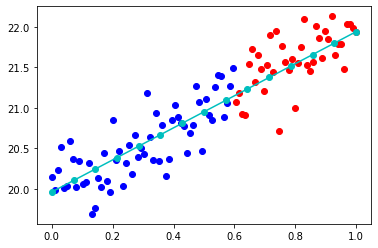

In [9]:
plt.clf()
plt.plot(df[:,0], df[:,1], 'bo')
plt.plot(test_df[:,0], test_df[:,1], 'ro')
points = np.linspace(0,1,15)
line = np.array([hypothesis([1,i],theta) for i in points])
plt.plot(points, line, 'co-')